In [1]:
from alpha_vantage.timeseries import TimeSeries
from pprint import pprint
from selenium import webdriver
from bs4 import BeautifulSoup
import edgar
import time
from pathlib import Path
import pandas as pd
import os
import re
from datetime import datetime
from datetime import date
import json
import requests
import sys

In [2]:
key='8NBLCOTKI465W93V'
secKey = "d76154d8c11c709dbdaaa8cdf25c2b69424847ba85f2a569742d588d0d53c8b0"

In [3]:
ts = TimeSeries(key=key, output_format='pandas')
data, meta_data = ts.get_intraday(symbol='MSFT',interval='1min', outputsize='full')
pprint(data.head(2))

                     1. open  2. high  3. low  4. close  5. volume
date                                                              
2021-12-30 20:00:00   338.07   338.07  338.07    338.07      179.0
2021-12-30 19:59:00   338.50   338.50  338.50    338.50      255.0


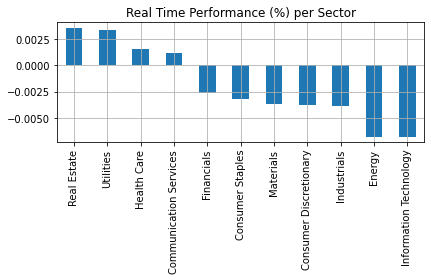

In [4]:
from alpha_vantage.sectorperformance import SectorPerformances
import matplotlib.pyplot as plt

sp = SectorPerformances(key=key, output_format='pandas')
data, meta_data = sp.get_sector()
data['Rank A: Real-Time Performance'].plot(kind='bar')
plt.title('Real Time Performance (%) per Sector')
plt.tight_layout()
plt.grid()
plt.show()

In [5]:
import requests
url = 'https://www.alphavantage.co/query?function=GLOBAL_QUOTE&symbol=IBM&apikey=demo'
print(url)

https://www.alphavantage.co/query?function=GLOBAL_QUOTE&symbol=IBM&apikey=demo


In [6]:
r = requests.get(url)
output = r.json()

In [7]:
print(output["Global Quote"]["05. price"])

133.9100


In [8]:
import pandas as pd
from io import StringIO
url = 'https://www.alphavantage.co/query?function=EARNINGS_CALENDAR&symbol=MSFT&horizon=3month&apikey=8NBLCOTKI465W93V'
r = requests.get(url)
content = r.text
print(str(content))

symbol,name,reportDate,fiscalDateEnding,estimate,currency
MSFT,Microsoft Corporation,2022-01-24,2021-12-31,2.31,USD



In [9]:
content = str(content)
f = StringIO(content)
#col_list = ["symbol"]
tbl = pd.read_csv(f, nrows=1)
#print(tbl)
#print(tbl["reportDate"][0])
print (len(tbl["reportDate"]))
if len(tbl["reportDate"]) > 0:
    dateStr = tbl["reportDate"][0]
    print(dateStr)

1
2022-01-24


In [10]:
import datetime
date = datetime.datetime.strptime(dateStr, "%Y-%m-%d").date()
d = date.strftime("%b %d")
print("Output 3:", d)

Output 3: Jan 24


In [11]:
#qtrs = [[1,3],[4,6],[7,9],[10,12]]
months = 12
qtr_len = 3
qtr_no = int(months/qtr_len)
qtrs = list()
start = 0
for i in range(qtr_no):
    qtr = list()
    start = 1 + start
    end = start + 2
    qtr.append(start)
    qtr.append(end)
    qtrs.append(qtr)
    start = end

print(qtrs)
month = 10
for o in qtrs:
    #print (o)
    if month >= o[0] and month <= o[1]:
        print(o)
        break

[[1, 3], [4, 6], [7, 9], [10, 12]]
[10, 12]


In [12]:
def get_qtrs():
    months = 12
    qtr_len = 3
    qtr_no = int(months/qtr_len)
    qtrs = list()
    start = 0
    for i in range(qtr_no):
        qtr = list()
        start = 1 + start
        end = start + 2
        qtr.append(start)
        qtr.append(end)
        qtrs.append(qtr)
        start = end
    return qtrs

In [13]:
def get_qtr_range(month, qtrs):
    #print(month)
    for o in qtrs:
        if month >= o[0] and month <= o[1]:
            return o

In [14]:
def get_stock_earningDate_detail(stock):
    url = 'https://www.alphavantage.co/query?function=EARNINGS_CALENDAR&symbol=' + stock + '&horizon=3month&apikey=8NBLCOTKI465W93V'
    try:
        r = requests.get(url)
        content = r.text
        return content
    except e:
        print(e)
        return None
    return None

In [15]:
import sys
from colorama import Fore, init, Back, Style
import openpyxl
import re

path = "../../Summary/stocks.xlsx"
wb_obj = openpyxl.load_workbook(path.strip())
# from the active attribute 
sheet_obj = wb_obj.active
sheet_obj

<Worksheet "12-Sep-2020">

In [16]:
max_column=sheet_obj.max_column
max_row=sheet_obj.max_row
max_column, max_row

(12, 58)

In [17]:
data = sheet_obj.cell(1,2)
print(data.value)

Quantity


In [18]:
path = "../../Summary/stocks_csv.csv"
d = pd.read_csv(path)
d["Ticker"]

0        NIO
1        BTI
2       ABBV
3        EPD
4        ENB
       ...  
132     DGRO
133     TD6C
134     TDG0
135    PTTRX
136      NaN
Name: Ticker, Length: 137, dtype: object

In [19]:
from datetime import datetime
qtrs = get_qtrs()
print(qtrs)
month = datetime.now().month
year = datetime.now().year
print(month, year)
qtr = get_qtr_range(month, qtrs)
qtr

[[1, 3], [4, 6], [7, 9], [10, 12]]
12 2021


[10, 12]

In [20]:
import math
months = ["0", "JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"]
print(months[qtr[0]], months[qtr[1]])
cell = months[qtr[0]]+"-"+months[qtr[1]]+" "+ str(year)
#cell = months[7]+"-"+months[9]+" "+ str(year)
print(cell)
if cell not in d:
    d[cell] = None
    d.to_csv(path, index=False)
print(d[cell][3])
#if math.isnan(d[cell][3]):
#    print("Hello")

for index, value in enumerate(d[cell]):
    #print(index, value)
    #print(type(value))
    if type(value) is str:
        print(value)

OCT DEC
OCT-DEC 2021
02-Nov - DN (22.19)
09-Nov - DN (39.55)
29-Oct - UP (114.67)
02-Nov - DN (22.19)
05-Nov - UP (43.3)
26-Oct - DN (215.78)
26-Oct - UP (323.17)
28-Oct - UP (187.15)
20-Dec - UP (166.63)
27-Oct - DN (56.49)
04-Nov - DN (90.73)
28-Oct - UP (458.13)
05-Nov - DN (11.79)
01-Dec - UP (209.35)
02-Dec - DN (135.09)
10-Nov - UP (176.39)
09-Nov - UP (79.47)
03-Nov - DN (116.37)
08-Nov - DN (205.42)
04-Nov - DN (43.64)
09-Nov - UP (281.64)
07-Dec - DN (19.0)
16-Nov - DN (20.7)
20-Oct - UP (894.0)
08-Nov - UP (88.75)
28-Oct - UP (290.02)
27-Oct - DN (284.93)
10-Nov - DN (159.63)
22-Nov - DN (206.64)
30-Nov - DN (318.21)
08-Nov - DN (20.53)
28-Oct - UP (1457.0)
02-Nov - UP (189.07)
10-Nov - UP (199.94)
18-Nov - UP (692.34)
04-Nov - UP (1629.76)
03-Nov - DN (22.9)
08-Nov - UP (8.77)
27-Oct - UP (149.18)
03-Nov - DN (93.0)
02-Nov - UP (29.5)
08-Nov - DN (62.94)
02-Nov - UP (553.23)
04-Nov - UP (143.86)
04-Nov - DN (55.64)
26-Oct - DN (23.44)
26-Oct - UP (87.51)
03-Nov - DN (11.4)
0

In [21]:
def get_dateStr(dateStr):
    date = datetime.strptime(dateStr, "%Y-%m-%d").date()
    month = date.month
    dStr = date.strftime("%d-%b")
    return month, dStr

In [22]:
def get_month(dateStr):
    date = datetime.strptime(dateStr, "%Y-%m-%d").date()
    month = date.month
    #print(month)
    return month

In [23]:
def is_currentQtr(month):
    qtrs = get_qtrs()
    currMonth = datetime.now().month
    qtr = get_qtr_range(currMonth, qtrs)
    earningQtr = get_qtr_range(month, qtrs)
    if qtr == earningQtr:
        return True
    return False

In [24]:
status = is_currentQtr(7)
print(status)

False


In [25]:
from datetime import timedelta
print(d[cell][0])
content = d[cell][0]
if "(" not in content:
    print(True)
    #data = content.split(" ")
    #dateStr = (data[0].strip() + "-" + str(year))
    dateStr = (content.strip() + "-" + str(year))
    print(dateStr)
    date = datetime.strptime(dateStr, "%d-%b-%Y").date()
    nextDate = date + timedelta(days=1)
    print(str(date), str(nextDate))
    date = str(date)
    nextDate = str(nextDate)
    #month = date.month
    #dStr = date.strftime("%Y-%m-%d")
    #nStr = nextDate.strftime("%Y-%m-%d")
    #print(dStr)
    #return month, dStr



09-Nov - DN (39.55)


In [26]:
url = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=NIO&apikey=8NBLCOTKI465W93V"
r = requests.get(url)
output = r.json()

#curr = output.get("Time Series (Daily)").get('2021-04-30').get("5. adjusted close")
#prev = output.get("Time Series (Daily)").get('2021-04-29').get("5. adjusted close")
if(output):
    curr = output.get("Time Series (Daily)").get(nextDate).get("5. adjusted close")
    prev = output.get("Time Series (Daily)").get(date).get("5. adjusted close")
    print(curr, prev)
    diff = float(curr) - float(prev)
    print(diff)
    if (diff > 0):
        print("UP")
    elif (diff < 0):
        print(" - DN" + " (" + curr + ")")
    else:
        print("NC")

AttributeError: 'NoneType' object has no attribute 'get'

In [27]:
from datetime import datetime
from datetime import timedelta
import dateutil

def is_earningReport(title, earningDate, newsDate):
    #print(earningDate, newsDate)
    temp = earningDate
    if newsDate != temp:
        temp = temp + timedelta(days=1)
        if newsDate != temp:
            temp = earningDate
            temp = temp + timedelta(days=-1)
            if newsDate != temp:
                return False
    
    words1 = ["Announces", "Reports", "Releases", "Increase", "Raises"]
    words2 = ["Earnings", "Results", "Billable", "Revenue", "Revenues", "Income", "Letter"]
    if any(word in title for word in words1) and any(word in title for word in words2):
        #print(True)
        return True
    return False

In [28]:
def get_newsMarketTime(hour):
    if (hour > 12):
        return "AH"
    else:
        return "PM"

In [29]:
def get_newsDate(l):
    #print(l)
    interval = l.split(" ")
    num = interval[0]
    date = datetime.now()
    newsDate = None
    #print(date)
    if num == "yesterday":
        newsDate = date + timedelta(days=-1)
        newsDate = newsDate + timedelta(hours=-12.30) #For US time
    elif interval[1] == "days":
        newsDate = date + timedelta(days=-int(interval[0]))
        newsDate = newsDate + timedelta(hours=-12.30) #For US time
        #print(newsDate)
    elif interval[1] == "hours":
        newsDate = date + timedelta(hours=-int(interval[0]))
        newsDate = newsDate + timedelta(hours=-12.30) #For US time
        #print(newsDate)
    elif interval[1] == "months":
        a_month = dateutil.relativedelta.relativedelta(months=int(interval[0]))
        newsDate = date - a_month
    else:
        newsDate = date
        newsDate = newsDate + timedelta(hours=-9.30) #For US Eastern time
        #print(newsDate)
    return newsDate

In [30]:
def get_cell(d):
    qtrs = get_qtrs()
    #print(qtrs)
    month = datetime.now().month
    year = datetime.now().year
    #print(month, year)
    qtr = get_qtr_range(month, qtrs)
    #print(qtr)

    months = ["0", "JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"]
    #print(months[qtr[0]], months[qtr[1]])
    cell = months[qtr[0]]+"-"+months[qtr[1]]+" "+ str(year)
    
    if cell not in d:
        d[cell] = None
        d.to_csv(path, index=False)
    return cell

In [31]:
import traceback
def getElement(element, source):
    try:
        elem = list()
        soup = BeautifulSoup(source, "html.parser")
        
        if(element == "PREVELEM"):
            cnt = -1
            for t in soup.find_all("div", class_="caas-table"):
                cnt = cnt + 1
                if t and t.previous_element:
                    #print("PREVIOUS ELEMENT "+str(cnt), t.previous_element)
                    #print("\n")
                    elem.append(str(t.previous_element).upper())
                else:
                    elem.append("NONE")
            return(elem)
    except Exception as e:
        print(e)
        print(traceback.format_exc())
        return None
    return None

In [32]:
import numpy as np
def findHeaders(table, match):
    hj = -1
    hstart = -1
    hend = -1
    #match = [str(cyr), str(pyr), str(nyr), nbr1, nbr2, nbr3]
    headers = list()
    
    for i in range(0,len(table)):
        for j in range(1,len(table.columns)):
            cell = table.iloc[i,j]
            #print(len(str(cell).split(" ")), cell)
            if(len(str(cell).split(" ")) < 10 and any(qtr in str(cell) for qtr in match)):
                #print("HEADER CELL CENTER", i, j)
                hj = i
                k = i
                hstart = -1
                hend = -1
                metric = table.iloc[k,0]
                # Multiple Headers may present inside single table
                if(len(headers) > 0):
                    #print(metric, k)
                    #hstart = i
                    while((str(metric) == "nan" or str(metric) == cell) and k>=0):
                        hstart = k 
                        k = k - 1
                        #print(metric, k)
                        if(k>=0):
                            metric = table.iloc[k,0]
                        else:
                            break
                # Header always start from 0 index
                else:
                    hstart = 0
                if(i+1 < len(table)):
                    k = i+1
                    hend = i
                    metric = table.iloc[k,0]
                    while(str(metric) == "nan" or "thousands" in str(metric) or "millions" in str(metric)):
                        hend = k 
                        #print("HEND", hend)
                        k = k + 1
                        if(k < len(table)):
                            metric = table.iloc[k,0]
                        else:
                            break
                else:
                    hend = i
                #print("HEADER BOUNDARY", hstart, hend)
                if(hstart > -1 and hend > -1):
                    hstr = str(hstart) + ":" + str(hend)
                    headers.append(hstr)
                    break
    
    for i in range(0,len(table)):
        for j in range(1,len(table.columns)):
            cell = table.iloc[i,j]
            if(table.iloc[i,0] == cell):
                #print(cell)
                table.iloc[i,j] = np.nan
                
    return headers,table

In [33]:
def dedupHeaderColumns(header, report):
    mstr = None
    mindex = -1
    lvalidx = -1
    lvalsum = -1
    mdict = dict()
    
    # Check for columns where special character like $ present, need to preserve these columns in header
    rd = report.where(report=="$")
    rd = rd.dropna(axis=1, how="all")
    #print("SPECIAL COLUMNS NEED TO BE PRESERVED")
    #print(rd.columns)
    
    for i,v in enumerate(header.columns):
        #print(i,v)
        #print(header[v].astype(str).values)
        l = " ".join((header[v].astype(str).values))
        #print(l)
        # Find out which consecutive duplicate columns need to be removed
        if not mstr:
            mstr = l
            mindex = i
        else:
            if(l == mstr):
                if(lvalsum == -1):
                    lvalsum = report[v].isna().sum()
                    lvalidx = v
                if mindex not in mdict:
                    mdict[mindex] = list()
                    if(header.columns[i-1] not in rd.columns and v not in rd.columns):
                        if(report[header.columns[i-1]].isna().sum() > lvalsum):
                            mdict[mindex].append(header.columns[i-1])
                        else:
                            mdict[mindex].append(v)
                            lvalsum = report[v].isna().sum()
                            lvalidx = v
                    elif v in rd.columns and header.columns[i-1] in rd.columns:
                        mdict[mindex].append(v)
                        lvalsum = -2
                        lvalidx = header.columns[i-1]
                    elif v in rd.columns and header.columns[i-1] not in rd.columns:
                        mdict[mindex].append(header.columns[i-1])
                        lvalsum = -2
                        lvalidx = v
                    else:
                        mdict[mindex].append(v)
                        lvalsum = -2
                        lvalidx = header.columns[i-1]
                else:
                    if(report[v].isna().sum() >= lvalsum):
                        mdict[mindex].append(v)
                    else:
                        mdict[mindex].append(lvalidx)
                        lvalsum = report[v].isna().sum()
                        lvalidx = v
            else:
                mstr = l
                mindex = i
                lvalsum = -1
                lvalidx = -1
    #print("DUPLICATE HEADER COLUMNS TO BE DELETED")
    print(mdict)
    for item in mdict:
        header = header.drop(mdict[item], axis=1)
    return header

In [34]:
tableRules = [
    {
        "SOURCE":["COLUMN:FIRST"], # Search within original first column name (renamed by "METRIC")
        "MATCH":"ANY",
        "CONDITIONS":["NON-GAAP FINANCIAL", "NON-GAAP OPERATING EXPENSES"],
        "ACTIONS":["ACCOUNTING"]
    },
    {
        "SOURCE":["COLUMN:FIRST"], # Search within original first column name (renamed by "METRIC")
        "MATCH":"ANY",
        "CONDITIONS":["KEY FINANCIAL RESULT"],
        "ACTIONS":["HIGHLIGHT"]
    },
    {
        "SOURCE":["COLUMN:FIRST"], # Search within original first column name (renamed by "METRIC")
        "MATCH":"ANY",
        "CONDITIONS":["NON-GAAP NET INCOME"],
        "ACTIONS":["ACCOUNTING"]
    },
    {
        "SOURCE":["COLUMN:FIRST"], # Search within original first column name (renamed by "METRIC")
        "MATCH":"ANY",
        "CONDITIONS":["NON-GAAP GROSS PROFIT"],
        "ACTIONS":["ACCOUNTING"]
    },
    {
        "SOURCE":["COLUMN:FIRST"], # Search within original first column name (renamed by "METRIC")
        "MATCH":"ANY",
        "CONDITIONS":["STATEMENTS OF INCOME"],
        "ACTIONS":["STMTOP"] # Statement of Operation/Income
    },
    {
        "SOURCE":["COLUMN:FIRST"], # Search within original first column name (renamed by "METRIC")
        "MATCH":"EXACT",
        "CONDITIONS":["ASSETS"],
        "ACTIONS":["BALANCESHEET"]
    },
    {
        "SOURCE":["COLUMN:FIRST"], # Search within original first column name (renamed by "METRIC")
        "MATCH":"ANY",
        "CONDITIONS":["BALANCE SHEETS"],
        "ACTIONS":["BALANCESHEET"]
    },
    {
        "SOURCE":["COLUMN:FIRST"], # Search within original first column name (renamed by "METRIC")
        "MATCH":"ANY",
        "CONDITIONS":["SEGMENTED ADJUSTED GROSS MARGIN"],
        "ACTIONS":["SEGNGGM"]
    },
    {
        "SOURCE":["COLUMN:FIRST"], # Search within original first column name (renamed by "METRIC")
        "MATCH":"ANY",
        "CONDITIONS":["ADJUSTED GROSS MARGIN"],
        "ACTIONS":["NGGM"]
    },
    {
        "SOURCE":["COLUMN:FIRST"], # Search within original first column name (renamed by "METRIC")
        "MATCH":"ANY",
        "CONDITIONS":["SEGMENTED GROSS MARGIN"],
        "ACTIONS":["SEGGM"]
    },
    {
        "SOURCE":["COLUMN:FIRST"], # Search within original first column name (renamed by "METRIC")
        "MATCH":"ANY",
        "CONDITIONS":["ADJUSTED EBITDA"],
        "ACTIONS":["NGEBITDA"]
    },
    {
        "SOURCE":["COLUMN:FIRST"], # Search table description
        "MATCH":"ANY",
        "CONDITIONS":["EARNINGS BEFORE INTEREST AND TAXES"],
        "ACTIONS":["NGEBIT"]
    },
    {
        "SOURCE":["COLUMN:FIRST"], # Search within original first column name (renamed by "METRIC")
        "MATCH":"ANY",
        "CONDITIONS":["DIVISIONAL REVENUES"],
        "ACTIONS":["REVENUECHN"]
    },
    {
        "SOURCE":["COLUMN:METRIC"],
        "MATCH":"EXACT",
        "CONDITIONS":["ADJUSTED EBITDA MARGIN"],
        "ACTIONS":["HIGHLIGHT"]
    },
    {
        "SOURCE":["COLUMN:METRIC"],
        "MATCH":"EXACT",
        "CONDITIONS":["TOTAL CURRENT ASSETS"],
        "ACTIONS":["BALANCESHEET"]
    },
    {
        "SOURCE":["COLUMN:METRIC"],
        "MATCH":"EXACT",
        "CONDITIONS":["FREE CASH FLOW"],
        "ACTIONS":["FCF"]
    },
    {
        "SOURCE":["COLUMN:METRIC"],
        "MATCH":"EXACT",
        "CONDITIONS":["COST OF REVENUE"],
        "ACTIONS":["STMTOP"]
    },
    {
        "SOURCE":["COLUMN:METRIC"],
        "MATCH":"EXACT",
        "CONDITIONS":["COST OF SALES"],
        "ACTIONS":["STMTOP"]
    },
    {
        "SOURCE":["COLUMN:METRIC"],
        "MATCH":"ANY",
        "CONDITIONS":["PER SHARE DATA"],
        "ACTIONS":["PERSHARE"]
    },
    {
        "SOURCE":["COLUMN:METRIC"],
        "MATCH":"ANY",
        "CONDITIONS":["NET INVESTMENT INCOME"],
        "ACTIONS":["STMTOP"]
    },
    {
        "SOURCE":["COLUMN:METRIC"],
        "MATCH":"EXACT",
        "CONDITIONS":["COST OF GOODS SOLD"],
        "ACTIONS":["STMTOP"]
    },
    {
        "SOURCE":["COLUMN:METRIC"],
        "MATCH":"EXACT",
        "CONDITIONS":["OPERATING ACTIVITIES"],
        "ACTIONS":["STMTCASHFLOW"]
    },
    {
        "SOURCE":["COLUMN:METRIC"],
        "MATCH":"EXACT",
        "CONDITIONS":["CASH, ENDING"],
        "ACTIONS":["STMTCASHFLOW"]
    },
    {
        "SOURCE":["COLUMN:METRIC"],
        "MATCH":"EXACT",
        "CONDITIONS":["CASH FLOWS FROM OPERATING ACTIVITIES"],
        "ACTIONS":["STMTCASHFLOW"]
    },
    {
        "SOURCE":["COLUMN:METRIC"],
        "MATCH":"EXACT",
        "CONDITIONS":["CASH FLOWS FROM OPERATING ACTIVITIES:"],
        "ACTIONS":["STMTCASHFLOW"]
    },
    {
        "SOURCE":["COLUMN:METRIC"], # Search data only from "METRIC" column
        "MATCH":"ANY",
        "CONDITIONS":["ARPU", "DELIVERIES", "MAUS", "LOSS RATIO", "GROSS WRITTEN PREMIUMS", "ACTIVE BUYERS", "ACTIVE CLIENTS", "ASSETS AT FLOATING RATES", "NUMBER OF PORTFOLIO COMPANIES", "TOTAL ORIGINATIONS", "# OF INVESTMENTS"],
        "ACTIONS":["OPMETRIC"]
    },
    {
        "SOURCE":["COLUMN:METRIC"],
        "MATCH":"EXACT",
        "CONDITIONS":["GAAP INCOME FROM OPERATIONS"],
        "ACTIONS":["ACCOUNTING"]
    },
    {
        "SOURCE":["COLUMN:ANY"], # No specific column name, search any column name
        "MATCH":"ANY", # Match any condition
        "CONDITIONS":["GUIDANCE"],
        "ACTIONS":["GUIDANCE"]
    },
    {
        "SOURCE":["DESCRIPTION:ANY"], # Search table description
        "MATCH":"ANY",
        "CONDITIONS":["GUIDANCE", "OUTLOOK"],
        "ACTIONS":["GUIDANCE"]
    },
    {
        "SOURCE":["DESCRIPTION:ANY"], # Search table description
        "MATCH":"ANY",
        "CONDITIONS":["ADJUSTED EBITDA"],
        "ACTIONS":["NGEBITDA"]
    },
    {
        "SOURCE":["DESCRIPTION:ANY"], # Search table description
        "MATCH":"ANY",
        "CONDITIONS":["GAAP FINANCIAL METRICS", "EARNINGS PER SHARE RECONCILE"],
        "ACTIONS":["ACCOUNTING"]
    },
    {
        "SOURCE":["DESCRIPTION:ANY"], # Search table description
        "MATCH":"EXACT",
        "CONDITIONS":["NET REVENUE"],
        "ACTIONS":["REVENUE"]
    },
    {
        "SOURCE":["DESCRIPTION:ANY"], # Search table description
        "MATCH":"EXACT",
        "CONDITIONS":["REVENUE BY CHANNEL"],
        "ACTIONS":["REVENUECHN"]
    },
    {
        "SOURCE":["DESCRIPTION:ANY"], # Search table description
        "MATCH":"EXACT",
        "CONDITIONS":["REVENUE BY FORM"],
        "ACTIONS":["REVENUEFORM"]
    },
    {
        "SOURCE":["DESCRIPTION:ANY"],
        "MATCH":"EXACT",
        "CONDITIONS":["FINANCIAL RESULTS"],
        "ACTIONS":["STMTOP"]
    },
    {
        "SOURCE":["DESCRIPTION:ANY"], # Search table description
        "MATCH":"EXACT",
        "CONDITIONS":["ADJUSTED GROSS MARGIN"],
        "ACTIONS":["NGGM"] # Non-GAAP Gross Margin
    },
    {
        "SOURCE":["DESCRIPTION:ANY"], # Search table description
        "MATCH":"ANY",
        "CONDITIONS":["OPERATING METRIC"],
        "ACTIONS":["OPMETRIC"]
    }
]
print(tableRules)

[{'SOURCE': ['COLUMN:FIRST'], 'MATCH': 'ANY', 'CONDITIONS': ['NON-GAAP FINANCIAL', 'NON-GAAP OPERATING EXPENSES'], 'ACTIONS': ['ACCOUNTING']}, {'SOURCE': ['COLUMN:FIRST'], 'MATCH': 'ANY', 'CONDITIONS': ['KEY FINANCIAL RESULT'], 'ACTIONS': ['HIGHLIGHT']}, {'SOURCE': ['COLUMN:FIRST'], 'MATCH': 'ANY', 'CONDITIONS': ['NON-GAAP NET INCOME'], 'ACTIONS': ['ACCOUNTING']}, {'SOURCE': ['COLUMN:FIRST'], 'MATCH': 'ANY', 'CONDITIONS': ['NON-GAAP GROSS PROFIT'], 'ACTIONS': ['ACCOUNTING']}, {'SOURCE': ['COLUMN:FIRST'], 'MATCH': 'ANY', 'CONDITIONS': ['STATEMENTS OF INCOME'], 'ACTIONS': ['STMTOP']}, {'SOURCE': ['COLUMN:FIRST'], 'MATCH': 'EXACT', 'CONDITIONS': ['ASSETS'], 'ACTIONS': ['BALANCESHEET']}, {'SOURCE': ['COLUMN:FIRST'], 'MATCH': 'ANY', 'CONDITIONS': ['BALANCE SHEETS'], 'ACTIONS': ['BALANCESHEET']}, {'SOURCE': ['COLUMN:FIRST'], 'MATCH': 'ANY', 'CONDITIONS': ['SEGMENTED ADJUSTED GROSS MARGIN'], 'ACTIONS': ['SEGNGGM']}, {'SOURCE': ['COLUMN:FIRST'], 'MATCH': 'ANY', 'CONDITIONS': ['ADJUSTED GROSS M

In [35]:
import traceback
def getOneTable(tables, tableNum, tblDesc):
    if not tables:
        print("TABLES CORRUPTED")
        return None
    if(tableNum >= len(tables)):
        print("INVALID TABLE INDEX")
        return None
    try:
        
        todays_date = date.today()
        cyr = todays_date.year
        pyr = cyr - 1
        ppyr = cyr - 2
        nyr = cyr + 1
        nbr = str(nyr)[2:4]
        nbr1 = "FY’"+nbr
        nbr2 = "FY"+nbr
        nbr3 = "’"+nbr
        
        hdmatch = [str(cyr), str(pyr), str(ppyr), str(nyr), nbr1, nbr2, nbr3, "2016", "2017", "2018", "FY16", "FY17", "FY18"]
        
        mn = ["MILLIONS", "MILLION", "millions", "million"]
        bn = ["BILLIONS", "BILLION", "billions", "billion"]
        t = ["THOUSANDS", "THOUSAND", "thousands", "thousand", "$000"]
        
        stmt = tables[tableNum]
        print("ORIGINAL TABLE ", tableNum)
        print(stmt)
    
        #stmt=stmt.T.drop_duplicates().T
        stmt[stmt.columns[0]] = stmt[stmt.columns[0]].astype(str)
        stmt[stmt.columns[0]] = stmt[stmt.columns[0]].str.encode("ascii", "ignore")
        stmt[stmt.columns[0]] = stmt[stmt.columns[0]].str.decode(encoding="utf8")
        stmt[stmt.columns[0]] = stmt[stmt.columns[0]].replace(r'^\s*$', np.nan, regex=True)
        stmt[stmt.columns[0]] = stmt[stmt.columns[0]].replace(r'nan', np.nan)
        stmt = stmt.dropna(axis=1, how="all")
        stmt = stmt.dropna(axis=0, how="all")
        columns = [i for i, x in enumerate(list(stmt.columns))]
        #print(columns)
        stmt.columns = columns
        #print("TABLE AFTER REMOVING DUPLICATE ROWS AND COLUMNS")
        #print(stmt)
    
        headers,stmt = findHeaders(stmt, hdmatch)
        #print(headers)
    
        if(len(headers) == 0):
            print("INVALID TABLE, HEADER NOT FOUND")
            return None
    
        #print("TABLE AFTER REMOVING DUPLICATES")
        #print(stmt)
    
        #Itereate through headers
        cnt = 0
        ft = dict()
        for i in list(headers):
            #print(i)
            tblName = None
            tblType = None
            cnt = cnt + 1
            hstart = int(i.split(":")[0])
            hend = int(i.split(":")[1])
            if(len(headers) > cnt):
                rend = int(headers[cnt].split(":")[0])
            else:
                rend = len(stmt)
            #print("\nHEADER START", hstart, "HEADER END", hend, "REPORT END", rend)
            header = stmt.iloc[hstart:hend+1,0:]
            #header = header.dropna(axis=1, how="all")
            report = stmt.iloc[hend+1:rend,0:]
            #report = report.dropna(axis=1, how="all")
            #print("\nHEADER "+str(cnt))
            #print(header)
            #print("\nREPORT "+str(cnt))
            #print(report)
            
            header = dedupHeaderColumns(header, report)
            
            #print("\nAFTER DELETING DUPLICATE COLUMN HEADER")
            #print("\nHEADER "+str(cnt))
            #print(header)
            
            if(len(header) == 0):
                print("NO HEADER FOUND")
                return None
            
            header1 = header[0]
            #print("HEADER BATCH 1")
            #print(header1)
            
            header2 = header[header.columns[1:]]
            header2 = header2.dropna(axis=1, how="all")
            
            hddrop = list()
            newmatch = hdmatch + ["CHANGE", "QOQ", "YOY"]
            for hd in list(header2.columns):
                header2[hd] = (header2[hd]).astype(str).str.upper()
                if(header2[hd].str.contains("|".join(list(map(str.upper,newmatch)))).sum() == 0):
                    hddrop.append(hd)
            
            #print("\nINVALID HEADER")
            #print(hddrop)
            header2 = header2.drop(hddrop, axis=1)
            #print("HEADER BATCH 2")
            #print(header2)
            
            header = pd.concat([header1, header2], axis=1, join='inner')
            header[header.columns[0:]] = header[header.columns[0:]].astype(str)
            #print(header)
            header[header.columns[0:]] = header[header.columns[0:]].applymap(lambda x: re.sub(r'\(\d+\)|\(\d+[a-zA-Z]\)*|\*', r'', x))
            #print("FINAL HEADER")
            #print(header)
            
            #report = report.T.drop_duplicates().T
            report = report.dropna(axis=1, how="all")
            
            #print("\nAFTER DELETING DUPLICATE ROWS")
            #print("\nREPORT "+str(cnt))
            #print(report)
            
            if(len(report) > 0):
            
                # Merge REPORT columns present with special characters - e.g. $/% etc...
                rd = report.where(report=="$")
                rd = rd.dropna(axis=1, how="all")
                #print("\nSPECIAL COLUMNS")
                #print(rd.columns)
                dropList = list()
                #print(rd.columns)
                for i in list(rd.columns):
                    #print(report[i])
                    report[i] = report[i].map(lambda x: "" if str(x) != "$" else x)
                    k = i + 1
                    while(k in list(rd.columns)):
                        dropList.append(k)
                        #rd.columns = list(rd.columns).remove(k)
                        k = k + 1
                    report[i] = report[i] + report[k]
                    dropList.append(k)
                report = report.drop(dropList, axis=1)
                report[report.columns[1:]] = report[report.columns[1:]].astype(str)
                report[report.columns[1:]] = report[report.columns[1:]].applymap(lambda x: x.replace('$(','-$'))
                report[report.columns[1:]] = report[report.columns[1:]].applymap(lambda x: x.replace('(','-'))
                report[report.columns[1:]] = report[report.columns[1:]].applymap(lambda x: x.replace(')',''))
                report[report.columns[1:]] = report[report.columns[1:]].applymap(lambda x: x.replace(',',''))
                report[0] = report[0].str.replace(":","")
                report[0] = report[0].str.replace(r'\d+|\(\d+\)|\(\d+[a-zA-Z]\)*|\*', r'')
                report[0] = report[0].str.upper()
                #report[report.columns[1:]] = report[report.columns[1:]].astype(float)
            
                rd = report.where(report=="%")
                rd = rd.dropna(axis=1, how="all")
                #print(rd)
                dropList = list()
                mgclmn = -1
                #print(rd.columns)
                for i in list(rd.columns):
                    #print(report[i])
                    report[i] = report[i].map(lambda x: "" if str(x) != "%" else x)
                    mgclmn = i - 1
                    while(mgclmn>=0):
                        if mgclmn not in header.columns:
                            mgclmn = mgclmn - 1
                        else:
                            #print(mgclmn,i)              
                            report[mgclmn] = report[mgclmn] + report[i]
                            dropList.append(i)
                            break
                report = report.drop(dropList, axis=1)
                #print("\nREPORT AFTER MERGING SPECIAL COLUMNS")
                #print(report)
            
                hdclmn = header.columns
                rclmn = report.columns
                #print("\nHEADER COLUMNS", hdclmn)
                #print("REPORT COLUMNS", rclmn)
            
                if(len(hdclmn) == 1 and len(header) == 1):
                    #print("SINGLE COLUMN")
                    if(str(header.iloc[0,0]) == "nan"):
                        #print("INVALID HEADER CONTENT FOR SINGLE COLUMN, BAILING OUT")
                        return None
                    s = header.iloc[0,0]
                    #Remove special characters
                    s = re.sub('[^a-zA-Z0-9 \n\.]', '', s)
                    #print(s)
                    data = list()
                    data = [str(s)+"***"+str(item) for item in list(rclmn)]
                    header = pd.DataFrame(np.array([data]),columns=rclmn)
                    hdclmn = header.columns
                    #print("NEW HEADER COLUMNS", hdclmn)
            
            
                finalClmns = hdclmn.intersection(rclmn)
                #print("INTERSECTION COLUMNS",finalClmns)
                header = header[finalClmns]
                #print("FINAL HEADER")
                #print(header)
            
                hstr = list()
            
                count = -1
                for i in list(header.columns):
                    count = count + 1
                    l = header[i].astype(str).values
                    l = ' '.join(dict.fromkeys(l))
                    l = l.replace("-nan","-")
                    l = l.replace("nan-","")
                    l = l.replace("nan ","")
                    l = l.replace(" nan","")
                    l = l.replace(" nan ","")
                    l = l.strip()
                    #print(hstr)
                    if l.upper() in hstr:
                        l = l+"***"+str(count)
                    hstr.append(l.upper())
                    #print(l)
            
                tblType = hstr[0]
                #print("\nORIGINAL FIRST COLUMN NAME")
                #print(tblType)
            
                #print("\nTABLE DESCRIPTION")
                #print(tblDesc)
            
                hstr[0] = "METRIC"
                #print("\nFINAL HEADER STRING")
                #print(hstr)
            
                report = report[finalClmns]
                report.columns = hstr
                print("\nFINAL REPORT")
                print(report)
            
                #print("\nREPORT COLUMNS")
                #print(report.columns)
            else:
                # When entire report rows are detected as header of table
                #print("EMPTY REPORT, ASSIGN HEADER TO REPORT")
                hstr = list(header.columns)
                #print(hclmn)
                hstr[0] = "METRIC"
                report = header
                hstr = map(lambda x: str(x), hstr)
                report.columns = (hstr)
                print("\nFINAL REPORT")
                print(report)
                #report.columns[0] = "METRIC"
            
            # Select unit of the table numbers
            unit = "T"
            for word in (mn+bn+t):
                if((hstr and any(word in clmn for clmn in hstr)) or (tblType and word in tblType) or (tblDesc and word in tblDesc) or report["METRIC"].str.contains(word).sum() > 0):
                    if word in mn:
                        unit = "M"
                        break
                    elif word in bn:
                        unit = "B"
                        break
                    else:
                        unit = "T"
                        break
            
            # Select table type
            for item in list(tableRules):
                source = (item["SOURCE"][0])
                stype = item["SOURCE"][0].split(":")[0]
                sval = item["SOURCE"][0].split(":")[1]
                condition = item["CONDITIONS"][0]
                match = item["MATCH"]
                action = item["ACTIONS"][0]
                #print(match, condition, sval)
                #print(condition)
                
                if(stype == "COLUMN"):
                    if(sval == "FIRST"):
                        if match == "EXACT" and tblType and tblType == condition:
                            tblName = action
                            break
                        elif match == "ANY" and tblType and any(word in tblType for word in item["CONDITIONS"]):
                            tblName = action
                            break
                    elif(sval != "ANY"):
                        if match == "EXACT" and report[sval].eq(condition).sum()> 0:
                            #print("TABLE NAME BALANCESHEET")
                            tblName = action
                            break
                        elif match == "ANY" and report[sval].str.contains("|".join(item["CONDITIONS"])).sum()> 0:
                            tblName = action
                            break
                    else:
                        if(match == "ANY" and any(s in " ".join(report.columns) for s in item["CONDITIONS"])):
                            tblName = action
                            break
                        elif(match == "EXACT" and any(s in (report.columns) for s in item["CONDITIONS"])):
                            tblName = action
                            break
                elif(stype == "DESCRIPTION"):
                    if(sval == "ANY"):
                        #print(match)
                        #print("|".join(item["CONDITIONS"]))
                        if match == "EXACT" and tblDesc and tblDesc == condition:
                            tblName = action
                            break
                        elif match == "ANY" and tblDesc and any(word in tblDesc for word in item["CONDITIONS"]):
                            tblName = action
                            break
                
            if not tblName:
                key = str(tableNum)+":"+unit+":"+"OTHER"+":"+str(cnt)
                #ft[str(tableNum)+":"+unit+":"+"OTHER"+":"+str(cnt)] = report.to_json(orient="records")
            else:
                key = str(tableNum)+":"+unit+":"+tblName+":"+str(cnt)
                #ft[str(tableNum)+":"+unit+":"+tblName+":"+str(cnt)] = report.to_json(orient="records")
            ft[key] = dict()
            ft[key]["FIRSTCOLUMN"] = tblType
            ft[key]["TABLEDESC"] = tblDesc
            ft[key]["TABLENAME"] = tblName
            ft[key]["SUBTABLE"] = cnt
            ft[key]["UNIT"] = unit
            ft[key]["TABLENUM"] = tableNum
            ft[key]["COLUMNS"] = list(report.columns)
            ft[key]["METRICS"] = report["METRIC"].values.tolist()
            ft[key]["TABLE"] = report.to_json(orient="records")
            #print(ft)
        return(ft)
    except Exception as e:
        print("EXCEPTION:", e)
        print(traceback.format_exc())
        return None

In [36]:
def getPgSource(url):
    driver = webdriver.Chrome()

    driver.get(url)
    time.sleep(2)

    source = driver.page_source
    #print(driver.page_source)
    driver.close()
    return(source)

In [37]:
def getAllTables(url):
    allTables = dict()
    source = getPgSource(url)
    tables = None
    try:
        tables = pd.read_html(source)
    except:
        tables = None
        return None
    
    print("NUMBER OF TABLES", len(tables))
    allTables["TOTAL"] = len(tables)
    allTables["PARSESUCCESS"] = list()
    allTables["PARSEFAIL"] = list()
    
    tableDesc = getElement("PREVELEM", source)
    #print("ALL TABLE DESCRIPTIONS")
    #print(tableDesc)
    
    for i in range(0, len(tables)):
        tableNum = i
        print("\nFOR TABLE", tableNum)
        desc = "NONE"
        if tableDesc and tableNum < len(tableDesc):
            desc = tableDesc[tableNum]
        print("\nTABLE DESCRIPTION:", desc)

        ft = getOneTable(tables, tableNum, desc)
        #print("\n")
        #print(ft)
        if i not in allTables:
            allTables[i] = dict()
        allTables[i]["ORIGINAL"] = tables[tableNum].to_json(orient="records")
        if ft:
            allTables["PARSESUCCESS"].append(i)
            for key in ft:
                tblName = key.split(":")[2]
                #print(tblName)
                if tblName not in allTables:
                    allTables[tblName] = list()
                if "PARSE" not in allTables[i]:
                    allTables[i]["PARSE"] = list()
                if "TYPE" not in allTables[i]:
                    allTables[i]["TYPE"] = list()
                allTables[tblName].append(ft[key])
                allTables[i]["PARSE"].append(ft[key])
                allTables[i]["TYPE"].append(tblName)
        else:
            allTables["PARSEFAIL"].append(i)
        
    return (allTables)

In [66]:
import json
url = "https://finance.yahoo.com/news/facebook-reports-third-quarter-2021-200500200.html"
#org = "JPM"
dest = "../../Summary/report/"
filename = "FB-REPORT-2021-10-25_13-01-24.640332.txt"
allTables = getAllTables(url)
print("\nALL TABLES")
print(allTables)
if(allTables):
    #print(data)
    json_object = json.dumps(allTables, indent = 4)
    file = dest+filename
  
    # Writing to sample.json
    with open(file, "w") as outfile:
        outfile.write(json_object)

NUMBER OF TABLES 9

FOR TABLE 0

TABLE DESCRIPTION: THIRD QUARTER 2021 FINANCIAL HIGHLIGHTS
ORIGINAL TABLE  0
     0                                                  1  \
0  NaN                                                NaN   
1  NaN  In millions, except percentages and per share ...   
2  NaN                                           Revenue:   
3  NaN                                        Advertising   
4  NaN                                              Other   
5  NaN                                      Total revenue   
6  NaN                           Total costs and expenses   
7  NaN                             Income from operations   
8  NaN                                   Operating margin   
9  NaN                         Provision for income taxes   
10 NaN                                 Effective tax rate   
11 NaN                                         Net income   
12 NaN                   Diluted earnings per share (EPS)   

                                   

50                                              NaN  
{1: [2, 3], 5: [6, 7], 9: [10, 11], 13: [14, 15]}

FINAL REPORT
                                               METRIC  \
7                CASH FLOWS FROM OPERATING ACTIVITIES   
8                                          NET INCOME   
9   ADJUSTMENTS TO RECONCILE NET INCOME TO NET CAS...   
10                      DEPRECIATION AND AMORTIZATION   
11                           SHARE-BASED COMPENSATION   
12                              DEFERRED INCOME TAXES   
13                                              OTHER   
14                  CHANGES IN ASSETS AND LIABILITIES   
15                                ACCOUNTS RECEIVABLE   
16          PREPAID EXPENSES AND OTHER CURRENT ASSETS   
17                                       OTHER ASSETS   
18                                   ACCOUNTS PAYABLE   
19                                   PARTNERS PAYABLE   
20     ACCRUED EXPENSES AND OTHER CURRENT LIABILITIES   
21                      DEF

In [38]:
def storeRefinedContent(source, url, file):
    soup = BeautifulSoup(source, 'lxml')
    title = soup.find("title")
    title = (title.text)
    with open(file, 'w', encoding = 'utf-8') as f:
        f.write("url="+url)
        f.write("\n")
        f.write(title)
        f.write(".\n")
        list_of_forms = soup.find_all('div', class_="caas-body")
        for item in (list_of_forms):
            children = item.findChildren("p", recursive=True)
            for ctag in children:
                if(len(ctag.text.strip().split(" ")) < 2):
                    continue
                ctext = (" ".join(ctag.strings))
                ctext = ctext.strip()
                ctext = ctext.replace(u'\xa0', ' ')
                ctext = ("PG*** "+ctext)
                if (ctext[len(ctext)-1]) != ".":
                    ctext = ctext + ".\n"
                else:
                    ctext = ctext + "\n"
                if("Forward-Looking Statements" in ctext or "Forward Looking Statements" in ctext):
                    break
                else:
                    f.write(ctext)

In [39]:
import time
from selenium import webdriver
from bs4 import BeautifulSoup
import json

def store_earning_news(earningDateStr, stock):
    # Web scrapper for infinite scrolling page 
    url = "https://finance.yahoo.com/quote/" + stock + "/press-releases?p=" + stock
    
    driver = webdriver.Chrome()
    driver.get(url)
    time.sleep(2)  # Allow 2 seconds for the web page to open
    scroll_pause_time = 2 
    screen_height = driver.execute_script("return window.screen.height;")   # get the screen height of the web

    i = 1
   
    SCROLL_PAUSE_TIME = 0.5
    last_height = driver.execute_script("return document.body.scrollHeight")
    while True:
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(SCROLL_PAUSE_TIME)
        new_height = driver.execute_script("return document.body.scrollHeight")
        if new_height == last_height:
            break
        last_height = new_height

    ##### Extract Article Titles #####

    earningDate = datetime.strptime(earningDateStr, '%Y-%m-%d')
    
    news_list = list()
    soup = BeautifulSoup(driver.page_source, "html.parser")

    for t in soup.find_all(class_="Cf"):
        #print(t)
        news = dict()
        a_tag = t.find("a", class_="Fw(b)", href=True)
        #a_tag = t.find("u", class_="StretchedBox")
        if a_tag:
            #print(a_tag)
            text = a_tag.text
            news["Title"] = text
            news["Link"] = "https://finance.yahoo.com" + a_tag["href"]
            news["Provider"] = None
            news["Date"] = None
            news["Content"] = None
        
            provider = t.find("div", class_="C(#959595)")
            if provider:
                c = provider.text
                ctx = (c.encode("ascii", "replace").decode())
                l = ctx.split("?")
                news["Provider"] = l[0]
                news["Date"] = str(get_newsDate(l[1]))
            else:
                continue
        
            p_content = t.find("p", class_="Fz(14px)")
            if p_content:
                c = p_content.text
                news["Content"] = c
        
            newsDateArr = news["Date"].split(" ")
            newsDateStr = newsDateArr[0]
            newsDate = datetime.strptime(newsDateStr, '%Y-%m-%d')
            if not is_earningReport(news["Title"], earningDate, newsDate):
                continue
            else:
                news_list.append(news)
                break
    if(len(news_list) == 0):
        driver.quit()
        return False, None, None

    filename = None
    newsDateStr = None
    try:
        for news in news_list:
            print(news["Link"])
            newsDateArr = news["Date"].split(" ")
            newsTime = newsDateArr[1].replace(":", "-")
            newsDateStr = newsDateArr[0]
            #filename = stock + "-" + earningDateStr + "_" + newsTime + ".txt"
            filename = stock + "-" + newsDateStr + "_" + newsTime + ".txt"
            rptname = stock + "-" + "REPORT" + "-" + newsDateStr + "_" + newsTime + ".txt"
            path = "../../Summary/unsup/"+filename
            rptpath = "../../Summary/report/"+rptname
            rfnpath = "../../Summary/Refined/"+filename
            url = news["Link"]
            driver.get(url)
            time.sleep(5)
    
            soup = BeautifulSoup(driver.page_source, "html.parser")
    
            content = soup.find("div", class_="caas-body")
    
            with open(path, 'x', encoding = 'utf-8') as f:
                newStr = "url="+url
                f.write(newStr)
                f.write("\n")
                if content:
                    #text = content.text
                    text = (" ".join(content.strings))
    
                    text = re.sub(r'Forward-Looking Statements.*|Forward Looking Statements.*',"",text)
                    #print(text)
                    if "Title" in news:
                        f.write(news["Title"])
                        f.write("\n")
                    f.write(text)
                else:
                    if "Title" in news:
                        f.write(news["Title"])
                        f.write("\n")
                    f.write(news["Content"])
            
            print("TRYING TO STORE REFINED CONTENT IN FILE {}".format(rfnpath))
            storeRefinedContent(driver.page_source, url, rfnpath)
            
            print("TRYING TO STORE TABLES IN FILE {}".format(rptpath))
            allTables = getAllTables(url)
            if allTables:
                with open(rptpath, 'x', encoding = 'utf-8') as outfile:
                    json_object = json.dumps(allTables, indent = 4)
                    outfile.write(json_object)
            break
    except Exception as e:
        print(e)
        print(traceback.format_exc())
        driver.quit()
        return False, None, None
                
    driver.quit()
    return True, filename, newsDateStr

In [40]:
from datetime import date
import glob
import holidays

def get_earningDate_quote(content, stock):
    #print(content,stock)
    if type(content) is not str:
        return None
    
    if content and "(" not in content:
        year = datetime.now().year
        dateStr = (content.strip() + "-" + str(year))
        #print(dateStr)
        try:
            ed = datetime.strptime(dateStr, "%d-%b-%Y").date()
        except:
            ed = datetime.strptime(dateStr, "%d %b-%Y").date()
        
        #print(str(ed))
        
        currDate = date.today()
        #print(currDate)
        
        if(ed>currDate):
            print("Earning for stock {} will be released later on {}".format(stock, str(ed)))
            return None
        
        #filename = "./unsup/EPD-2021-05-03*"
        filename = "../../Summary/unsup/" + stock + "-" + str(ed) + "*"

        names = glob.glob(filename)
        #print(len(names))
        quote = None
        if(len(names) > 0):
            print("Earning report for stock {} on date {} exists".format(stock, str(ed)))

            for name in glob.glob(filename):
                #print(name)
                nArr = name.split("_")
                hour = (int(nArr[1].split("-")[0]))
                break
        else:
            print("Earning report for stock {} on date {} does not exist, trying to fetch it".format(stock, str(ed)))
            res, name, newsDateStr = store_earning_news(str(ed), stock)
            print("Earning report for stock {} fetching status {}, filename {}".format(stock, res, name))
            if not res or not name:
                cd = currDate + timedelta(hours=-9.30)
                #print(str(cd))
                if(ed < cd):
                    month, quote = get_dateStr(str(cd))
                    print("Updating new earning date {} for stock {}".format(quote, stock))
                    return quote
                return None
            print("Earning report for stock {} on date {} fetched, filename {}".format(stock, newsDateStr, name))
            nArr = name.split("_")
            hour = (int(nArr[1].split("-")[0]))
        
            newsDate = datetime.strptime(newsDateStr, "%Y-%m-%d").date()
            
            if (newsDate != ed):
                ed = newsDate
                print("New Earning Date {}".format(str(ed)))
        
        month, quote = get_dateStr(str(ed))
        
        newsHour = get_newsMarketTime(hour)
        print("Earning released for stock {} {}".format(stock, newsHour))
        
        us_holidays = holidays.UnitedStates(years=year)
        if newsHour == "AH":
            nextDate = ed + timedelta(days=1)
        else:
            nextDate = ed + timedelta(days=-1)
            
        while True:
            weekno = nextDate.weekday()         
            if str(nextDate) in us_holidays:
                if newsHour == "AH":
                    nextDate = nextDate + timedelta(days=1)
                else:
                    nextDate = nextDate + timedelta(days=-1)
                continue
            elif weekno >= 5:
                if newsHour == "AH":
                    nextDate = nextDate + timedelta(days=1)
                else:
                    nextDate = nextDate + timedelta(days=-1)
                continue
            else:
                break
        
        print("Get price diff for stock {} from date {} and date {}".format(stock, str(ed), str(nextDate)))
        
        ed = str(ed)
        nextDate = str(nextDate)
        
        retry = 0
        output = None
        #quote = None
        while(retry < 2):
            try:
                url = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol="+stock+"&apikey=8NBLCOTKI465W93V"
                r = requests.get(url)
                output = r.json()
                break
            except e:
                print(e)
                retry = retry + 1
                time.sleep(5)
        if not output:
            return quote
        
        curr = output.get("Time Series (Daily)")
        if curr is None:
            return quote
        curr = curr.get(nextDate)
        if curr is None:
            return quote
        curr = curr.get("5. adjusted close")
        if curr is None:
            return quote
        
        prev = output.get("Time Series (Daily)")
        if prev is None:
            return quote
        prev = prev.get(ed)
        if prev is None:
            return quote
        prev = prev.get("5. adjusted close")
        if prev is None:
            return quote
        
        #print(curr, prev)
        if not quote:
            return quote
        
        if newsHour == "AH":
            diff = float(curr) - float(prev)
        else:
            diff = float(prev) - float(curr)
        #print(diff)
        if (diff > 0):
            if newsHour == "AH":
                quote = quote + (" - UP" + " (" + curr + ")")
            else:
                quote = quote + (" - UP" + " (" + prev + ")")
        elif (diff < 0):
            if newsHour == "AH":
                quote = quote + (" - DN" + " (" + curr + ")")
            else:
                quote = quote + (" - DN" + " (" + prev + ")")
        else:
            if newsHour == "AH":
                quote = quote + (" - NC" + " (" + curr + ")")
            else:
                quote = quote + (" - DN" + " (" + prev + ")")
        #print(quote)
        return (quote)
    
    return None

In [41]:
path = "../../Summary/stocks_csv.csv"
d = pd.read_csv(path)
quote = get_earningDate_quote(d[cell][75], d["Ticker"][75])
print(quote)

None


In [42]:
import time

def update_stock_earningDate(d, path, phase=1, updateAll=True):
    RETRY_COUNT = 3
    others = ["SCHB", "SCHD", "SCHA", "SRET", "SCHK", "DGRO", "DBEU", "TD6C", "TDG0", "PTTRX"]

    retry = 0
    status = True
    #pending_stocks = []
    
    stocks = d["Ticker"]
    #print(stocks)
    if(len(stocks) == 0):
        return True
    
    cell = get_cell(d)
    if not cell:
        return True
    
    for index, stock in enumerate(stocks):
        retry = 0
        earningDate = d[cell][index]
        
        if phase==2:
            if type(earningDate) is not str:
                #print("Earning date for stock {} not available".format(stock))
                continue
            quote = get_earningDate_quote(earningDate, stock)
            if quote is not None:
                print("Update Stock {} with quote {}".format(stock, quote))
                d.loc[index, cell] = (quote)
                d.to_csv(path, index=False)
            else:
                if "(" in earningDate:
                    print("Quote for stock {} on earning date {} already generated".format(stock, earningDate))
                else:
                    print("Quote for stock {} on earning date {} not generated yet".format(stock, earningDate))
            continue
        
        if phase==1:
            if type(earningDate) is str and not updateAll:
                continue
                        
            if type(earningDate) is str:
                if "(" in earningDate:
                    continue
        
        if stock in others:
            #print(stock, None)
            continue
        if type(stock) is not str:
            continue
        while(retry <= RETRY_COUNT):
            content = get_stock_earningDate_detail(stock)
            if content:
                content = str(content)
                f = StringIO(content)
                tbl = pd.read_csv(f, nrows=1)
                if "reportDate" in tbl and len(tbl["reportDate"]) > 0:
                    dateStr = tbl["reportDate"][0]
                    month, dateStr = get_dateStr(dateStr)
                    status1 = is_currentQtr(month)
                    print(stock, month, dateStr, status1)
                    if not status1:
                        #print(stock,dateStr)
                        break
                    d.loc[index, cell] = str(dateStr)
                    d.to_csv(path, index=False)
                    time.sleep(5)
                    break
                elif "reportDate" not in tbl:
                    retry = retry + 1
                    if(retry > RETRY_COUNT):
                        print(stock, None)
                        #pending_stocks.append(stock)
                        status = False
                    time.sleep(5)
                    continue
                else:
                    print(stock, None)
                    #pending_stocks.append(stock)
                    status = False
                    time.sleep(5)
                    break
    return status

In [97]:
status = False
retry = 0
path = "../../Summary/stocks_csv.csv"
d = pd.read_csv(path)

while(retry < 2):
    if retry == 0:
        status = update_stock_earningDate(d, path, 1, True)
    else:
        status = update_stock_earningDate(d, path, 1, False)
    print(status, retry)
    if(status):
        break
    else:
        retry = retry + 1

print(d[cell])

NIO 2 28-Feb True
BTI None
ABBV 2 01-Feb True
EPD 2 01-Feb True
ENB 2 10-Feb True
V 1 26-Jan True
MSFT None
KNSL 2 16-Feb True
NKE 3 16-Mar True
BMY 2 04-Feb True
ADYEY None
APPN 2 16-Feb True
TEAM None
CGC 2 09-Feb True
CRWD 3 14-Mar True
DOCU 3 09-Mar True
FVRR 2 16-Feb True
FLGT 3 02-Mar True
HZNP None
JD None
PYPL 2 01-Feb True
PINS 2 02-Feb True
RNG 2 14-Feb True
SFIX 3 07-Mar True
STNE None
TSLA 1 25-Jan True
TTD 2 16-Feb True
RGEN 2 22-Feb True
TWLO 2 15-Feb True
DIS 2 09-Feb True
ZM None
ZS 2 23-Feb True
ASML None
NVTA 2 15-Feb True
SHOP 2 15-Feb True
VRTX 1 31-Jan True
WIX None
INTU 2 21-Feb True
MELI 2 28-Feb True
MGNI 2 03-Feb True
PSEC 2 07-Feb True
TDOC 2 22-Feb True
CRSP 2 14-Feb True
PACB None
LMND 2 28-Feb True
PAYC 2 08-Feb True
WD 2 02-Feb True
PTON 2 02-Feb True
QS None
INMD None
RIO None
SKLZ 3 08-Mar True
COIN None
BFLY None
CPNG None
XPEV None
EXPI 3 09-Mar True
FSR 2 23-Feb True
GME 3 21-Mar True
AMC 3 08-Mar True
OPEN 3 02-Mar True
IIPR 2 22-Feb True
BIO None
CS

In [58]:
path = "../../Summary/stocks_csv.csv"
d = pd.read_csv(path)

status = update_stock_earningDate(d, path, 2)
print(status)

Quote for stock NIO on earning date 09-Nov - DN (39.55) already generated
Quote for stock ABBV on earning date 29-Oct - UP (114.67) already generated
Quote for stock EPD on earning date 02-Nov - DN (22.19) already generated
Quote for stock ENB on earning date 05-Nov - UP (43.3) already generated
Quote for stock V on earning date 26-Oct - DN (215.78) already generated
Quote for stock MSFT on earning date 26-Oct - UP (323.17) already generated
Quote for stock KNSL on earning date 28-Oct - UP (187.15) already generated
Quote for stock NKE on earning date 20-Dec - UP (166.63) already generated
Quote for stock BMY on earning date 27-Oct - DN (56.49) already generated
Quote for stock APPN on earning date 04-Nov - DN (90.73) already generated
Quote for stock TEAM on earning date 28-Oct - UP (458.13) already generated
Quote for stock CGC on earning date 05-Nov - DN (11.79) already generated
Quote for stock CRWD on earning date 01-Dec - UP (209.35) already generated
Quote for stock DOCU on earn

In [43]:
def get_earningDates(d, when):
    dt = datetime.today()
    stocks = d["Ticker"]
    
    cell = get_cell(d)
    if not cell:
        return None
    
    if(when == "WK"):
        start = dt - timedelta(days=dt.weekday())
        end = start + timedelta(days=6)
    elif (when == "TD"):
        start = dt
        end = start
    elif (when == "TM"):
        start = dt + timedelta(days=1)
        end = start
    elif (when == "YT"):
        start = dt - timedelta(days=1)
        end = start
    else:
        return None

    start = datetime.date(start)
    end = datetime.date(end)
    #print(start)
    #print(end)

    year = dt.year

    result = []
    for index, stock in enumerate(stocks):
        eStr = d[cell][index]
        combo = []
        
        if type(eStr) is not str:
            continue
            
        if "(" in eStr:
            eStr = eStr.split("-")
            #print(eStr)
            dateStr = (eStr[0].strip() + "-" + eStr[1].strip() + "-" + str(year))
        else:
            dateStr = (eStr.strip() + "-" + str(year))

        #print(dateStr)
        try:
            ed = datetime.strptime(dateStr, "%d-%b-%Y").date()
        except:
            ed = datetime.strptime(dateStr, "%d %b-%Y").date()
        #print(ed)

        if ed >= start and ed <= end:
            #print(stock, start, end, ed, True)
            combo.append(stock)
            combo.append(dateStr)
            result.append(combo)
            
    return result

In [44]:
stocks = get_earningDates(d, "WK")
print(stocks, "\n", len(stocks))

[] 
 0


In [ ]:
import re
import time
from selenium import webdriver
from bs4 import BeautifulSoup
import spacy

#nlp = spacy.load("en_core_web_trf")

url = "https://finance.yahoo.com/news/aurora-cannabis-announces-fiscal-2021-201500266.html"
print(url)

driver = webdriver.Chrome()

driver.get(url)
time.sleep(2)

soup = BeautifulSoup(driver.page_source, "html.parser")
    
content = soup.find("div", class_="caas-body")
#print(content)

if content:
    #print(content.get_text())
    #filename = "PANW-2021-05-20_16-52-59.518356.txt"
    #path = "./unsupnew/"+filename
    output = (" ".join(content.strings))
    
    output = re.sub(r'Forward-Looking Statements.*|Forward Looking Statements.*',"",output)
    
    print(output)
    
    #with open(path, 'x', encoding = 'utf-8') as f:
    #    f.write(output)
    #soup = BeautifulSoup(content, "html.parser")
    #soup.get_text(separator="\n")
    #print(content.text)
    #doc = nlp(output)
    #sentences = [str(sent).strip() for sent in doc.sents]
    #print(len(sentences))
    #print(sentences)
    
    #for line in sentences:
    #    print("****** {}".format(line))
        
driver.quit()

In [85]:
import os
import re
import time
from selenium import webdriver
from bs4 import BeautifulSoup
import spacy

files_link = [
              "https://finance.yahoo.com/news/aurora-cannabis-announces-fiscal-2021-201500266.html",
              "https://finance.yahoo.com/news/applied-materials-announces-second-quarter-200100432.html",
              "https://finance.yahoo.com/news/arista-networks-inc-reports-first-200500732.html",
              "https://finance.yahoo.com/news/appian-announces-first-quarter-2021-200100501.html",
              "https://finance.yahoo.com/news/alibaba-group-announces-march-quarter-112200701.html",
              "https://finance.yahoo.com/news/bristol-myers-squibb-reports-first-105900221.html",
              "https://finance.yahoo.com/news/beyond-meat-reports-first-quarter-200500876.html",
              "https://finance.yahoo.com/news/casper-reports-first-quarter-2021-103000149.html",
              "https://finance.yahoo.com/news/walt-disney-company-reports-second-200500011.html",
              "https://finance.yahoo.com/news/draftkings-reports-first-quarter-2021-110000293.html",
              "https://finance.yahoo.com/news/enbridge-reports-strong-first-quarter-110000848.html",
              "https://finance.yahoo.com/news/enterprise-reports-first-quarter-2021-100000525.html",
              "https://finance.yahoo.com/news/etsy-inc-reports-first-quarter-200500590.html",
              "https://finance.yahoo.com/news/exp-world-holdings-reports-record-123000146.html",
              "https://finance.yahoo.com/news/fulgent-genetics-reports-record-first-200500258.html",
              "https://finance.yahoo.com/news/farfetch-announces-first-quarter-2021-200600856.html",
              "https://finance.yahoo.com/news/fiverr-announces-first-quarter-2021-050000648.html",
              "https://finance.yahoo.com/news/hubspot-reports-q1-2021-results-201000012.html",
              "https://finance.yahoo.com/news/havertys-reports-first-quarter-2021-204000308.html",
              "https://finance.yahoo.com/news/horizon-therapeutics-plc-reports-first-110000158.html",
              "https://finance.yahoo.com/news/innovative-industrial-properties-reports-first-200600167.html",
              "https://finance.yahoo.com/news/inmode-reports-first-quarter-2021-111500734.html",
              "https://finance.yahoo.com/news/jd-com-announces-first-quarter-105300974.html",
              "https://finance.yahoo.com/news/lemonade-announces-first-quarter-2021-210000181.html",
              "https://finance.yahoo.com/news/medifast-inc-announces-first-quarter-200500463.html",
              "https://finance.yahoo.com/news/mercadolibre-inc-reports-first-quarter-213000148.html",
              "https://finance.yahoo.com/news/magnite-reports-first-quarter-2021-200500357.html",
              "https://finance.yahoo.com/news/match-group-reports-first-quarter-201100924.html",
              "https://finance.yahoo.com/news/nanox-announces-first-quarter-2021-110000907.html",
              "https://finance.yahoo.com/news/invitae-reports-103-6-million-200500995.html",
              "https://finance.yahoo.com/news/palo-alto-networks-reports-fiscal-200500317.html",
              "https://finance.yahoo.com/news/paycom-software-inc-reports-first-200500900.html",
              "https://finance.yahoo.com/news/palantir-reports-49-revenue-growth-110000817.html",
              "https://finance.yahoo.com/news/prospect-capital-releases-march-2021-203600447.html",
              "https://finance.yahoo.com/news/paypal-reports-first-quarter-2021-201600784.html",
              "https://finance.yahoo.com/news/qorvo-announces-fiscal-2021-fourth-200000135.html",
              "https://finance.yahoo.com/news/quantumscape-announces-first-quarter-2021-201500516.html",
              "https://finance.yahoo.com/news/repligen-reports-first-quarter-2021-113000798.html",
              "https://finance.yahoo.com/news/ringcentral-announces-first-quarter-2021-200600324.html",
              "https://finance.yahoo.com/news/roku-releases-first-quarter-2021-200300047.html",
              "https://finance.yahoo.com/news/revolve-group-announces-first-quarter-200500204.html",
              "https://finance.yahoo.com/news/square-inc-announces-first-quarter-200600101.html",
              "https://finance.yahoo.com/news/trade-desk-reports-first-quarter-123000864.html",
              "https://finance.yahoo.com/news/twilio-announces-first-quarter-2021-201000982.html",
              "https://finance.yahoo.com/news/uber-announces-results-first-quarter-200500302.html",
              "https://finance.yahoo.com/news/vir-biotechnology-provides-corporate-reports-200500093.html",
              "https://finance.yahoo.com/news/walker-dunlop-reports-20-growth-100000820.html",
              "https://finance.yahoo.com/news/wix-reports-first-quarter-2021-050000836.html",
              "https://finance.yahoo.com/news/ww-announces-first-quarter-2021-200100511.html",
              "https://finance.yahoo.com/news/zynga-announces-first-quarter-2021-200500864.html",
             ]

skip_list = ["AAPL", "ABBV", "CMG", "ASML", "ISRG", "INTC", "LRCX", 
             "KNSL", "LRN", "NIO", "MSFT", "NOW", "PACB", "PINS", "SHOP", "SIVB", "SNAP", 
             "TDOC", "TEAM", "TSLA", "V", "VRTX", "PTON"]
print(len(files_link), len(skip_list))

path = "../../Summary/unsup"
newpath = "../../Summary/unsupnew/"


cnt = 0
for fname in os.listdir(path):
    #print(fname)
    nf = os.path.join(newpath, fname)
    words = fname.split("-")
    stock = words[0]
    print(stock, nf, files_link[cnt])
    driver = webdriver.Chrome()    
    
    url = files_link[cnt]
    #print(url)

    driver.get(url)
    time.sleep(3)

    soup = BeautifulSoup(driver.page_source, "html.parser")
    
    content = soup.find("div", class_="caas-body")
    
    if content:
    
        output = (" ".join(content.strings))
    
        output = re.sub(r'Forward-Looking Statements.*|Forward Looking Statements.*',"",output)
    
        #print(output)
    
        with open(nf, 'x', encoding = 'utf-8') as f:
            f.write(output)
    
    driver.quit()
    cnt = cnt + 1
    
print(cnt)

50 23
ACB ./unsupnew/ACB-2021-05-13_16-52-59.518356.txt https://finance.yahoo.com/news/aurora-cannabis-announces-fiscal-2021-201500266.html
AMAT ./unsupnew/AMAT-2021-05-20_13-28-46.962705.txt https://finance.yahoo.com/news/applied-materials-announces-second-quarter-200100432.html
ANET ./unsupnew/ANET-2021-05-04_16-29-14.279301.txt https://finance.yahoo.com/news/arista-networks-inc-reports-first-200500732.html
APPN ./unsupnew/APPN-2021-05-06_13-01-52.344079.txt https://finance.yahoo.com/news/appian-announces-first-quarter-2021-200100501.html
BABA ./unsupnew/BABA-2021-05-13_07-54-38.989614.txt https://finance.yahoo.com/news/alibaba-group-announces-march-quarter-112200701.html
BMY ./unsupnew/BMY-2021-04-29_14-18-33.950906.txt https://finance.yahoo.com/news/bristol-myers-squibb-reports-first-105900221.html
BYND ./unsupnew/BYND-2021-05-06_13-06-00.598192.txt https://finance.yahoo.com/news/beyond-meat-reports-first-quarter-200500876.html
CSPR ./unsupnew/CSPR-2021-05-13_07-52-27.895874.txt ht

In [49]:
import pandas as pd
import os
import re
import time
from selenium import webdriver

#url = (
#    "https://raw.githubusercontent.com/pandas-dev/pandas/master/"
#    "pandas/tests/io/data/html/spam.html"
#)

#url = "https://finance.yahoo.com/quote/SFIX/analysis?p=SFIX"
#url = "https://finance.yahoo.com/quote/SFIX/profile?p=SFIX"
#url = "https://finance.yahoo.com/quote/PINS/holders?p=PINS"
url = "https://finance.yahoo.com/quote/PINS/insider-roster?p=PINS"
#url = "https://finance.yahoo.com/quote/SFIX/key-statistics?p=SFIX"

driver = webdriver.Chrome()

driver.get(url)
time.sleep(2)

source = driver.page_source
#print(driver.page_source)
driver.close()
#Executive_pay
#profile = pd.read_html(url)
#profile

In [50]:
profile = pd.read_html(source)
#print(len(profile), profile)
print(profile[0], profile[0].columns[0], profile[0].iloc[0,0], profile[0].iloc[1,0])
#print(profile[0],"\n")
#print(profile[0].loc[1])
#df = profile[0].loc[1]
#print(df, type(df), type(profile))
#print(df.loc["Current Qtr. (Sep 2021)"])
#print(profile[1].iloc[1,0], profile[1].columns[1], profile[1].iloc[1,1], profile[1].iloc[1,2], profile[1].iloc[1,3])
#print(df.loc["Current Qtr. *"])
#print(df["Avg. Estimate"])

                                Individual or Entity  \
0                    FLORES CHRISTINEGeneral Counsel   
1                               GAVINI NAVEENOfficer   
2                        KILGORE LESLIE JEANDirector   
3           MORGENFELD TODD RChief Financial Officer   
4                              RAJARAM GOKULDirector   
5                         REYNOLDS FREDRIC GDirector   
6                             YANG TSELI LILYOfficer   
7  *Insider roster data is derived solely from th...   

                             Most Recent Transaction  \
0                                               Sale   
1                                               Sale   
2                                 Stock Award(Grant)   
3                                               Sale   
4                                 Stock Award(Grant)   
5                                 Stock Award(Grant)   
6                                               Sale   
7  *Insider roster data is derived solely from 

In [45]:
DataExtract = [
    {
        "SOURCE":
        {
            "URL":"https://finance.yahoo.com/quote/*ORG/profile?p=*ORG"
        },
        "TABLE":
        {
            "NAME":"PROFILE",
            "TYPE":"SERIES"
        },
        "TUPLES":[
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":0
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":-1,
                            "COLUMN":-1,
                            "MATCH":None,
                            "ALIAS":"EXECS"
                        }
                    }
                ]
            }
        ]
    },
    {
        "SOURCE":
        {
            "URL":"https://finance.yahoo.com/quote/*ORG/insider-transactions?p=*ORG"
        },
        "TABLE":
        {
            "NAME":"INSIDERTRANS",
            "TYPE":"SERIES"
        },
        "TUPLES":[
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":0
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":-1,
                            "COLUMN":-1,
                            "MATCH":None,
                            "ALIAS":"TRANSSTAT"
                        }
                    }
                ]
            }
        ]
    },
    {
        "SOURCE":
        {
            "URL":"https://finance.yahoo.com/quote/*ORG/insider-roster?p=*ORG"
        },
        "TABLE":
        {
            "NAME":"MAJORTRANS",
            "TYPE":"SERIES"
        },
        "TUPLES":[
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":0
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":-1,
                            "COLUMN":-1,
                            "MATCH":None,
                            "ALIAS":"ROSTERS"
                        }
                    }
                ]
            }
        ]
    },
    {
        "SOURCE":
        {
            "URL":"https://finance.yahoo.com/quote/*ORG/holders?p=*ORG"
        },
        "TABLE":
        {
            "NAME":"HOLDERS",
            "TYPE":"SERIES"
        },
        "TUPLES":[
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":1
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":-1,
                            "COLUMN":-1,
                            "MATCH":None,
                            "ALIAS":"INST"
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":0
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":0,
                            "COLUMN":1,
                            "MATCH":"SHARES HELD BY ALL INSIDER",
                            "ALIAS":"INSIDERHELDPCT",
                            "VALUE":
                            {
                                "ROW":0,
                                "COLUMN":0
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":0
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":1,
                            "COLUMN":1,
                            "MATCH":"SHARES HELD BY INSTITUTIONS",
                            "ALIAS":"INSTHELDPCT",
                            "VALUE":
                            {
                                "ROW":1,
                                "COLUMN":0
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":0
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":2,
                            "COLUMN":1,
                            "MATCH":"FLOAT HELD BY INSTITUTIONS",
                            "ALIAS":"INSTHELDFLTPCT",
                            "VALUE":
                            {
                                "ROW":2,
                                "COLUMN":0
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":0
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":3,
                            "COLUMN":1,
                            "MATCH":"NUMBER OF INSTITUTIONS",
                            "ALIAS":"INSTNUM",
                            "VALUE":
                            {
                                "ROW":3,
                                "COLUMN":0
                            }
                        }
                    }
                ]
            }
        ]
    },
    {
        "SOURCE":
        {
            "URL":"https://finance.yahoo.com/quote/*ORG/analysis?p=*ORG"
        },
        "TABLE":
        {
            "NAME":"ANALYSIS",
            "TYPE":"FRAME"
        },
        "TUPLES":[
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":2
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "COLUMN":1,
                            "MATCH":None,
                            "ALIAS":None,
                            "NAME":"EPS-ACT-HIST",
                            "VALUE":
                            {
                                "ROW":1,
                                "COLUMN":1
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":2
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "COLUMN":2,
                            "MATCH":None,
                            "ALIAS":None,
                            "NAME":"EPS-ACT-HIST",
                            "VALUE":
                            {
                                "ROW":1,
                                "COLUMN":2
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":2
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "COLUMN":3,
                            "MATCH":None,
                            "ALIAS":None,
                            "NAME":"EPS-ACT-HIST",
                            "VALUE":
                            {
                                "ROW":1,
                                "COLUMN":3
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":2
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "COLUMN":4,
                            "MATCH":None,
                            "ALIAS":None,
                            "NAME":"EPS-ACT-HIST",
                            "VALUE":
                            {
                                "ROW":1,
                                "COLUMN":4
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":2
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "COLUMN":1,
                            "MATCH":None,
                            "ALIAS":None,
                            "NAME":"EPS-EST-HIST",
                            "VALUE":
                            {
                                "ROW":0,
                                "COLUMN":1
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":2
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "COLUMN":2,
                            "MATCH":None,
                            "ALIAS":None,
                            "NAME":"EPS-EST-HIST",
                            "VALUE":
                            {
                                "ROW":0,
                                "COLUMN":2
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":2
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "COLUMN":3,
                            "MATCH":None,
                            "ALIAS":None,
                            "NAME":"EPS-EST-HIST",
                            "VALUE":
                            {
                                "ROW":0,
                                "COLUMN":3
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":2
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "COLUMN":4,
                            "MATCH":None,
                            "ALIAS":None,
                            "NAME":"EPS-EST-HIST",
                            "VALUE":
                            {
                                "ROW":0,
                                "COLUMN":4
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":1
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "COLUMN":1,
                            "MATCH":None,
                            "ALIAS":None,
                            "NAME":"REVENUE-EST",
                            "VALUE":
                            {
                                "ROW":1,
                                "COLUMN":1
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":1
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "COLUMN":2,
                            "MATCH":None,
                            "ALIAS":None,
                            "NAME":"REVENUE-EST",
                            "VALUE":
                            {
                                "ROW":1,
                                "COLUMN":2
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":1
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "COLUMN":3,
                            "MATCH":None,
                            "ALIAS":None,
                            "NAME":"REVENUE-EST",
                            "VALUE":
                            {
                                "ROW":1,
                                "COLUMN":3
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":1
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "COLUMN":4,
                            "MATCH":None,
                            "ALIAS":None,
                            "NAME":"REVENUE-EST",
                            "VALUE":
                            {
                                "ROW":1,
                                "COLUMN":4
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":0
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "COLUMN":1,
                            "MATCH":None,
                            "ALIAS":None,
                            "NAME":"EPS-EST",
                            "VALUE":
                            {
                                "ROW":1,
                                "COLUMN":1
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":0
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "COLUMN":2,
                            "MATCH":None,
                            "ALIAS":None,
                            "NAME":"EPS-EST",
                            "VALUE":
                            {
                                "ROW":1,
                                "COLUMN":2
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":0
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "COLUMN":3,
                            "MATCH":None,
                            "ALIAS":None,
                            "NAME":"EPS-EST",
                            "VALUE":
                            {
                                "ROW":1,
                                "COLUMN":3
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":0
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "COLUMN":4,
                            "MATCH":None,
                            "ALIAS":None,
                            "NAME":"EPS-EST",
                            "VALUE":
                            {
                                "ROW":1,
                                "COLUMN":4
                            }
                        }
                    }
                ]
            }
        ]
    },
    {      
        "SOURCE":
        {
            "URL":"https://finance.yahoo.com/quote/*ORG/key-statistics?p=*ORG"
        },
        "TABLE":
        {
            "NAME":"STATS",
            "TYPE":"SERIES"
        },
        "TUPLES":[
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":9
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":1,
                            "COLUMN":0,
                            "MATCH":"LEVERED FREE CASH FLOW",
                            "ALIAS":"FCF",
                            "VALUE":
                            {
                                "ROW":1,
                                "COLUMN":1
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":8
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":0,
                            "COLUMN":0,
                            "MATCH":"TOTAL CASH",
                            "ALIAS":"CASH",
                            "VALUE":
                            {
                                "ROW":0,
                                "COLUMN":1
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":8
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":1,
                            "COLUMN":0,
                            "MATCH":"TOTAL CASH PER SHARE",
                            "ALIAS":"CASHPERSHARE",
                            "VALUE":
                            {
                                "ROW":1,
                                "COLUMN":1
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":8
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":2,
                            "COLUMN":0,
                            "MATCH":"TOTAL DEBT",
                            "ALIAS":"DEBT",
                            "VALUE":
                            {
                                "ROW":2,
                                "COLUMN":1
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":8
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":4,
                            "COLUMN":0,
                            "MATCH":"CURRENT RATIO",
                            "ALIAS":"CURRATIO",
                            "VALUE":
                            {
                                "ROW":4,
                                "COLUMN":1
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":6
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":0,
                            "COLUMN":0,
                            "MATCH":"RETURN ON ASSETS",
                            "ALIAS":"ROA",
                            "VALUE":
                            {
                                "ROW":0,
                                "COLUMN":1
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":6
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":1,
                            "COLUMN":0,
                            "MATCH":"RETURN ON EQUITY",
                            "ALIAS":"ROE",
                            "VALUE":
                            {
                                "ROW":1,
                                "COLUMN":1
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":4
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":0,
                            "COLUMN":0,
                            "MATCH":"FISCAL YEAR ENDS",
                            "ALIAS":"FISCALYEND",
                            "VALUE":
                            {
                                "ROW":0,
                                "COLUMN":1
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":4
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":1,
                            "COLUMN":0,
                            "MATCH":"MOST RECENT QUARTER",
                            "ALIAS":"MRQ",
                            "VALUE":
                            {
                                "ROW":1,
                                "COLUMN":1
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":3
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":1,
                            "COLUMN":0,
                            "MATCH":"FORWARD ANNUAL DIVIDEND YIELD",
                            "ALIAS":"FDIVYLD",
                            "VALUE":
                            {
                                "ROW":1,
                                "COLUMN":1
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":3
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":3,
                            "COLUMN":0,
                            "MATCH":"TRAILING ANNUAL DIVIDEND YIELD",
                            "ALIAS":"TDIVYLD",
                            "VALUE":
                            {
                                "ROW":3,
                                "COLUMN":1
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":3
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":5,
                            "COLUMN":0,
                            "MATCH":"PAYOUT RATIO",
                            "ALIAS":"PAYOUTRATIO",
                            "VALUE":
                            {
                                "ROW":5,
                                "COLUMN":1
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":3
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":6,
                            "COLUMN":0,
                            "MATCH":"DIVIDEND DATE",
                            "ALIAS":"DIVDATE",
                            "VALUE":
                            {
                                "ROW":6,
                                "COLUMN":1
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":3
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":7,
                            "COLUMN":0,
                            "MATCH":"EX-DIVIDEND DATE",
                            "ALIAS":"EXDIVDATE",
                            "VALUE":
                            {
                                "ROW":7,
                                "COLUMN":1
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":0
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":0,
                            "COLUMN":0,
                            "MATCH":"MARKET CAP",
                            "ALIAS":"MCAP",
                            "VALUE":
                            {
                                "ROW":0,
                                "COLUMN":1
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":0
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":5,
                            "COLUMN":0,
                            "MATCH":"PRICE/SALES",
                            "ALIAS":"PS",
                            "VALUE":
                            {
                                "ROW":5,
                                "COLUMN":1
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":1
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":5,
                            "COLUMN":0,
                            "MATCH":"50-DAY MOVING AVERAGE",
                            "ALIAS":"50DMA",
                            "VALUE":
                            {
                                "ROW":5,
                                "COLUMN":1
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":1
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":6,
                            "COLUMN":0,
                            "MATCH":"200-DAY MOVING AVERAGE",
                            "ALIAS":"200DMA",
                            "VALUE":
                            {
                                "ROW":6,
                                "COLUMN":1
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":2
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":0,
                            "COLUMN":0,
                            "MATCH":"AVG VOL (3 MONTH)",
                            "ALIAS":"AVGVOL3MONTH",
                            "VALUE":
                            {
                                "ROW":0,
                                "COLUMN":1
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":2
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":1,
                            "COLUMN":0,
                            "MATCH":"AVG VOL (10 DAY)",
                            "ALIAS":"AVGVOL10DAY",
                            "VALUE":
                            {
                                "ROW":1,
                                "COLUMN":1
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":2
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":9,
                            "COLUMN":0,
                            "MATCH":"SHORT % OF FLOAT",
                            "ALIAS":"SHORTPCTFLOAT",
                            "VALUE":
                            {
                                "ROW":9,
                                "COLUMN":1
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":2
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":10,
                            "COLUMN":0,
                            "MATCH":"SHORT % OF SHARES OUTSTANDING",
                            "ALIAS":"SHORTPCTOUST",
                            "VALUE":
                            {
                                "ROW":10,
                                "COLUMN":1
                            }
                        }
                    }
                ]
            }
        ]
    }
]
print(DataExtract)

[{'SOURCE': {'URL': 'https://finance.yahoo.com/quote/*ORG/profile?p=*ORG'}, 'TABLE': {'NAME': 'PROFILE', 'TYPE': 'SERIES'}, 'TUPLES': [{'CONDITIONS': [{'TABLENUM': 0}], 'ACTIONS': [{'KEY': {'ROW': -1, 'COLUMN': -1, 'MATCH': None, 'ALIAS': 'EXECS'}}]}]}, {'SOURCE': {'URL': 'https://finance.yahoo.com/quote/*ORG/insider-transactions?p=*ORG'}, 'TABLE': {'NAME': 'INSIDERTRANS', 'TYPE': 'SERIES'}, 'TUPLES': [{'CONDITIONS': [{'TABLENUM': 0}], 'ACTIONS': [{'KEY': {'ROW': -1, 'COLUMN': -1, 'MATCH': None, 'ALIAS': 'TRANSSTAT'}}]}]}, {'SOURCE': {'URL': 'https://finance.yahoo.com/quote/*ORG/insider-roster?p=*ORG'}, 'TABLE': {'NAME': 'MAJORTRANS', 'TYPE': 'SERIES'}, 'TUPLES': [{'CONDITIONS': [{'TABLENUM': 0}], 'ACTIONS': [{'KEY': {'ROW': -1, 'COLUMN': -1, 'MATCH': None, 'ALIAS': 'ROSTERS'}}]}]}, {'SOURCE': {'URL': 'https://finance.yahoo.com/quote/*ORG/holders?p=*ORG'}, 'TABLE': {'NAME': 'HOLDERS', 'TYPE': 'SERIES'}, 'TUPLES': [{'CONDITIONS': [{'TABLENUM': 1}], 'ACTIONS': [{'KEY': {'ROW': -1, 'COLUM

In [46]:
import pandas as pd
import os
import re
import time
from selenium import webdriver

def GetTables(url):
    driver = webdriver.Chrome()

    driver.get(url)
    time.sleep(2)

    source = driver.page_source
    try:
        table = pd.read_html(source)
    except:
        return None
    #print(driver.page_source)
    driver.close()
    return table

In [47]:
def getOrgProfile(org):
    try:
        url = "https://www.alphavantage.co/query?function=OVERVIEW&symbol="+org+"&apikey=8NBLCOTKI465W93V"
        r = requests.get(url)
        data = r.json()
        return data
    except Exception as e:
        print(e)
        return None

In [48]:
def getOrgData(org):
    data = dict()
    orgProfile = getOrgProfile(org)
    if (not orgProfile):
        return None
    if("Symbol" not in orgProfile):
        print("INVALID PROFILE DATA, BAILING OUT")
        return None
    data["ORGPROFILE"] = orgProfile
    data["ORGPROFILE"]["SOURCE"] = "AD" #Alphaadvantage API
    today = date.today()
    tstr = today.strftime("%B %d, %Y")
    data["LASTUPDATE"] = tstr
    for idx,rule in enumerate(DataExtract):
        #print(rule["SOURCE"]["URL"])
        url = rule["SOURCE"]["URL"]
        url = url.replace("*ORG", org)
        print(url)
        table = GetTables(url)
        #print(table)
        tableName = rule["TABLE"]["NAME"]
        tableType = rule["TABLE"]["TYPE"]
        print("TABLE NAME", tableName)
        data[tableName] = dict()
        if ("yahoo" in url):
            data[tableName]["SOURCE"] = "YH"
        #print(rule["TUPLES"])
        for tidx,tple in enumerate(rule["TUPLES"]):
            #print(tple)
            found = False
            for cidx,cnd in enumerate(tple["CONDITIONS"]):
                #print(cnd)
                if "TABLENUM" in cnd:
                    print("Table Number", cnd["TABLENUM"])
                    tableNum = cnd["TABLENUM"]
                    if len(table) >= tableNum:
                        found = True
                        print("FOUND")
                    break
            if(found):
                for aidx,act in enumerate(tple["ACTIONS"]):
                    #print(act)
                    if "KEY" in act:
                        if tableType == "SERIES":
                            rowKey = act["KEY"]["ROW"]
                            columnKey = act["KEY"]["COLUMN"]
                            matchRegex = act["KEY"]["MATCH"]
                            alias = act["KEY"]["ALIAS"]
                    
                            if(rowKey == -1 and columnKey == -1 and alias):
                                data[tableName][alias] = table[tableNum].to_json(orient="records")
                            else:
                                key = table[tableNum].iloc[rowKey,columnKey]
                                if(not matchRegex or (matchRegex and matchRegex in key.upper())):
                                    valueRow = act["KEY"]["VALUE"]["ROW"]
                                    valueColumn = act["KEY"]["VALUE"]["COLUMN"]
                                    value = table[tableNum].iloc[valueRow,valueColumn]
                                    print(rowKey, columnKey, key.upper(), valueRow, valueColumn, value)
                                    data[tableName][alias] = value
                        elif tableType == "FRAME":
                            columnNum = act["KEY"]["COLUMN"]
                            matchRegex = act["KEY"]["MATCH"]
                            alias = act["KEY"]["ALIAS"]
                            keyName = act["KEY"]["NAME"]
                            column = table[tableNum].columns[columnNum]
                        
                            if keyName not in data[tableName]:
                                data[tableName][keyName] = dict()
                        
                            if(not matchRegex or (matchRegex and matchRegex in column.upper())):
                                valueRow = act["KEY"]["VALUE"]["ROW"]
                                valueColumn = act["KEY"]["VALUE"]["COLUMN"]
                                value = table[tableNum].iloc[valueRow,valueColumn]
                                print(columnNum, column.upper(), valueRow, valueColumn, value)
                                if(alias):
                                    data[tableName][keyName][alias] = value
                                else:
                                    data[tableName][keyName][column] = value
    return data

In [70]:
import json
org = "SFIX"
data = getOrgData(org)
dest = "../../Summary/orgData/"
if(data):
    print(data)
    json_object = json.dumps(data, indent = 4)
    file = dest+org+".txt"
  
    # Writing to sample.json
    with open(file, "w") as outfile:
        outfile.write(json_object)

https://finance.yahoo.com/quote/SFIX/profile?p=SFIX
TABLE NAME PROFILE
Table Number 0
FOUND
https://finance.yahoo.com/quote/SFIX/insider-transactions?p=SFIX
TABLE NAME INSIDERTRANS
Table Number 0
FOUND
https://finance.yahoo.com/quote/SFIX/insider-roster?p=SFIX
TABLE NAME MAJORTRANS
Table Number 0
FOUND
https://finance.yahoo.com/quote/SFIX/holders?p=SFIX
TABLE NAME HOLDERS
Table Number 1
FOUND
Table Number 0
FOUND
0 1 % OF SHARES HELD BY ALL INSIDER 0 0 3.16%
Table Number 0
FOUND
1 1 % OF SHARES HELD BY INSTITUTIONS 1 0 83.75%
Table Number 0
FOUND
2 1 % OF FLOAT HELD BY INSTITUTIONS 2 0 86.49%
Table Number 0
FOUND
3 1 NUMBER OF INSTITUTIONS HOLDING SHARES 3 0 358
https://finance.yahoo.com/quote/SFIX/analysis?p=SFIX
TABLE NAME ANALYSIS
Table Number 2
FOUND
1 10/30/2020 1 1 0.09
Table Number 2
FOUND
2 1/30/2021 1 2 -0.2
Table Number 2
FOUND
3 4/29/2021 1 3 -0.18
Table Number 2
FOUND
4 7/30/2021 1 4 0.19
Table Number 2
FOUND
1 10/30/2020 0 1 -0.2
Table Number 2
FOUND
2 1/30/2021 0 2 -0.22


In [73]:
#url = "https://finance.yahoo.com/news/pinterest-announces-second-quarter-2021-200500141.html"
#url = "https://finance.yahoo.com/news/crowdstrike-reports-second-quarter-fiscal-200500508.html"
#url = "https://finance.yahoo.com/news/stitch-fix-announces-fourth-quarter-200500527.html"
#url = "https://finance.yahoo.com/news/aurora-cannabis-announces-fiscal-2021-201500038.html"
#url = "https://finance.yahoo.com/news/canopy-growth-reports-first-quarter-110000649.html"
#url = "https://finance.yahoo.com/news/nike-inc-reports-fiscal-2022-201500472.html"
#url = "https://finance.yahoo.com/news/prospect-capital-announces-june-2021-230600417.html"
#url = "https://finance.yahoo.com/news/fiverr-announces-second-quarter-2021-050000560.html"
#url = "https://finance.yahoo.com/news/trade-desk-reports-second-quarter-123000360.html"
#url = "https://finance.yahoo.com/news/zoom-reports-financial-results-second-200500829.html"
#url = "https://finance.yahoo.com/news/kinsale-capital-group-inc-reports-201000573.html"
#url = "https://finance.yahoo.com/news/docusign-announces-second-quarter-fiscal-200500098.html"
#url = "https://finance.yahoo.com/news/nio-inc-reports-unaudited-second-213000202.html"
url = "https://finance.yahoo.com/news/dominos-pizza-announces-third-quarter-113000003.html"
source = getPgSource(url)
tables = None
try:
    tables = pd.read_html(source)
except:
    tables = None
print(len(tables))

13


In [96]:
tableDesc = getElement("PREVELEM", source)
print("ALL TABLE DESCRIPTIONS")
print(tableDesc)
tableNum = 6
desc = "NONE"
if tableDesc and tableNum < len(tableDesc):
    desc = tableDesc[tableNum]
print("\nTABLE DESCRIPTION:", desc)

ft = getOneTable(tables, tableNum, desc)
print("\n")
print(ft)

ALL TABLE DESCRIPTIONS
[', DOMINO\'S CHIEF EXECUTIVE OFFICER. "WE ARE PROUD OF OUR FRANCHISEES WHO CONTINUE TO FOCUS ON PROVIDING GREAT PRODUCTS AT A GREAT VALUE TO OUR CUSTOMERS AROUND THE WORLD."', '<BR/>', 'STORY CONTINUES', '+ 14.8%', '1,124', ' SECTION BELOW FOR ADDITIONAL DETAILS.', '<BR/>', 'BELOW FOR ADDITIONAL DETAILS).', 'TABLES TO FOLLOW', '<BR/>', '<BR/>', '<BR/>']

TABLE DESCRIPTION: <BR/>
ORIGINAL TABLE  6
     0                                                  1
0  NaN                                                NaN
1  (1)  Represents legal, professional and administrat...
2  (2)  Represents interest expense the Company incurr...
3  (3)  Represents the write-off of debt issuance cost...
INVALID TABLE, HEADER NOT FOUND


None


In [49]:
def getRiskFactors(source):
    try:
        soup = BeautifulSoup(source, 'lxml')
        list_of_forms = soup.find_all('div')
    except (Exception) as e:
        print(e)
        list_of_forms = None
        return None

    found = False
    riskCnt = 0
    risks = dict()
    riskHdr = None
    riskSubHdr = None

    for item in (list_of_forms):
        searchText = item.text.strip()
        searchText = searchText.replace(u'\xa0', ' ')
        #searchText = searchText.replace("  ", "")
        #if("ITEM 1A. RISK FACTORS" in searchText):
        if("RISK FACTORS" in searchText.upper() and "ITEM 1A. " in searchText.upper() and len(searchText.split(" ")) < 10):
            #print(item.text, print(len(searchText.split(" "))))
        #if("ITEM 1A. RISK FACTORS" == searchText.upper()):
        #if("ITEM 1A. RISK FACTORS" in item.text.upper()):
            children = item.findChildren(recursive=True)
            for ctag in children:
                if(len(ctag.text.strip().split(" ")) < 2):
                    continue
                if "style" in ctag.attrs:
                    #print(ctag.attrs["style"], ctag.text)
                    style = ctag.attrs["style"]
                    sarr = style.split(";")
                    for stype in sarr:
                        starr = stype.split(":")
                        if("font-weight" in starr):
                            if(starr[1] == "bold" or int(starr[1]) > 400):
                                print(item.text)
                                found = True
                                continue
        if("ITEM 2." in searchText.upper() or "ITEM 1B" in searchText.upper()):
            #print(item.text)
            found = False
        if (found):
            #if(len(item.text.split(" ")) < 2):
            if(len(searchText.split(" ")) < 2):
                continue
            #print(item.text)
            children = item.findChildren(recursive=True)
            for ctag in children:
                #print(ctag.text, ctag.attrs)
                if(len(ctag.text.strip().split(" ")) < 2):
                    continue
                if "style" in ctag.attrs:
                    #print(ctag.attrs["style"], ctag.text)
                    style = ctag.attrs["style"]
                    sarr = style.split(";")
                    fontFound = False
                    #print(sarr)
                    for stype in sarr:
                        starr = stype.split(":")
                        if("font-weight" in starr):
                            if(starr[1] == "bold" or int(starr[1]) > 400):
                                #print(style, ctag.text)
                                if(len(ctag.text.split(" ")) < 12 and "RISKS" in ctag.text.upper()):
                                    riskHdr = ctag.text.strip()
                                    riskHdr = riskHdr.upper().replace("OUR", "").replace("  "," ")
                                    print("RISK HEADER", riskHdr)
                                    if riskHdr not in risks:
                                        risks[riskHdr] = dict()
                                else:
                                    riskCnt = riskCnt + 1
                                    riskSubHdr = ctag.text.strip()
                                    if riskHdr in risks and riskSubHdr not in risks:
                                        risks[riskHdr][riskSubHdr] = list()
                            else:
                                if(riskHdr is not None and riskSubHdr is not None and riskSubHdr in risks[riskHdr]):
                                    risks[riskHdr][riskSubHdr].append(ctag.text.strip())
                            fontFound = True
                            break
                    if not fontFound:
                        if(riskHdr is not None and riskSubHdr is not None and riskSubHdr in risks[riskHdr]):
                            risks[riskHdr][riskSubHdr].append(ctag.text.strip())
    print("RISKS COUNT", riskCnt)
    risks["COUNT"] = riskCnt
    return(risks)

In [50]:
def storeEdgarTxt(source, f):
    write = True
    if not f:
        write = False
    soup = BeautifulSoup(source, 'lxml')
    list_of_forms = soup.find_all('div')
    for item in (list_of_forms):
        children = item.findChildren(recursive=False)
        for ctag in children:
            if(len(ctag.text.strip().split(" ")) < 2):
                continue
            ctext = ctag.text.strip()
            ctext = ctext.replace(u'\xa0', ' ')
            if "style" in ctag.attrs:
                #print(ctag.attrs["style"], ctag.text)
                style = ctag.attrs["style"]
                sarr = style.split(";")
                fontFound = False
                
                for stype in sarr:
                    starr = stype.split(":")
                    if("font-weight" in starr):
                        if(starr[1] == "bold" or int(starr[1]) > 400):
                            if(len(ctext.split(" ")) < 12):
                                if not write:
                                    print("SECTION***", ctext)
                                else:
                                    newStr = "SECTION*** "+ctext
                                    f.write(newStr)
                                    f.write("\n")
                        else:
                            if not write:
                                print(ctext)
                            else:
                                newStr = ctext
                                f.write(newStr)
                                f.write("\n")
                        fontFound = True
                        break
                if not fontFound:
                    if not write:
                        print(ctext)
                    else:
                        newStr = ctext
                        f.write(newStr)
                        f.write("\n")

In [51]:
def xbrltojson(source):
    sreport = dict()
    soup = BeautifulSoup(source, 'lxml')
    tag_list = soup.find_all()
    for tag in tag_list:
        if tag.name == "context" or tag.name == "xbrli:context" or "contextref" in tag.attrs:
            #print(tag.attrs, list(tag.children))
            children = tag.findChildren(recursive=True)
            #print("CHILDRENNNN", children)
            if(len(children) > 0):
                for child in children:
                    #print("CHILDDDD", child)
                    ctag_list = child.findChildren(recursive=False)
                    #print("CTAGLIST", ctag_list)
                    for ctag in ctag_list:
                        #print(list(ctag.children))
                        if "\n" in ctag.text:
                            continue
                        cid = tag.attrs["id"]
                        if cid not in sreport:
                            sreport[cid] = dict()
                        if ctag.name not in sreport[cid]:
                            sreport[cid][ctag.name] = list()
                        val = dict()
                        val["TEXT"] = ctag.text
                        if ctag.attrs:
                            val["ATTR"] = (ctag.attrs)
                        sreport[cid][ctag.name].append(val)
                        #if not ctag.attrs:
                        #    print(tag.name, tag.attrs["id"], ctag.name, ctag.text)
                        #else:
                        #    print(tag.name, tag.attrs["id"], ctag.attrs, ctag.name, ctag.text)
            elif "contextref" in tag.attrs:
                cid = tag.attrs["contextref"]
                tname = tag.name
                val = dict()
                if cid in sreport:
                    if tname not in sreport:
                        sreport[tname] = list()
                    val["CONTEXT"] = sreport[cid]
                    val["CONTEXTID"] = cid
                    val["ATTR"] = tag.attrs
                    val["TEXT"] = tag.text
                    sreport[tname].append(val)
                #print(tag.name, tag.attrs["contextref"], tag.attrs, tag.text)
        #print(tag)
        #print(sreport)
    return sreport

In [52]:
def getTagValue(sreport, tag, smy, emy, member=None):
    if tag not in sreport:
        return None
    revList = sreport[tag]
    for item in range(0, len(revList)):
        skey=ekey=None
        #print(revList)
        #print(revList[item]["CONTEXT"])
        #print(revList[item]["CONTEXT"].keys())
        
        keys = revList[item]["CONTEXT"].keys()
        if "startdate" in keys and "enddate" in keys:
            skey = "startdate"
            ekey = "enddate"
        elif "xbrli:startdate" in keys and "xbrli:enddate" in keys:
            skey = "xbrli:startdate"
            ekey = "xbrli:enddate"
        
        if skey and ekey:
            #print(revList[item]["CONTEXT"]["startdate"][0]["TEXT"], revList[item]["CONTEXT"]["enddate"][0]["TEXT"])
            if smy in revList[item]["CONTEXT"][skey][0]["TEXT"] and emy in revList[item]["CONTEXT"][ekey][0]["TEXT"]:
                if member is None and 'xbrldi:explicitmember' not in revList[item]["CONTEXT"].keys():
                    #print(revList[item]["CONTEXT"][skey][0]["TEXT"], revList[item]["CONTEXT"][ekey][0]["TEXT"])
                    #print(revList[item]["TEXT"])
                    return revList[item]["TEXT"]
    return None

In [167]:
edgar.download_index('../../Summary/EDGAR/MASTER', 2019, "Apnatec admin@apnatec.com", skip_all_present_except_last=False)

In [53]:
def getOrgFileData(org):
    orgDataPath = "../../Summary/orgData/"+org+".txt"
    file = Path(orgDataPath)
    if file.is_file():
        #print(True)
        with open(orgDataPath) as f:
            data = json.load(f)
        #print(data)
        return data
    return None

In [54]:
def getOrgAttr(orgData, attr):
    if not orgData:
        return None
    asplit = attr.split("|")
    parent = asplit[0]
    if "SOURCE" in orgData[parent]:
        src = orgData[parent]["SOURCE"]
        if src == "YH" or (parent == "ORGPROFILE" and src == "AD"):
            p = orgData
            for i in range(0, len(asplit)):
                if asplit[i] not in p:
                    return None
                p = p[asplit[i]]
            #print(p)
            return(p)
    return None

In [112]:
def getLatestReportDate(csym):
    path = "../../Summary/EDGAR/8-K/"+csym
    files = glob.glob(path+"/"+csym+"_*")   
    if(len(files) > 0):
        files.sort(reverse=True, key=os.path.getmtime)
        return(files[0].split("_")[1])
    return None

In [128]:
def storeOne8KEdgarRpt(url, csym, txtfilename):
    if os.path.isfile(txtfilename):
        print("{} already exists, skipping".format(txtfilename))
        return
    
    data = list()
    brkStr = ["FORWARD-LOOKING STATEMENTS", "FORWARD LOOKING STATEMENTS"]

    tblStr = "TBLST*** "
    tblEstr = "TBLET*** "
    tblTitle = None
    searchTags = ["font","p"]
    mn = ["MILLIONS", "MILLION"]
    bn = ["BILLIONS", "BILLION"]
    t = ["THOUSANDS", "THOUSAND", "$000"]

    source = getPgSource(url)
    soup = BeautifulSoup(source, 'lxml')
    list_of_forms = soup.find_all(["div", "p"])
    #list_of_forms = soup.parent()
    with open(txtfilename, 'w', encoding = 'utf-8') as f:
    #if(True):
        f.write(url)
        f.write("\n")
        for item in (list_of_forms):
            if(any(bitem in item.text.upper() for bitem in brkStr)):
                #print(item.text)
                break
            if(len(item.text.strip().split(" ")) < 2):
                continue
            ctable = item.findChildren("table", recursive=True)
            #print(len(ctable))
            if(len(ctable) > 0):
                tblTitle = ""
                #cdiv = item.find_previous("div").find_previous("div")
                #print(cdiv.text)
                tags = (item.findChildren(searchTags, recursive=False))
                for titem in tags:
                    ttext = (" ".join(titem.strings))
                    #print(ttext)
                    ttext = ttext.strip()
                    ttext = ttext.replace(u'\xa0', ' ')
                    tblTitle = tblTitle + ttext
                tblTitle = tblStr + tblTitle
                suffix = "T"
                if any(match in tblTitle.upper() for match in mn):
                    suffix = "MN"
                elif any(match in tblTitle.upper() for match in bn):
                    suffix = "BN"
                elif any(match in tblTitle.upper() for match in t):
                    suffix = "T"
                #print(tblTitle, "\n")
                f.write(tblTitle)
                f.write("\n")
                table_body = ctable[0].find('tbody')
                rows = table_body.find_all('tr')
                for row in rows:
                    cols = row.find_all('td')
                    cols = [ele.text.strip() for ele in cols if ele]
                    #print(cols)
                    data = ([ele for ele in cols if ele])
                    ndata = list()
                    if(len(data) > 0):
                        for eitem in data:
                            #eitem = str(eitem)
                            if(eitem[0] == "$" and "PER SHARE" not in data[0]):
                                neitem = eitem+suffix
                                ndata.append(neitem)
                            else:
                                ndata.append(eitem)
                    if(len(ndata)>0):
                        #print(" ".join(ndata))
                        #print("\n")
                        f.write("PG*** "+" ".join(ndata))
                        f.write("\n")
                        #print(item.name, " ".join(ndata))
                #print(tblEstr, "\n")
                f.write(tblEstr)
                f.write("\n")
            else:
                ctext = (" ".join(item.strings))
                ctext = ctext.strip()
                ctext = ctext.replace(u'\xa0', ' ')
                ctext = ("PG*** "+ctext)
                if (ctext[len(ctext)-1]) != ".":
                    ctext = ctext + ".\n"
                else:
                    ctext = ctext + "\n"
                #print(item.name, ctext, item.findParent("div"))
                #print("DONEEEEEEEEEEE")
                if(any(bitem in item.text.upper() for bitem in brkStr)):
                    break
                if (item.name == "p" and not item.findParent("div")):
                    #print(item.name, ctext)
                    f.write(ctext)
                elif (item.name == "div" and not item.findParent("p")):
                    #print(item.name, ctext)
                    f.write(ctext)
                #print(ctext)

In [131]:
def storeAll8KEdgarRpt(csym):
    edgsrc = "../../Summary/EDGAR/MASTER/"
    rptDest = "../../Summary/EDGAR/8-K/"+csym
    
    try:
        os.mkdir(rptDest) 
    except OSError as error: 
        print(error)
    
    orgdata = getOrgFileData(csym)
    cik = getOrgAttr(orgdata, "ORGPROFILE|CIK")
    cik = int(cik)
    print(cik)
    rptype = ["8-K"]
    srptype = ["EX-99.1"]
    path = os.walk(edgsrc)
    urls = list()

    for root, directories, files in path:
        #if(len(urls) == 3):
        #    break
        for file in files:
            #if(len(urls) == 3):
            #    break
            fpath = edgsrc+file
            htmlink = None
            dateFiled = None
            fileType = None
            newurl = None
            #print(fpath)
            csv = pd.read_csv(fpath, sep="|",  lineterminator='\n', names=None, header=None)
            #print(csv.columns.values)
            creport = csv[(csv[0] == cik) & (csv[2].str.contains("|".join(rptype)))]
            cnt = 0
            prefix = "EP"
            for item in creport[5]:
                dateFiled = (creport.iloc[cnt,3])
                fileType = (creport.iloc[cnt,2])
                #print(item, dateFiled)
                htmlink = (item)
                url = "https://www.sec.gov/Archives/" + htmlink
                url = url.strip()
                cnt = cnt + 1
                print("8K URL", url)
                lstr = getLatestReportDate(csym)
                
                if(lstr):
                    ldate = datetime.strptime(lstr, "%Y-%m-%d")
                    fdate = datetime.strptime(dateFiled, "%Y-%m-%d")

                    if ldate and ldate >= fdate:
                        print("EARNING REPORT ALREADY EXISTS FOR URL {}".format(url))
                        continue
                
                txtfilename = csym + "_" + dateFiled + "_" + prefix + ".txt"
                txtfilename = rptDest+"/"+txtfilename
    
                if os.path.isfile(txtfilename):
                    print("{} already exists, skipping".format(txtfilename))
                    continue

                source = getPgSource(url)
                df = pd.read_html(source)
                document_index = df[0]
                #print(document_index)
                document_index = document_index.dropna()

                document_name = document_index[document_index['Description'].str.contains("|".join(srptype))]
                #document_name = document_name['Document'].str.split(' ')
                #print(document_name)
                if(len(document_name) == 0):
                    print("EARNING REPORT NOT FOUND FROM URL {}".format(url))
                    continue
                #document_name = document_name[1][0].strip()
                document_name = document_name.iloc[0,2].strip()
                #print(document_name)
                report_formatted = url.replace('-','').replace('index.html','').strip()
                report_formatted = report_formatted + "/"+ document_name
                print("EP LINK:", report_formatted)
                allTables = getAllTables(report_formatted)
                if(allTables and "STMTOP" in allTables):
                    print("EARNING REPORT FOUND FROM URL {}, STORING REPORT...".format(report_formatted))
                    storeOne8KEdgarRpt(report_formatted, csym, txtfilename)
                    urls.append(report_formatted)
                    time.sleep(10)
                else:
                    print("EARNING REPORT NOT FOUND FROM URL {}".format(report_formatted))
                #if(len(urls) == 3):
                #    break
                #time.sleep(10)
    return(urls)

In [55]:
def storeEdgarRpt(csym):
    edgsrc = "../../Summary/EDGAR/MASTER/"
    #cik = 1506293
    #csym = "PINS"
    orgdata = getOrgFileData(csym)
    cik = getOrgAttr(orgdata, "ORGPROFILE|CIK")
    cik = int(cik)
    print(cik)
    rptype = ["10-Q","10-K"]
    path = os.walk(edgsrc)
    urls = dict()
    textDest = "../../Summary/EDGAR/TEXT/"+csym
    jsonDest = "../../Summary/EDGAR/JSON/"+csym
    riskDest = "../../Summary/EDGAR/RISKS/"+csym
    tblDest = "../../Summary/EDGAR/TABLES/"+csym

    try:
        os.mkdir(textDest) 
        os.mkdir(jsonDest)
        os.mkdir(riskDest)
        os.mkdir(tblDest)
    except OSError as error: 
        print(error)  

    for root, directories, files in path:
        for file in files:
            fpath = edgsrc+file
            htmlink = None
            dateFiled = None
            fileType = None
            newurl = None
            #print(fpath)
            csv = pd.read_csv(fpath, sep="|",  lineterminator='\n', names=None, header=None)
            #print(csv.columns.values)
            creport = csv[(csv[0] == cik) & (csv[2].str.contains("|".join(rptype)))]
            #print(creport)
            for item in creport[5]:
                if "html" in item:
                    htmlink = (item)
                    dateFiled = (creport.iloc[0,3])
                    fileType = (creport.iloc[0,2])
                    break
            #htmlink = str(creport.iloc[0,5])
            if htmlink:
                txtfilename = fileType+"_"+dateFiled+".txt"
                txtfilename = textDest+"/"+txtfilename
            
                jsonfilename = fileType+"_"+dateFiled+".json"
                jsonfilename = jsonDest+"/"+jsonfilename
                
                riskfilename = fileType+"_"+dateFiled+".json"
                riskfilename = riskDest+"/"+riskfilename
                
                tblfilename = fileType+"_"+dateFiled+".json"
                tblfilename = tblDest+"/"+tblfilename
            
                if os.path.isfile(jsonfilename):
                    print("{} already exists, skipping".format(jsonfilename))
                    continue
            
                url = "https://www.sec.gov/Archives/" + htmlink
                url = url.strip()
                #print(url)
                #print(dateFiled, fileType, url)
                #print(url, dateFiled)
                source = getPgSource(url)
                df = pd.read_html(source)
                document_index = df[0]
                document_index = document_index.dropna()

                document_name = document_index[document_index['Description'].str.contains("|".join(rptype))]
                document_name = document_name['Document'].str.split(' ')
                document_name = document_name[0][0].strip()
                if("10q_" in document_name):
                    xmldoc = document_name.replace("10q_","").replace("htm","xml")
                elif("10k_" in document_name):
                    xmldoc = document_name.replace("10k_","").replace("htm","xml")
                else:
                    xmldoc = document_name.replace(".htm", "_htm.xml")
                #print(document_name)

                report_formatted = htmlink.replace('-','').replace('index.html','').strip()
                #print(report_formatted)
            
                newurl = "https://www.sec.gov/Archives/" + report_formatted + "/" + document_name
                xmlink = "https://www.sec.gov/Archives/" + report_formatted + "/" + xmldoc
                #print(url, newurl, xmlink)
            
                print("TRYING TO WRITE TEXT DATA FOR {}, report type {}, date filed {}".format(csym, fileType, dateFiled))
                txtsrc = getPgSource(newurl)
                with open(txtfilename, 'x', encoding = 'utf-8') as f:
                    newStr = newurl
                    f.write(newStr)
                    f.write("\n")
                    newStr = xmlink
                    f.write(newStr)
                    f.write("\n")
                    storeEdgarTxt(txtsrc, f)
            
                print("TRYING TO WRITE RISKS DATA FOR {}, report type {}, date filed {}".format(csym, fileType, dateFiled))
                risks = getRiskFactors(txtsrc)
                if risks:
                    with open(riskfilename, 'x', encoding = 'utf-8') as rfile:
                        json_object = json.dumps(risks, indent = 4)
                        rfile.write(json_object)
                
                print("TRYING TO WRITE TABLES DATA FOR {}, report type {}, date filed {}".format(csym, fileType, dateFiled))
                tables = getAllTables(newurl)
                if tables:
                    with open(tblfilename, 'x', encoding = 'utf-8') as tfile:
                        json_object = json.dumps(tables, indent = 4)
                        tfile.write(json_object)
                
                print("TRYING TO WRITE XBRL JSON DATA FOR {}, report type {}, date filed {}".format(csym, fileType, dateFiled))
                xmlsrc = getPgSource(xmlink)
                sreport = xbrltojson(xmlsrc)
                if sreport:
                    with open(jsonfilename, 'x', encoding = 'utf-8') as outfile:
                        json_object = json.dumps(sreport, indent = 4)
                        outfile.write(json_object)
                time.sleep(10)

In [105]:
csym = "ZM"
storeEdgarRpt(csym)

1585521
TRYING TO WRITE TEXT DATA FOR ZM, report type 10-Q, date filed 2019-06-07
TRYING TO WRITE RISKS DATA FOR ZM, report type 10-Q, date filed 2019-06-07
RISKS COUNT 0
TRYING TO WRITE TABLES DATA FOR ZM, report type 10-Q, date filed 2019-06-07
NUMBER OF TABLES 157

FOR TABLE 0

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  0
   0                                                  1
0  ☒  QUARTERLY REPORT PURSUANT TO SECTION 13 OR 15(...
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 1

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  1
   0                                                  1
0  ☐  TRANSITION REPORT PURSUANT TO SECTION 13 OR 15...
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 2

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  2
                                                   0   1  \
0                                           Delaware NaN   
1  (State or other jurisdiction of incorporation ... NaN   

                                      2  
0                            61-1648780  
1  (I.R.S. 

FINAL REPORT
                                              METRIC  \
2                                  NET INCOME (LOSS)   
3                           OTHER COMPREHENSIVE LOSS   
4  UNREALIZED GAIN (LOSS) ON AVAILABLE FOR SALE M...   
5                        COMPREHENSIVE INCOME (LOSS)   

  THREE MONTHS ENDED APRIL 30, 2019  
2                             $2214  
3                               nan  
4                               143  
5                             $2357  

FOR TABLE 10

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  10
                                                   0   1   \
0                                                 NaN NaN   
1                                                 NaN NaN   
2                                                 NaN NaN   
3                                                 NaN NaN   
4                      Balance as of January 31, 2019 NaN   
5   Conversion of convertible  preferred stock to ... NaN   
6   Conversion of convertible  

FINAL REPORT
                                               METRIC  \
2                CASH FLOWS FROM OPERATING ACTIVITIES   
3                                   NET INCOME (LOSS)   
4   ADJUSTMENTS TO RECONCILE NET INCOME (LOSS) TO ...   
5                       DEPRECIATION AND AMORTIZATION   
6   AMORTIZATION OF DEFERRED CONTRACT ACQUISITION ...   
7   AMORTIZATION OF OPERATING LEASE RIGHT-OF-USE A...   
8                    STOCK-BASED COMPENSATION EXPENSE   
9        PROVISION FOR ACCOUNTS RECEIVABLE ALLOWANCES   
10                                              OTHER   
11        CHANGES IN OPERATING ASSETS AND LIABILITIES   
12                                ACCOUNTS RECEIVABLE   
13                  PREPAID EXPENSES AND OTHER ASSETS   
14                DEFERRED CONTRACT ACQUISITION COSTS   
15                                   ACCOUNTS PAYABLE   
16             ACCRUED EXPENSES AND OTHER LIABILITIES   
17                                   DEFERRED REVENUE   
18                

FINAL REPORT
                              METRIC  \
3                    CORPORATE BONDS   
4                       AGENCY BONDS   
5  U.S. GOVERNMENT AGENCY SECURITIES   
6                              TOTAL   

  APRIL 30, 2019 AMORTIZED COST (IN THOUSANDS)  \
3                                       $53717   
4                                        21482   
5                                        32182   
6                                      $107381   

  APRIL 30, 2019 GROSS UNREALIZED GAINS (IN THOUSANDS)  \
3                                                $52     
4                                                  5     
5                                                 15     
6                                                $72     

  APRIL 30, 2019 GROSS UNREALIZED LOSSES (IN THOUSANDS)  \
3                                               -$30      
4                                                -29      
5                                                 -5      
6       

FINAL REPORT
                                       METRIC  \
3                            FINANCIAL ASSETS   
4                          MONEY MARKET FUNDS   
5                              TREASURY BILLS   
6                            CASH EQUIVALENTS   
7                             CORPORATE BONDS   
8                                AGENCY BONDS   
9           U.S. GOVERNMENT AGENCY SECURITIES   
10                      MARKETABLE SECURITIES   
11                     CERTIFICATE OF DEPOSIT   
12  PREPAID EXPENSES AND OTHER CURRENT ASSETS   
13                    CERTIFICATES OF DEPOSIT   
14                  OTHER ASSETS, NON-CURRENT   
15                     TOTAL FINANCIAL ASSETS   

   APRIL 30, 2019 FAIR VALUE (IN THOUSANDS)  \
3                                       nan   
4                                   $202605   
5                                    253796   
6                                    456401   
7                                     53739   
8                 

FINAL REPORT
                                           METRIC  \
2                                     REPORTED AS   
3                                          ASSETS   
4             OPERATING LEASE RIGHT-OF-USE ASSETS   
5                                     LIABILITIES   
6  ACCRUED EXPENSES AND OTHER CURRENT LIABILITIES   
7        OPERATING LEASE LIABILITIES, NON-CURRENT   
8               TOTAL OPERATING LEASE LIABILITIES   

  AS OF APRIL 30, 2019 (IN THOUSANDS)  
2                                 nan  
3                                 nan  
4                              $48957  
5                                 nan  
6                               $5693  
7                               46056  
8                              $51749  

FOR TABLE 34

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  34
                                                   0   1  \
0                                                NaN NaN   
1                                                NaN NaN   
2   

{1: [2], 3: [4], 5: [6], 7: [8], 9: [10], 11: [12], 13: [14]}

FINAL REPORT
                                               METRIC  \
3                                           NUMERATOR   
4                                   NET INCOME (LOSS)   
5   LESS UNDISTRIBUTED EARNINGS ATTRIBUTABLE TO PA...   
6   REALLOCATION OF NET INCOME ATTRIBUTABLE TO COM...   
7   NET INCOME (LOSS) ATTRIBUTABLE TO COMMON STOCK...   
8   REALLOCATION OF NET INCOME ATTRIBUTABLE TO COM...   
9   NET INCOME (LOSS) ATTRIBUTABLE TO COMMON STOCK...   
10                                        DENOMINATOR   
11  WEIGHTED-AVERAGE SHARES USED IN COMPUTING NET ...   
12  WEIGHTED-AVERAGE SHARES USED IN COMPUTING NET ...   
13  NET INCOME (LOSS) PER SHARE ATTRIBUTABLE TO CO...   
14  NET INCOME (LOSS) PER SHARE ATTRIBUTABLE TO CO...   

   THREE MONTHS ENDED APRIL 30, 2019 CLASS A  \
3        -in thousands except per share data   
4                                         $—   
5                                     

17                           NaN                            (2   )%  
{1: [1], 3: [4], 5: [5]}

FINAL REPORT
                                               METRIC  \
4                                             REVENUE   
5                                     COST OF REVENUE   
6                                        GROSS PROFIT   
7                                  OPERATING EXPENSES   
8                            RESEARCH AND DEVELOPMENT   
9                                 SALES AND MARKETING   
10                         GENERAL AND ADMINISTRATIVE   
11                           TOTAL OPERATING EXPENSES   
12                      INCOME (LOSS) FROM OPERATIONS   
13                               INTEREST INCOME, NET   
14                                  OTHER INCOME, NET   
15  NET INCOME (LOSS) BEFORE PROVISION FOR INCOME ...   
16                         PROVISION FOR INCOME TAXES   
17                                  NET INCOME (LOSS)   

   THREE MONTHS ENDED APRIL 30, 201

FINAL REPORT
                METRIC THREE MONTHS ENDED APRIL 30, 2019 (IN THOUSANDS)  \
3  SALES AND MARKETING                                           $64041   

  THREE MONTHS ENDED APRIL 30, % CHANGE NAN  
3                                       77%  

FOR TABLE 54

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  54
                           0   1                             2   \
0                         NaN NaN  Three Months Ended April 30,   
1                         NaN NaN                          2019   
2                         NaN NaN                (in thousands)   
3  General and administrative NaN                             $   

                             3                             4   \
0  Three Months Ended April 30,  Three Months Ended April 30,   
1                          2019                           NaN   
2                (in thousands)                (in thousands)   
3                         18503                           NaN   

                        

                                           0   1  \
0                                        NaN NaN   
1                                        NaN NaN   
2                                        NaN NaN   
3  Net cash provided by operating activities NaN   
4      Net cash used in investing activities NaN   
5  Net cash provided by financing activities NaN   

                              2                             3  \
0  Three Months Ended April 30,  Three Months Ended April 30,   
1                          2019                          2019   
2                (in thousands)                (in thousands)   
3                             $                         22236   
4                           NaN                        (1,319   
5                           NaN                        545252   

                              4                             5  \
0  Three Months Ended April 30,  Three Months Ended April 30,   
1                           NaN                  

    0  1                                                  2
0 NaN  •  government certification requirements may chan...
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 117

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  117
    0  1                                                  2
0 NaN  •  governmental entities may have significant lev...
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 118

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  118
    0  1                                                  2
0 NaN  •  government demand and payment for our products...
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 119

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  119
    0  1                                                  2
0 NaN  •  price and volume fluctuations in the overall s...
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 120

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  120
    0  1                                                  2
0 NaN  •  volatility in the trading prices and trading v...
INVALID TABLE, HEADER NOT FOUND


TRYING TO WRITE TEXT DATA FOR ZM, report type 10-Q, date filed 2019-09-13
TRYING TO WRITE RISKS DATA FOR ZM, report type 10-Q, date filed 2019-09-13
Item 1A. RISK FACTORS
RISK HEADER RISKS RELATED TO BUSINESS AND INDUSTRY
RISK HEADER RISKS RELATED TO OWNERSHIP OF CLASS A COMMON STOCK
RISKS COUNT 57
TRYING TO WRITE TABLES DATA FOR ZM, report type 10-Q, date filed 2019-09-13
NUMBER OF TABLES 56

FOR TABLE 0

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  0
     0    1    2                                                  3  \
0  NaN  NaN  NaN                                                NaN   
1    ☒    ☒    ☒  QUARTERLY REPORT PURSUANT TO SECTION 13 OR 15(...   

                                                   4  \
0                                                NaN   
1  QUARTERLY REPORT PURSUANT TO SECTION 13 OR 15(...   

                                                   5  
0                                                NaN  
1  QUARTERLY REPORT PURSUANT TO SECTION 13 OR 15(...  


                                               METRIC  \
3                                             REVENUE   
4                                     COST OF REVENUE   
5                                        GROSS PROFIT   
6                                  OPERATING EXPENSES   
7                            RESEARCH AND DEVELOPMENT   
8                                 SALES AND MARKETING   
9                          GENERAL AND ADMINISTRATIVE   
10                           TOTAL OPERATING EXPENSES   
11                             INCOME FROM OPERATIONS   
12                               INTEREST INCOME, NET   
13                                  OTHER INCOME, NET   
14       NET INCOME BEFORE PROVISION FOR INCOME TAXES   
15                         PROVISION FOR INCOME TAXES   
16                                         NET INCOME   
17  UNDISTRIBUTED EARNINGS ATTRIBUTABLE TO PARTICI...   
18     NET INCOME ATTRIBUTABLE TO COMMON STOCKHOLDERS   
19  NET INCOME PER SHARE ATTRIB


FINAL REPORT
                                              METRIC  \
5  ISSUANCE OF COMMON STOCK UPON EXERCISE OF STOC...   
6  ISSUANCE OF COMMON STOCK RESERVED FOR CHARITAB...   
7                   STOCK-BASED COMPENSATION EXPENSE   
8                           OTHER COMPREHENSIVE LOSS   
9                                         NET INCOME   

  THREE MONTHS ENDED JULY 31, 2019 CONVERTIBLEPREFERRED STOCK SHARES —  \
5                                                  —                     
6                                                  —                     
7                                                  —                     
8                                                  —                     
9                                                  —                     

  THREE MONTHS ENDED JULY 31, 2019 CONVERTIBLEPREFERRED STOCK AMOUNT $  \
5                                                  —                     
6                                                  —    


FINAL REPORT
                                               METRIC  \
5   CONVERSION OF CONVERTIBLE PREFERRED STOCK TO C...   
6   CONVERSION OF CONVERTIBLE PROMISSORY NOTES AND...   
7   ISSUANCE OF COMMON STOCK UPON INITIAL PUBLIC O...   
8   ISSUANCE OF COMMON STOCK UPON EXERCISE OF STOC...   
9   ISSUANCE OF COMMON STOCK RESERVED FOR CHARITAB...   
10                   STOCK-BASED COMPENSATION EXPENSE   
11                         OTHER COMPREHENSIVE INCOME   
12                                         NET INCOME   

   SIX MONTHS ENDED JULY 31, 2019 CONVERTIBLEPREFERRED STOCK SHARES 152665804  \
5                                          -152665804                           
6                                                   —                           
7                                                   —                           
8                                                   —                           
9                                                   —              

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17], 18: [19, 20], 21: [22, 23], 24: [25, 26], 27: [28, 29], 30: [31, 32], 33: [34, 35], 36: [37, 38], 39: [40, 41], 42: [43, 44], 45: [46, 47]}

FINAL REPORT
                                   METRIC  \
6                                AMERICAS   
7                     ASIA PACIFIC (APAC)   
8  EUROPE, MIDDLE EAST, AND AFRICA (EMEA)   
9                                   TOTAL   

  THREE MONTHS ENDED JULY 31, 2019 AMOUNT (IN THOUSANDS, EXCEPT PERCENTAGES)  \
6                                            $117098                           
7                                              12088                           
8                                              16640                           
9                                            $145826                           

  THREE MONTHS ENDED JULY 31, 2019 PERCENTAGE OFREVENUE (IN THOUSANDS, EXCEPT PERCENTAGES)  \
6                                               80


FINAL REPORT
                               METRIC  \
5                  MONEY MARKET FUNDS   
6                    CASH EQUIVALENTS   
7                    COMMERCIAL PAPER   
8                     CORPORATE BONDS   
9                        AGENCY BONDS   
10  U.S. GOVERNMENT AGENCY SECURITIES   
11                     TREASURY BILLS   
12              MARKETABLE SECURITIES   

   JANUARY 31, 2019 AMORTIZEDCOST (IN THOUSANDS)  \
5                                            $78   
6                                             78   
7                                           1243   
8                                          53267   
9                                          32675   
10                                         24028   
11                                          1699   
12                                       $112912   

   JANUARY 31, 2019 GROSSUNREALIZEDGAINS (IN THOUSANDS)  \
5                                                  $—     
6                            

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  19
                                                   0   \
0                                                 NaN   
1                                                 NaN   
2                                                 NaN   
3                                                 NaN   
4                                                 NaN   
5                                   Financial Assets:   
6                                  Money market funds   
7                                    Cash equivalents   
8                                    Commercial paper   
9                                     Corporate bonds   
10                                       Agency bonds   
11                  U.S. government agency securities   
12                                     Treasury bills   
13                              Marketable securities   
14                             Certificate of deposit   
15          Prepaid expenses and other curren


FINAL REPORT
                                               METRIC  \
5                   ACCRUED COMPENSATION AND BENEFITS   
6                                    ACCRUED EXPENSES   
7                OPERATING LEASE LIABILITIES, CURRENT   
8                     SALES AND OTHER TAX LIABILITIES   
9   LIABILITY FOR EARLY EXERCISE OF COMMON STOCK O...   
10                                              OTHER   
11     ACCRUED EXPENSES AND OTHER CURRENT LIABILITIES   

   AS OF JULY 31,2019 (IN THOUSANDS) AS OF JANUARY 31,2019 (IN THOUSANDS)  
5                             $30339                               $12004  
6                              20092                                13596  
7                               5277                                    —  
8                               2440                                 1183  
9                               1797                                 1781  
10                              4641                                 3692


FINAL REPORT
                               METRIC 2022***3
7                                         7954
8                                         7543
9                          THEREAFTER    30551
10     TOTAL OPERATING LEASE PAYMENTS   $65938
11              LESS IMPUTED INTEREST   -12557
12  TOTAL OPERATING LEASE LIABILITIES   $53381

FOR TABLE 27

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  27
                                0                              1  \
0                             NaN                            NaN   
1                             NaN                            NaN   
2                             NaN                            NaN   
3         Year Ending January 31,        Year Ending January 31,   
4                            2020                           2020   
5                            2021                           2021   
6                            2022                           2022   
7                            2023                      

FINAL REPORT
               METRIC
4             GRANTED
6  CANCELED/FORFEITED
{1: [2], 3: [4], 5: [6, 7, 8]}

FINAL REPORT
                            METRIC
7  Outstanding as of July 31, 2019

FOR TABLE 30

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  30
                         0                        1                        2  \
0                      NaN                      NaN                      NaN   
1                      NaN                      NaN                      NaN   
2  Expected purchase price  Expected purchase price  Expected purchase price   
3      Expected volatility      Expected volatility      Expected volatility   
4    Expected term (years)    Expected term (years)    Expected term (years)   
5  Risk-free interest rate  Risk-free interest rate  Risk-free interest rate   
6  Expected dividend yield  Expected dividend yield  Expected dividend yield   

                                 3                                4  \
0                              NaN  

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17], 18: [19, 20], 21: [22, 23], 24: [25, 26], 27: [28, 29], 30: [31, 32], 33: [34, 35], 36: [37, 38], 39: [40, 41], 42: [43, 44], 45: [46, 47]}

FINAL REPORT
                                               METRIC  \
5                                           NUMERATOR   
6                                          NET INCOME   
7   LESS UNDISTRIBUTED EARNINGS ATTRIBUTABLE TO PA...   
8   REALLOCATION OF NET INCOME ATTRIBUTABLE TO COM...   
9   NET INCOME ATTRIBUTABLE TO COMMON STOCKHOLDERS...   
10  REALLOCATION OF NET INCOME ATTRIBUTABLE TO COM...   
11  NET INCOME ATTRIBUTABLE TO COMMON STOCKHOLDERS...   
12                                        DENOMINATOR   
13  WEIGHTED-AVERAGE SHARES USED IN COMPUTING NET ...   
14  WEIGHTED-AVERAGE SHARES USED IN COMPUTING NET ...   
15  NET INCOME PER SHARE ATTRIBUTABLE TO COMMON ST...   
16  NET INCOME PER SHARE ATTRIBUTABLE TO COMMON ST...   

         THREE MONTHS ENDED J

FINAL REPORT
                                     METRIC  \
4               CONVERTIBLE PREFERRED STOCK   
5                 OUTSTANDING STOCK OPTIONS   
6                             UNVESTED RSUS   
7  PURCHASE RIGHTS COMMITTED UNDER THE ESPP   
8                                     TOTAL   

  THREE MONTHS ENDED JULY 31, 2019 CLASS A  \
4                                        —   
5                                   116649   
6                                   153751   
7                                    23509   
8                                   293909   

  THREE MONTHS ENDED JULY 31, 2019 CLASS B  \
4                                        —   
5                                        —   
6                                        —   
7                                        —   
8                                        —   

  SIX MONTHS ENDED JULY 31, 2019 CLASS A  \
4                                      —   
5                                  59291   
6                 

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17], 18: [19, 20], 21: [22, 23]}

FINAL REPORT
                                          METRIC  \
5                                        REVENUE   
6                                COST OF REVENUE   
7                                   GROSS PROFIT   
8                             OPERATING EXPENSES   
9                       RESEARCH AND DEVELOPMENT   
10                           SALES AND MARKETING   
11                        GENERAL ADMINISTRATIVE   
12                      TOTAL OPERATING EXPENSES   
13                        INCOME FROM OPERATIONS   
14                          INTEREST INCOME, NET   
15                             OTHER INCOME, NET   
16  NET INCOME BEFORE PROVISION FOR INCOME TAXES   
17                    PROVISION FOR INCOME TAXES   
18                                    NET INCOME   

   THREE MONTHS ENDEDJULY 31, 2019 (AS A PERCENTAGE OF REVENUE)  \
5                                  

FINAL REPORT
                     METRIC THREE MONTHS ENDED JULY 31, 2019 (IN THOUSANDS)  \
5  RESEARCH AND DEVELOPMENT                                          $15054   

  THREE MONTHS ENDED JULY 31, % CHANGE NAN  
5                                     114%  

FOR TABLE 40

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  40
                    0                    1                    2   \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3                  NaN                  NaN                  NaN   
4                  NaN                  NaN                  NaN   
5  Sales and marketing  Sales and marketing  Sales and marketing   

                            3                            4   \
0                          NaN                          NaN   
1  Three Months Ended July 31,  Three Months Ended July 31,   
2             

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17]}

FINAL REPORT
              METRIC THREE MONTHS ENDED JULY 31, 2019 (IN THOUSANDS)  \
5  OTHER INCOME, NET                                           $1628   

  THREE MONTHS ENDED JULY 31, % CHANGE NAN  
5                                    1910%  

FOR TABLE 44

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  44
                           0                           1   \
0                         NaN                         NaN   
1                         NaN                         NaN   
2                         NaN                         NaN   
3                         NaN                         NaN   
4                         NaN                         NaN   
5  Provision for income taxes  Provision for income taxes   

                           2                            3   \
0                         NaN                          NaN   
1                         NaN  Three Months Ended July 31,   
2   

FINAL REPORT
                     METRIC SIX MONTHS ENDED JULY 31, 2019 (IN THOUSANDS)  \
5  RESEARCH AND DEVELOPMENT                                        $28837   

  SIX MONTHS ENDED JULY 31, % CHANGE NAN  
5                                   117%  

FOR TABLE 48

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  48
                    0                    1                    2   \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3                  NaN                  NaN                  NaN   
4                  NaN                  NaN                  NaN   
5  Sales and marketing  Sales and marketing  Sales and marketing   

                          3                          4   \
0                        NaN                        NaN   
1  Six Months Ended July 31,  Six Months Ended July 31,   
2                       2019      

5                          %  
{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17]}

FINAL REPORT
              METRIC SIX MONTHS ENDED JULY 31, 2019 (IN THOUSANDS)  \
5  OTHER INCOME, NET                                         $1943   

  SIX MONTHS ENDED JULY 31, % CHANGE NAN  
5                                  2159%  

FOR TABLE 52

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  52
                           0                           1   \
0                         NaN                         NaN   
1                         NaN                         NaN   
2                         NaN                         NaN   
3                         NaN                         NaN   
4                         NaN                         NaN   
5  Provision for income taxes  Provision for income taxes   

                           2                          3   \
0                         NaN                        NaN   
1                         NaN  Six Months Ended

FINAL REPORT
   METRIC INCORPORATED BY REFERENCE FILING DATE APRIL 23, 2019
4       .                                       April 8 2019  
5       .                                                nan  
6       .                                                nan  
7       .                                                nan  
8       .                                                nan  
9       .                                                nan  
10      .                                                nan  
11      .                                                nan  
12      .                                                nan  
13   .INS                                                nan  
14   .SCH                                                nan  
15   .CAL                                                nan  
16   .DEF                                                nan  
17   .LAB                                                nan  
18   .PRE                                 

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17], 18: [19, 20]}

FINAL REPORT
                                               METRIC  \
3                                             REVENUE   
4                                     COST OF REVENUE   
5                                        GROSS PROFIT   
6                                  OPERATING EXPENSES   
7                            RESEARCH AND DEVELOPMENT   
8                                 SALES AND MARKETING   
9                          GENERAL AND ADMINISTRATIVE   
10                           TOTAL OPERATING EXPENSES   
11                      (LOSS) INCOME FROM OPERATIONS   
12                               INTEREST INCOME, NET   
13                                  OTHER INCOME, NET   
14  NET INCOME (LOSS) BEFORE PROVISION FOR INCOME ...   
15                         PROVISION FOR INCOME TAXES   
16                                  NET INCOME (LOSS)   
17  UNDISTRIBUTED EARNINGS ATTRIBUTABLE TO

FINAL REPORT
  METRIC                                    3  \
1    nan  THREE MONTHS ENDED OCTOBER 31, 2019   
2    nan           CONVERTIBLEPREFERRED STOCK   
3    nan                               SHARES   

                                     6                                    9  \
1  THREE MONTHS ENDED OCTOBER 31, 2019  THREE MONTHS ENDED OCTOBER 31, 2019   
2           CONVERTIBLEPREFERRED STOCK           CONVERTIBLEPREFERRED STOCK   
3                                  NAN                               AMOUNT   

                                    12                                   18  \
1  THREE MONTHS ENDED OCTOBER 31, 2019  THREE MONTHS ENDED OCTOBER 31, 2019   
2                                  NAN                         COMMON STOCK   
3                                  NAN                               SHARES   

                                    21                                   24  \
1  THREE MONTHS ENDED OCTOBER 31, 2019  THREE MONTHS ENDED OCTOBER 31, 2019  

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14, 15, 16, 17], 18: [19, 20], 21: [22, 23], 24: [25, 26], 27: [28, 29], 30: [31, 32], 33: [34, 35], 36: [37, 38], 39: [40, 41], 42: [43, 44], 45: [46, 47], 48: [49, 50]}

FINAL REPORT
  METRIC                                   3  \
1    nan  NINE MONTHS ENDED OCTOBER 31, 2019   
2    nan          CONVERTIBLEPREFERRED STOCK   
3    nan                              SHARES   

                                    6                                   9  \
1  NINE MONTHS ENDED OCTOBER 31, 2019  NINE MONTHS ENDED OCTOBER 31, 2019   
2          CONVERTIBLEPREFERRED STOCK          CONVERTIBLEPREFERRED STOCK   
3                                 NAN                              AMOUNT   

                                   12                                  18  \
1  NINE MONTHS ENDED OCTOBER 31, 2019  NINE MONTHS ENDED OCTOBER 31, 2019   
2                                 NAN                        COMMON STOCK   
3                         

FINAL REPORT
                            METRIC
13  Balance as of October 31, 2019

FOR TABLE 12

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  12
                                                  0   \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                     Balance as of January 31, 2018   
5  Issuance of common stock upon exercise of stoc...   
6                   Stock-based compensation expense   
7                         Other comprehensive income   
8                                         Net income   
9                     Balance as of October 31, 2018   

                                                  1   \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                 

FINAL REPORT
                                               METRIC  \
3                CASH FLOWS FROM OPERATING ACTIVITIES   
4                                          NET INCOME   
5   ADJUSTMENTS TO RECONCILE NET INCOME TO NET CAS...   
6                    STOCK-BASED COMPENSATION EXPENSE   
7   AMORTIZATION OF DEFERRED CONTRACT ACQUISITION ...   
8                       DEPRECIATION AND AMORTIZATION   
9   AMORTIZATION OF OPERATING LEASE RIGHT-OF-USE A...   
10       PROVISION FOR ACCOUNTS RECEIVABLE ALLOWANCES   
11                                              OTHER   
12        CHANGES IN OPERATING ASSETS AND LIABILITIES   
13                                ACCOUNTS RECEIVABLE   
14                  PREPAID EXPENSES AND OTHER ASSETS   
15                DEFERRED CONTRACT ACQUISITION COSTS   
16                                   ACCOUNTS PAYABLE   
17             ACCRUED EXPENSES AND OTHER LIABILITIES   
18                                   DEFERRED REVENUE   
19                

FINAL REPORT
                                 METRIC  \
5                    MONEY MARKET FUNDS   
9                      CASH EQUIVALENTS   
10                     COMMERCIAL PAPER   
11                         AGENCY BONDS   
12  CORPORATE AND OTHER DEBT SECURITIES   
13    U.S. GOVERNMENT AGENCY SECURITIES   
14                       TREASURY BILLS   
15                MARKETABLE SECURITIES   

   OCTOBER 31, 2019 AMORTIZEDCOST (IN THOUSANDS)  \
5                                         $99494   
9                                          99494   
10                                         48841   
11                                         78963   
12                                        296419   
13                                        106224   
14                                         49428   
15                                       $579875   

   OCTOBER 31, 2019 GROSSUNREALIZEDGAINS (IN THOUSANDS)  \
5                                                  $—     
9           

                                                   0   \
0                                                 NaN   
1                                                 NaN   
2                                                 NaN   
3                                                 NaN   
4                                                 NaN   
5                                   Financial Assets:   
6                                  Money market funds   
7                                    Cash equivalents   
8                                    Commercial paper   
9                                     Corporate bonds   
10                                       Agency bonds   
11                  U.S. government agency securities   
12                                     Treasury bills   
13                              Marketable securities   
14  Certificate of deposit included in prepaid exp...   
15                                                NaN   
16  Certificates of deposit inc


FINAL REPORT
                                            METRIC  \
5                    COMPUTER AND OFFICE EQUIPMENT   
6                           LEASEHOLD IMPROVEMENTS   
7                                         SOFTWARE   
8                           FURNITURE AND FIXTURES   
9                    PROPERTY AND EQUIPMENT, GROSS   
10  LESS ACCUMULATED DEPRECIATION AND AMORTIZATION   
11                     PROPERTY AND EQUIPMENT, NET   

   AS OF OCTOBER 31,2019 (IN THOUSANDS) AS OF JANUARY 31,2019 (IN THOUSANDS)  
5                                $46031                               $32515  
6                                 17844                                 7660  
7                                  9371                                 6575  
8                                  3426                                 1993  
9                                 76672                                48743  
10                               -22824                               -11468  


{0: [1, 2], 3: [4, 5]}

FINAL REPORT
                                           METRIC  \
3                                     REPORTED AS   
4                                          ASSETS   
5             OPERATING LEASE RIGHT-OF-USE ASSETS   
6                                     LIABILITIES   
7  ACCRUED EXPENSES AND OTHER CURRENT LIABILITIES   
8         OPERATING LEASE LIABILITIES, NONCURRENT   
9               TOTAL OPERATING LEASE LIABILITIES   

  AS OF OCTOBER 31, 2019 (IN THOUSANDS)  
3                                   nan  
4                                   nan  
5                                $53308  
6                                   nan  
7                                 $5725  
8                                 50132  
9                                $55857  

FOR TABLE 27

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  27
                                                   0  \
0                                                NaN   
1                               

{1: [2]}

FINAL REPORT
  METRIC
4   2020
{1: [2], 3: [4]}

FINAL REPORT
  METRIC
5   2021
{1: [2], 3: [4]}

FINAL REPORT
                           METRIC 2022***3
7                                     7514
8                                     7174
9                      THEREAFTER    18635
10  TOTAL FUTURE MINIMUM PAYMENTS   $56657

FOR TABLE 30

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  30
                                    0                                   1   \
0                                  NaN                                 NaN   
1                                  NaN                                 NaN   
2                                  NaN                                 NaN   
3                                  NaN                                 NaN   
4                                  NaN                                 NaN   
5   Outstanding as of January 31, 2019  Outstanding as of January 31, 2019   
6                              Granted                      

{1: [2], 3: [4], 6: [7, 8]}

FINAL REPORT
               METRIC
4             GRANTED
6  CANCELED/FORFEITED
{1: [2], 3: [4], 5: [6, 7, 8]}

FINAL REPORT
                            METRIC
7  Unvested as of October 31, 2019

FOR TABLE 32

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  32
                         0                        1                        2  \
0                      NaN                      NaN                      NaN   
1                      NaN                      NaN                      NaN   
2                      NaN                      NaN                      NaN   
3      Expected volatility      Expected volatility      Expected volatility   
4    Expected term (years)    Expected term (years)    Expected term (years)   
5  Risk-free interest rate  Risk-free interest rate  Risk-free interest rate   
6  Expected dividend yield  Expected dividend yield  Expected dividend yield   

                                   3                                  4  \
0  

FINAL REPORT
                                   METRIC  \
5                         COST OF REVENUE   
6                RESEARCH AND DEVELOPMENT   
7                     SALES AND MARKETING   
8              GENERAL AND ADMINISTRATIVE   
9  TOTAL STOCK-BASED COMPENSATION EXPENSE   

  THREE MONTHS ENDED OCTOBER 31, 2019 (IN THOUSANDS)  \
5                                              $2369   
6                                               3642   
7                                              12488   
8                                               3296   
9                                             $21795   

  NINE MONTHS ENDED OCTOBER 31, 2019 (IN THOUSANDS)  
5                                             $5101  
6                                              7316  
7                                             25554  
8                                              8561  
9                                            $46532  

FOR TABLE 34

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  

FINAL REPORT
                                               METRIC  \
5                                           NUMERATOR   
6                                   NET INCOME (LOSS)   
7   LESS UNDISTRIBUTED EARNINGS ATTRIBUTABLE TO PA...   
8   NET INCOME (LOSS) ATTRIBUTABLE TO COMMON STOCK...   
9   REALLOCATION OF NET INCOME (LOSS) ATTRIBUTABLE...   
10  NET INCOME (LOSS) ATTRIBUTABLE TO COMMON STOCK...   
11                                        DENOMINATOR   
12  WEIGHTED-AVERAGE SHARES USED IN COMPUTING NET ...   
13  WEIGHTED-AVERAGE SHARES USED IN COMPUTING NET ...   
14  NET INCOME (LOSS) PER SHARE ATTRIBUTABLE TO CO...   
15  NET INCOME (LOSS) PER SHARE ATTRIBUTABLE TO CO...   

      THREE MONTHS ENDED OCTOBER 31, 2019 CLASS A  \
5   -in thousands except share and per share data   
6                                            $580   
7                                               —   
8                                            $580   
9                                    

FINAL REPORT
                                       METRIC  \
5   NET CASH PROVIDED BY OPERATING ACTIVITIES   
7    LESS PURCHASES OF PROPERTY AND EQUIPMENT   
10                  FREE CASH FLOW (NON-GAAP)   
11      NET CASH USED IN INVESTING ACTIVITIES   
12  NET CASH PROVIDED BY FINANCING ACTIVITIES   

   NINE MONTHS ENDEDOCTOBER 31, 2019 (IN THOUSANDS)  
5                                           $115338  
7                                            -28132  
10                                           $87206  
11                                         -$496099  
12                                          $596623  

FOR TABLE 37

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  37
                                                   0   \
0                                                 NaN   
1                                                 NaN   
2                                                 NaN   
3                                                 NaN   
4                        

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17]}

FINAL REPORT
    METRIC THREE MONTHS ENDED OCTOBER 31, 2019 (IN THOUSANDS)  \
5  REVENUE                                            $166593   

  THREE MONTHS ENDED OCTOBER 31, % CHANGE NAN  
5                                         85%  

FOR TABLE 40

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  40
                0                1                2   \
0              NaN              NaN              NaN   
1              NaN              NaN              NaN   
2              NaN              NaN              NaN   
3              NaN              NaN              NaN   
4              NaN              NaN              NaN   
5  Cost of revenue  Cost of revenue  Cost of revenue   
6     Gross profit     Gross profit     Gross profit   
7     Gross margin     Gross margin     Gross margin   

                               3                               4   \
0                             NaN                   

                    0                    1                    2   \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3                  NaN                  NaN                  NaN   
4                  NaN                  NaN                  NaN   
5  Sales and marketing  Sales and marketing  Sales and marketing   

                               3                               4   \
0                             NaN                             NaN   
1  Three Months Ended October 31,  Three Months Ended October 31,   
2                            2019                            2019   
3                             NaN                             NaN   
4                  (in thousands)                  (in thousands)   
5                               $                           96048   

                               5       


FINAL REPORT
              METRIC THREE MONTHS ENDED OCTOBER 31, 2019 (IN THOUSANDS)  \
5  OTHER INCOME, NET                                               $978   

  THREE MONTHS ENDED OCTOBER 31, % CHANGE NAN  
5                                        664%  

FOR TABLE 46

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  46
                           0                           1   \
0                         NaN                         NaN   
1                         NaN                         NaN   
2                         NaN                         NaN   
3                         NaN                         NaN   
4                         NaN                         NaN   
5  Provision for income taxes  Provision for income taxes   

                           2                               3   \
0                         NaN                             NaN   
1                         NaN  Three Months Ended October 31,   
2                         NaN                            2

FINAL REPORT
                METRIC NINE MONTHS ENDED OCTOBER 31, 2019 (IN THOUSANDS)  \
5  SALES AND MARKETING                                           $239741   

  NINE MONTHS ENDED OCTOBER 31, % CHANGE NAN  
5                                        83%  

FOR TABLE 51

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  51
                           0                           1   \
0                         NaN                         NaN   
1                         NaN                         NaN   
2                         NaN                         NaN   
3                         NaN                         NaN   
4                         NaN                         NaN   
5  General and administrative  General and administrative   

                           2                              3   \
0                         NaN                            NaN   
1                         NaN  Nine Months Ended October 31,   
2                         NaN                           2019  

                           0                           1   \
0                         NaN                         NaN   
1                         NaN                         NaN   
2                         NaN                         NaN   
3                         NaN                         NaN   
4                         NaN                         NaN   
5  Provision for income taxes  Provision for income taxes   

                           2                              3   \
0                         NaN                            NaN   
1                         NaN  Nine Months Ended October 31,   
2                         NaN                           2019   
3                         NaN                            NaN   
4                         NaN                 (in thousands)   
5  Provision for income taxes                              $   

                              4                              5   \
0                            NaN                        

14                                                       nan  

FOR TABLE 57

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  57
                         0                       1                       2  \
0                      NaN                     NaN                     NaN   
1                      NaN                     NaN                     NaN   
2                      NaN                     NaN                     NaN   
3   Date: December 6, 2019  Date: December 6, 2019  Date: December 6, 2019   
4                      NaN                     NaN                     NaN   
5                      NaN                     NaN                     NaN   
6                      NaN                     NaN                     NaN   
7                      NaN                     NaN                     NaN   
8   Date: December 6, 2019  Date: December 6, 2019  Date: December 6, 2019   
9                      NaN                     NaN                     NaN   
10                   

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17], 18: [19, 20], 21: [22, 23]}

FINAL REPORT
                                               METRIC  \
5          CONSOLIDATED STATEMENTS OF OPERATIONS DATA   
6                                             REVENUE   
7                                     COST OF REVENUE   
8                                        GROSS PROFIT   
9                                  OPERATING EXPENSES   
10                           RESEARCH AND DEVELOPMENT   
11                                SALES AND MARKETING   
12                         GENERAL AND ADMINISTRATIVE   
13                           TOTAL OPERATING EXPENSES   
14                      INCOME (LOSS) FROM OPERATIONS   
15                     INTEREST INCOME AND OTHER, NET   
16  NET INCOME (LOSS) BEFORE PROVISION FOR INCOME ...   
17                         PROVISION FOR INCOME TAXES   
18                                  NET INCOME (LOSS)   
19  DISTRIBUTED EARNINGS ATT

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17], 18: [19, 20]}

FINAL REPORT
                                               METRIC  \
5                                             REVENUE   
6                                    COST OF REVENUE    
7                                        GROSS PROFIT   
8                                  OPERATING EXPENSES   
9                           RESEARCH AND DEVELOPMENT    
10                               SALES AND MARKETING    
11                        GENERAL AND ADMINISTRATIVE    
12                           TOTAL OPERATING EXPENSES   
13                      INCOME (LOSS) FROM OPERATIONS   
14                     INTEREST INCOME AND OTHER, NET   
15  NET INCOME (LOSS) BEFORE PROVISION FOR INCOME ...   
16                         PROVISION FOR INCOME TAXES   
17                                  NET INCOME (LOSS)   
19   INCLUDES STOCK-BASED COMPENSATION EXPENSE AS ...   
20                                    COST

FINAL REPORT
            METRIC YEAR ENDED JANUARY 31, 2020 (IN THOUSANDS)  \
5  COST OF REVENUE                                    $115396   
6     GROSS PROFIT                                     507262   
7     GROSS MARGIN                                        81%   

  YEAR ENDED JANUARY 31, 2019 (IN THOUSANDS)  \
5                                     $61001   
6                                     269516   
7                                        82%   

  YEAR ENDED JANUARY 31, $ CHANGE (IN THOUSANDS)  \
5                                         $54395   
6                                         237746   
7                                            nan   

  YEAR ENDED JANUARY 31, % CHANGE (IN THOUSANDS)  
5                                            89%  
6                                            88%  
7                                            nan  

FOR TABLE 14

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  14
                         0                         1   \
0    


FINAL REPORT
                           METRIC YEAR ENDED JANUARY 31, 2020 (IN THOUSANDS)  \
5  INTEREST INCOME AND OTHER, NET                                     $13666   

  YEAR ENDED JANUARY 31, 2019 (IN THOUSANDS)  \
5                                      $2182   

  YEAR ENDED JANUARY 31, $ CHANGE (IN THOUSANDS)  \
5                                         $11484   

  YEAR ENDED JANUARY 31, % CHANGE (IN THOUSANDS)  
5                                           526%  

FOR TABLE 18

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  18
                           0                           1   \
0                         NaN                         NaN   
1                         NaN                         NaN   
2                         NaN                         NaN   
3                         NaN                         NaN   
4                         NaN                         NaN   
5  Provision for income taxes  Provision for income taxes   

                           2       

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11]}

FINAL REPORT
                                               METRIC AS OF JANUARY 31, 2020  \
3                                              ASSETS                    nan   
4                                      CURRENT ASSETS                    nan   
5                           CASH AND CASH EQUIVALENTS                $283134   
6                               MARKETABLE SECURITIES                 572060   
7   ACCOUNTS RECEIVABLE, NET OF ALLOWANCES OF $, A...                 120435   
8        DEFERRED CONTRACT ACQUISITION COSTS, CURRENT                  44885   
9           PREPAID EXPENSES AND OTHER CURRENT ASSETS                  75008   
10                               TOTAL CURRENT ASSETS                1095522   
11    DEFERRED CONTRACT ACQUISITION COSTS, NONCURRENT                  46245   
12                        PROPERTY AND EQUIPMENT, NET                  57138   
13                OPERATING LEASE RIGHT-OF-USE ASSETS      

{1: [2], 3: [4], 6: [7, 8], 12: [13], 15: [16, 17]}

FINAL REPORT
                                               METRIC
15  CONVERSION OF CONVERTIBLE PREFERRED STOCK TO C...
16  CONVERSION OF CONVERTIBLE PROMISSORY NOTES AND...
17  ISSUANCE OF COMMON STOCK UPON INITIAL PUBLIC O...
18  ISSUANCE OF COMMON STOCK UPON EXERCISE OF STOC...
19  ISSUANCE OF COMMON STOCK RESERVED FOR CHARITAB...
20  ISSUANCE OF COMMON STOCK FOR EMPLOYEE STOCK PU...
21                   STOCK-BASED COMPENSATION EXPENSE
22                         OTHER COMPREHENSIVE INCOME
23                                         NET INCOME
{1: [2], 3: [4], 5: [6, 7, 8], 12: [13], 14: [15, 16, 17]}

FINAL REPORT
                            METRIC
24  Balance as of January 31, 2020

FOR TABLE 26

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  26
                                                   0   \
0                                                 NaN   
1                                                 NaN   
2                     


FINAL REPORT
                              METRIC AS OF JANUARY 31, 2020 (IN THOUSANDS)  \
5                           AMERICAS                                $48519   
6                               APAC                                  7464   
7                               EMEA                                  1155   
8  TOTAL PROPERTY AND EQUIPMENT, NET                                $57138   

  AS OF JANUARY 31, 2019 (IN THOUSANDS)  
5                                $26048  
6                                  8928  
7                                  2299  
8                                $37275  

FOR TABLE 29

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  29
         0         1         2                                   3   \
0       NaN       NaN       NaN                                 NaN   
1       NaN       NaN       NaN                                 NaN   
2       NaN       NaN       NaN                                 NaN   
3       NaN       NaN       NaN            

11                                     $55516  

FOR TABLE 31

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  31
                                     0                                    1   \
0                                   NaN                                  NaN   
1                                   NaN                                  NaN   
2                                   NaN                                  NaN   
3                                   NaN                                  NaN   
4                                   NaN                                  NaN   
5                                   NaN                                  NaN   
6                                   NaN                                  NaN   
7                                   NaN                                  NaN   
8                                   NaN                                  NaN   
9                                   NaN                                  NaN   
10            

FINAL REPORT
                                               METRIC  \
5                                    FINANCIAL ASSETS   
6                                  MONEY MARKET FUNDS   
7                                    COMMERCIAL PAPER   
9                                        AGENCY BONDS   
10                                   CASH EQUIVALENTS   
11                                   COMMERCIAL PAPER   
12                                       AGENCY BONDS   
13                CORPORATE AND OTHER DEBT SECURITIES   
14                  U.S. GOVERNMENT AGENCY SECURITIES   
16                              MARKETABLE SECURITIES   
17  CERTIFICATE OF DEPOSIT INCLUDED IN PREPAID EXP...   
19  CERTIFICATES OF DEPOSIT INCLUDED IN OTHER ASSE...   
22                             TOTAL FINANCIAL ASSETS   

   AS OF JANUARY 31, 2020 FAIR VALUE (IN THOUSANDS)  \
5                                               nan   
6                                            $96486   
7                      

14              32256                NaN  
{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11]}

FINAL REPORT
                                               METRIC  \
5   LIABILITIES TO EMPLOYEES AND TAX AUTHORITIES F...   
7                   ACCRUED COMPENSATION AND BENEFITS   
8                                    ACCRUED EXPENSES   
9                OPERATING LEASE LIABILITIES, CURRENT   
13                                              OTHER   
14     ACCRUED EXPENSES AND OTHER CURRENT LIABILITIES   

   AS OF JANUARY 31, 2020 (IN THOUSANDS) AS OF JANUARY 31, 2019 (IN THOUSANDS)  
5                                 $49287                                    $—  
7                                  36732                                 12004  
8                                  17475                                 13596  
9                                   7675                                     —  
13                                 11523                                  6656  
14        


FINAL REPORT
                  METRIC
3  YEAR ENDING JANUARY ,
{1: [2]}

FINAL REPORT
  METRIC
4   2021
{1: [2], 3: [4]}

FINAL REPORT
                               METRIC 2022***3
6                                        12177
7                                        11541
8                                        11348
9                          THEREAFTER    29383
10     TOTAL OPERATING LEASE PAYMENTS   $87810
11              LESS IMPUTED INTEREST   -15343
12  TOTAL OPERATING LEASE LIABILITIES   $72467

FOR TABLE 44

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  44
                                0                              1  \
0                             NaN                            NaN   
1                             NaN                            NaN   
2                             NaN                            NaN   
3         Year Ending January 31,        Year Ending January 31,   
4                            2020                           2020   
5                     

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17]}

FINAL REPORT
                              METRIC  \
5                           SERIES A   
6                           SERIES B   
7                           SERIES C   
8                           SERIES D   
9  TOTAL CONVERTIBLE PREFERRED STOCK   

  AS OF JANUARY 31, 2019 DESIGNATEDSHARESAUTHORIZED (IN THOUSANDS, EXCEPT SHARE DATA)  \
5                                           67083500                                    
6                                           25857784                                    
7                                           34363256                                    
8                                           30800000                                    
9                                          158104540                                    

  AS OF JANUARY 31, 2019 SHARES ISSUEDANDOUTSTANDING (IN THOUSANDS, EXCEPT SHARE DATA)  \
5                                           6

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17]}

FINAL REPORT
                    METRIC YEAR ENDED JANUARY 31, 2020  \
3    EXPECTED TERM (YEARS)                   5.0 - 6.1   
4      EXPECTED VOLATILITY               49.9% - 53.2%   
5  RISK-FREE INTEREST RATE                 1.6% - 2.5%   
6  EXPECTED DIVIDEND YIELD                           —   

  YEAR ENDED JANUARY 31, 2019  
3                   5.0 - 6.2  
4               44.6% - 48.2%  
5                 2.6% - 3.1%  
6                           —  

FOR TABLE 49

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  49
                                0                                1   \
0                              NaN                              NaN   
1                              NaN                              NaN   
2                              NaN                              NaN   
3  Unvested as of January 31, 2019  Unvested as of January 31, 2019   
4                          Granted             

FINAL REPORT
                                   METRIC  \
5                         COST OF REVENUE   
6                RESEARCH AND DEVELOPMENT   
7                     SALES AND MARKETING   
8              GENERAL AND ADMINISTRATIVE   
9  TOTAL STOCK-BASED COMPENSATION EXPENSE   

  YEAR ENDED JANUARY 31, 2020 (IN THOUSANDS)  \
5                                      $7860   
6                                      11645   
7                                      41465   
8                                      12139   
9                                     $73109   

  YEAR ENDED JANUARY 31, 2019 (IN THOUSANDS)  
5                                      $1119  
6                                       1369  
7                                       3540  
8                                       2913  
9                                      $8941  

FOR TABLE 52

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  52
         0         1         2   3   4   5                       6   \
0       NaN     


FINAL REPORT
                              METRIC  \
5      TAX AT FEDERAL STATUTORY RATE   
6                        STATE TAXES   
7          FOREIGN RATE DIFFERENTIAL   
8           STOCK-BASED COMPENSATION   
9                    PERMANENT ITEMS   
10  RESEARCH AND DEVELOPMENT CREDITS   
11                 TAX UNCERTAINTIES   
12     CHANGE IN VALUATION ALLOWANCE   
13        CHANGE IN FEDERAL TAX RATE   
14                             OTHER   
15                             TOTAL   
16                EFFECTIVE TAX RATE   

   YEAR ENDED JANUARY 31, 2020 (IN THOUSANDS)  \
5                                       $5536   
6                                          14   
7                                       -2096   
8                                      -32070   
9                                        1009   
10                                      -2808   
11                                       1019   
12                                      30932   
13                      


FINAL REPORT
                                               METRIC  \
5                                           NUMERATOR   
6                                   NET INCOME (LOSS)   
7   LESS DISTRIBUTED EARNINGS ATTRIBUTABLE TO PART...   
8   LESS UNDISTRIBUTED EARNINGS ATTRIBUTABLE TO PA...   
9   NET INCOME (LOSS) ATTRIBUTABLE TO COMMON STOCK...   
10  REALLOCATION OF NET INCOME (LOSS) ATTRIBUTABLE...   
11  NET INCOME (LOSS) ATTRIBUTABLE TO COMMON STOCK...   
12                                        DENOMINATOR   
13  WEIGHTED-AVERAGE SHARES USED IN COMPUTING NET ...   
14  WEIGHTED-AVERAGE SHARES USED IN COMPUTING NET ...   
15  NET INCOME (LOSS) PER SHARE ATTRIBUTABLE TO CO...   
16  NET INCOME (LOSS) PER SHARE ATTRIBUTABLE TO CO...   

              YEAR ENDED JANUARY 31, 2020 CLASS A  \
5   -in thousands except share and per share data   
6                                           $5450   
7                                               —   
8                               

FINAL REPORT
                                               METRIC  \
5                                             REVENUE   
6                                        GROSS PROFIT   
7                       INCOME (LOSS) FROM OPERATIONS   
8   NET INCOME (LOSS) ATTRIBUTABLE TO COMMON STOCK...   
9   NET INCOME (LOSS) PER SHARE ATTRIBUTABLE TO CO...   
10                                              BASIC   
11                                            DILUTED   

   THREE MONTHS ENDED JANUARY 31, 2020 (IN THOUSANDS)  \
5                                             $188251   
6                                              155704   
7                                               10553   
8                                              $15313   
9                                                 nan   
10                                              $0.06   
11                                              $0.05   

   THREE MONTHS ENDED OCTOBER 31, 2019 (IN THOUSANDS)  \
5               

{1: [2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17], 18: [19, 20], 21: [22]}

FINAL REPORT
                                    METRIC NAN YEAR ENDED JANUARY 31, 2020
5           ACCOUNTS RECEIVABLE ALLOWANCES                             nan
6   DEFERRED TAX ASSET VALUATION ALLOWANCE                             nan
7                     YEAR ENDED JANUARY,       Year ended January 31 2019
8           ACCOUNTS RECEIVABLE ALLOWANCES                             nan
9   DEFERRED TAX ASSET VALUATION ALLOWANCE                             nan
10                    YEAR ENDED JANUARY,       Year ended January 31 2018
11          ACCOUNTS RECEIVABLE ALLOWANCES                             nan
12  DEFERRED TAX ASSET VALUATION ALLOWANCE                             nan

FOR TABLE 63

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  63
                       0                     1                     2  \
0                    NaN                   NaN                   NaN   
1            

TRYING TO WRITE TEXT DATA FOR ZM, report type 10-Q, date filed 2020-06-05
TRYING TO WRITE RISKS DATA FOR ZM, report type 10-Q, date filed 2020-06-05
Item 1A. RISK FACTORS
RISK HEADER RISKS RELATED TO BUSINESS AND INDUSTRY
RISK HEADER RISKS RELATED TO OWNERSHIP OF CLASS A COMMON STOCK
RISKS COUNT 57
TRYING TO WRITE TABLES DATA FOR ZM, report type 10-Q, date filed 2020-06-05
NUMBER OF TABLES 45

FOR TABLE 0

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  0
     0    1    2                                                  3  \
0  NaN  NaN  NaN                                                NaN   
1    ☒    ☒    ☒  QUARTERLY REPORT PURSUANT TO SECTION 13 OR 15(...   

                                                   4  \
0                                                NaN   
1  QUARTERLY REPORT PURSUANT TO SECTION 13 OR 15(...   

                                                   5  
0                                                NaN  
1  QUARTERLY REPORT PURSUANT TO SECTION 13 OR 15(...  


{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11]}

FINAL REPORT
                                               METRIC  \
3                                             REVENUE   
4                                     COST OF REVENUE   
5                                        GROSS PROFIT   
6                                  OPERATING EXPENSES   
7                            RESEARCH AND DEVELOPMENT   
8                                 SALES AND MARKETING   
9                          GENERAL AND ADMINISTRATIVE   
10                           TOTAL OPERATING EXPENSES   
11                             INCOME FROM OPERATIONS   
12                     INTEREST INCOME AND OTHER, NET   
14       NET INCOME BEFORE PROVISION FOR INCOME TAXES   
15                         PROVISION FOR INCOME TAXES   
16                                         NET INCOME   
17  UNDISTRIBUTED EARNINGS ATTRIBUTABLE TO PARTICI...   
18     NET INCOME ATTRIBUTABLE TO COMMON STOCKHOLDERS   
19  NET INCOME PER SHARE AT


FINAL REPORT
                                               METRIC  \
5   ISSUANCE OF COMMON STOCK UPON EXERCISE OF STOC...   
6       ISSUANCE OF RESTRICTED SHARES OF COMMON STOCK   
8                 CHARITABLE DONATION OF COMMON STOCK   
9                    STOCK-BASED COMPENSATION EXPENSE   
10                         OTHER COMPREHENSIVE INCOME   
11                                         NET INCOME   

   THREE MONTHS ENDED APRIL 30, 2020 CONVERTIBLEPREFERRED STOCK SHARES —  \
5                                                   —                      
6                                                   —                      
8                                                   —                      
9                                                   —                      
10                                                  —                      
11                                                  —                      

   THREE MONTHS ENDED APRIL 30, 2020 CONVERTIBLEPREFE


FINAL REPORT
                                               METRIC  \
5   CONVERSION OF CONVERTIBLE PREFERRED STOCK TO C...   
6   CONVERSION OF CONVERTIBLE PROMISSORY NOTES AND...   
7   ISSUANCE OF COMMON STOCK UPON INITIAL PUBLIC O...   
8   ISSUANCE OF COMMON STOCK UPON EXERCISE OF STOC...   
9                    STOCK-BASED COMPENSATION EXPENSE   
10                         OTHER COMPREHENSIVE INCOME   
11                                         NET INCOME   

   THREE MONTHS ENDED APRIL 30, 2019 CONVERTIBLEPREFERRED STOCK SHARES 152665804  \
5                                          -152665804                              
6                                                   —                              
7                                                   —                              
8                                                   —                              
9                                                   —                              
10                       

{0: [1, 2], 3: [4, 5]}

FINAL REPORT
                             METRIC APRIL 30, 2020 (IN THOUSANDS)
5        ACCOUNTS RECEIVABLE, GROSS                       $269502
6  LESS ALLOWANCE FOR CREDIT LOSSES                         -8300
7        LESS ALLOWANCE FOR RETURNS                         -3690
8          ACCOUNTS RECEIVABLE, NET                       $257512

FOR TABLE 14

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  14
                                0                               1  \
0                             NaN                             NaN   
1                             NaN                             NaN   
2                             NaN                             NaN   
3                             NaN                             NaN   
4  Balance as of January 31, 2020  Balance as of January 31, 2020   
5     Provision for credit losses     Provision for credit losses   
6                      Write-offs                      Write-offs   
7    Balance as of Apri


FINAL REPORT
                                 METRIC  \
10                     COMMERCIAL PAPER   
11                         AGENCY BONDS   
12  CORPORATE AND OTHER DEBT SECURITIES   
13    U.S. GOVERNMENT AGENCY SECURITIES   
14                       TREASURY BILLS   
15                MARKETABLE SECURITIES   

   APRIL 30, 2020 AMORTIZEDCOST (IN THOUSANDS)  \
10                                      $11892   
11                                      157493   
12                                      392575   
13                                       49871   
14                                        2996   
15                                     $614827   

   APRIL 30, 2020 GROSSUNREALIZEDGAINS (IN THOUSANDS)  \
10                                                 $—   
11                                                285   
12                                               1780   
13                                                218   
14                                              

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17], 18: [19, 20], 21: [22, 23]}

FINAL REPORT
                                               METRIC  \
5                                    FINANCIAL ASSETS   
6                                  MONEY MARKET FUNDS   
10                                   CASH EQUIVALENTS   
11                                   COMMERCIAL PAPER   
12                                       AGENCY BONDS   
13                CORPORATE AND OTHER DEBT SECURITIES   
14                  U.S. GOVERNMENT AGENCY SECURITIES   
15                                     TREASURY BILLS   
16                              MARKETABLE SECURITIES   
17  CERTIFICATE OF DEPOSIT INCLUDED IN PREPAID EXP...   
19  CERTIFICATES OF DEPOSIT INCLUDED IN OTHER ASSE...   
21  CONVERTIBLE NOTE INCLUDED IN OTHER ASSETS, NON...   
22                             TOTAL FINANCIAL ASSETS   

   APRIL 30, 2020 FAIR VALUE (IN THOUSANDS)  \
5                                    


FINAL REPORT
                             METRIC AS OF APRIL 30, 2020 (IN THOUSANDS)  \
5                 EQUITY INVESTMENT                              $13538   
6   ACCOUNTS RECEIVABLE, NONCURRENT                               12980   
7                  CONVERTIBLE NOTE                                5000   
11                            OTHER                               11796   
12         OTHER ASSETS, NONCURRENT                              $43314   

   AS OF JANUARY 31, 2020 (IN THOUSANDS)  
5                                  $3000  
6                                   9011  
7                                      —  
11                                 10321  
12                                $22332  

FOR TABLE 24

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  24
                                                   0   \
0                                                 NaN   
1                                                 NaN   
2                                               

FINAL REPORT
               METRIC
4             GRANTED
6              VESTED
7  CANCELED/FORFEITED
{1: [2], 3: [4], 5: [6, 7, 8]}

FINAL REPORT
                          METRIC
8  Unvested as of April 30, 2020

FOR TABLE 28

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  28
                                       0   \
0                                     NaN   
1                                     NaN   
2                                     NaN   
3                                     NaN   
4                                     NaN   
5                         Cost of revenue   
6                Research and development   
7                     Sales and marketing   
8              General and administrative   
9  Total stock-based compensation expense   

                                       1   \
0                                     NaN   
1                                     NaN   
2                                     NaN   
3                                     NaN   
4        

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17], 18: [19, 20], 21: [22, 23]}

FINAL REPORT
                      METRIC THREE MONTHS ENDED APRIL 30, 2020 CLASS A  \
4  OUTSTANDING STOCK OPTIONS                                    205776   
5              UNVESTED RSUS                                     41999   
6                      TOTAL                                    247775   

  THREE MONTHS ENDED APRIL 30, 2020 CLASS B  \
4                                         —   
5                                         —   
6                                         —   

  THREE MONTHS ENDED APRIL 30, 2019 CLASS A  \
4                                    161650   
5                                         —   
6                                    161650   

  THREE MONTHS ENDED APRIL 30, 2019 CLASS B  
4                                     19663  
5                                         —  
6                                     19663  

FOR TABLE 32

TABLE DES


FINAL REPORT
                                          METRIC  \
5                                        REVENUE   
6                                COST OF REVENUE   
7                                   GROSS PROFIT   
8                             OPERATING EXPENSES   
9                       RESEARCH AND DEVELOPMENT   
10                           SALES AND MARKETING   
11                    GENERAL AND ADMINISTRATIVE   
12                      TOTAL OPERATING EXPENSES   
13                        INCOME FROM OPERATIONS   
14                INTEREST INCOME AND OTHER, NET   
15  NET INCOME BEFORE PROVISION FOR INCOME TAXES   
16                    PROVISION FOR INCOME TAXES   
17                                    NET INCOME   

   THREE MONTHS ENDED APRIL 30, 2020 (AS A PERCENTAGE OF REVENUE)  \
5                                                100%               
6                                                  32               
7                                                 


FINAL REPORT
                     METRIC THREE MONTHS ENDED APRIL 30, 2020 (IN THOUSANDS)  \
5  RESEARCH AND DEVELOPMENT                                           $26389   

  THREE MONTHS ENDED APRIL 30, 2019 (IN THOUSANDS)  \
5                                           $13783   

  THREE MONTHS ENDED APRIL 30, % CHANGE NAN  
5                                       91%  

FOR TABLE 38

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  38
                    0                    1                    2   \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3                  NaN                  NaN                  NaN   
4                  NaN                  NaN                  NaN   
5  Sales and marketing  Sales and marketing  Sales and marketing   

                             3                             4   \
0                       

FINAL REPORT
                       METRIC  \
5  PROVISION FOR INCOME TAXES   

  THREE MONTHS ENDED APRIL 30, 2020 (IN THOUSANDS)  \
5                                            $2100   

  THREE MONTHS ENDED APRIL 30, 2019 (IN THOUSANDS)  \
5                                             $316   

  THREE MONTHS ENDED APRIL 30, % CHANGE NAN  
5                                      565%  

FOR TABLE 42

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  42
                                          0   \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   
5  Net cash provided by operating activities   
6      Net cash used in investing activities   
7  Net cash provided by financing activities   

                                          1   \
0                                        NaN   
1                      

FOR TABLE 44

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  44
                     0                   1                   2  \
0                  NaN                 NaN                 NaN   
1                  NaN                 NaN                 NaN   
2                  NaN                 NaN                 NaN   
3   Date: June 5, 2020  Date: June 5, 2020  Date: June 5, 2020   
4                  NaN                 NaN                 NaN   
5                  NaN                 NaN                 NaN   
6                  NaN                 NaN                 NaN   
7                  NaN                 NaN                 NaN   
8   Date: June 5, 2020  Date: June 5, 2020  Date: June 5, 2020   
9                  NaN                 NaN                 NaN   
10                 NaN                 NaN                 NaN   
11                 NaN                 NaN                 NaN   

                                  3                                4  \
0           

FINAL REPORT
                                               METRIC  \
3                                             REVENUE   
4                                     COST OF REVENUE   
5                                        GROSS PROFIT   
6                                  OPERATING EXPENSES   
7                            RESEARCH AND DEVELOPMENT   
8                                 SALES AND MARKETING   
9                          GENERAL AND ADMINISTRATIVE   
10                           TOTAL OPERATING EXPENSES   
11                             INCOME FROM OPERATIONS   
12                     INTEREST INCOME AND OTHER, NET   
14       NET INCOME BEFORE PROVISION FOR INCOME TAXES   
15                         PROVISION FOR INCOME TAXES   
16                                         NET INCOME   
17  UNDISTRIBUTED EARNINGS ATTRIBUTABLE TO PARTICI...   
18     NET INCOME ATTRIBUTABLE TO COMMON STOCKHOLDERS   
19  NET INCOME PER SHARE ATTRIBUTABLE TO COMMON ST...   
20                


FINAL REPORT
                                               METRIC  \
5   ISSUANCE OF COMMON STOCK UPON EXERCISE OF STOC...   
6   ISSUANCE OF COMMON STOCK UPON RELEASE OF RESTR...   
7                 CHARITABLE DONATION OF COMMON STOCK   
8   ISSUANCE OF COMMON STOCK FOR EMPLOYEE STOCK PU...   
9                    STOCK-BASED COMPENSATION EXPENSE   
10                         OTHER COMPREHENSIVE INCOME   
11                                         NET INCOME   

   THREE MONTHS ENDED JULY 31, 2020 CONVERTIBLEPREFERRED STOCK SHARES —  \
5                                                   —                     
6                                                   —                     
7                                                   —                     
8                                                   —                     
9                                                   —                     
10                                                  —                     
11  

FOR TABLE 11

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  11
                                                   0   \
0                                                 NaN   
1                                                 NaN   
2                                                 NaN   
3                                                 NaN   
4                      Balance as of January 31, 2020   
5   Issuance of common stock upon exercise of stoc...   
6   Issuance of common stock upon release of restr...   
7                 Charitable donation of common stock   
8   Issuance of common stock for employee stock pu...   
9                    Stock-based compensation expense   
10                         Other comprehensive income   
11                                         Net income   
12                        Balance as of July 31, 2020   

                                                   1   \
0                                                 NaN   
1                             

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14, 15, 16, 17], 18: [19, 20], 21: [22, 23], 24: [25, 26], 27: [28, 29], 30: [31, 32], 33: [34, 35], 36: [37, 38], 39: [40, 41], 42: [43, 44], 45: [46, 47], 48: [49, 50]}

FINAL REPORT
  METRIC                               3                               6  \
1    nan  SIX MONTHS ENDED JULY 31, 2019  SIX MONTHS ENDED JULY 31, 2019   
2    nan      CONVERTIBLEPREFERRED STOCK      CONVERTIBLEPREFERRED STOCK   
3    nan                          SHARES                             NAN   

                                9                              12  \
1  SIX MONTHS ENDED JULY 31, 2019  SIX MONTHS ENDED JULY 31, 2019   
2      CONVERTIBLEPREFERRED STOCK                             NAN   
3                          AMOUNT                             NAN   

                               18                              21  \
1  SIX MONTHS ENDED JULY 31, 2019  SIX MONTHS ENDED JULY 31, 2019   
2                    COMMON STOCK      

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  15
                                   0                                  1  \
0                                NaN                                NaN   
1                                NaN                                NaN   
2                                NaN                                NaN   
3                                NaN                                NaN   
4                                NaN                                NaN   
5         Accounts receivable, gross         Accounts receivable, gross   
6  Less: Allowance for credit losses  Less: Allowance for credit losses   
7        Less: Allowance for returns        Less: Allowance for returns   
8           Accounts receivable, net           Accounts receivable, net   

                                   2                    3  \
0                                NaN                  NaN   
1                                NaN                  NaN   
2                      

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17], 18: [19, 20], 21: [22, 23]}

FINAL REPORT
                                 METRIC  \
10                     COMMERCIAL PAPER   
11                         AGENCY BONDS   
12  CORPORATE AND OTHER DEBT SECURITIES   
13    U.S. GOVERNMENT AGENCY SECURITIES   
14                       TREASURY BILLS   
15                MARKETABLE SECURITIES   

   AS OF JULY 31, 2020 AMORTIZEDCOST (IN THOUSANDS)  \
10                                            $6990   
11                                           302221   
12                                           362539   
13                                            43479   
14                                            14994   
15                                          $730223   

   AS OF JULY 31, 2020 GROSSUNREALIZEDGAINS (IN THOUSANDS)  \
10                                                 $—        
11                                                193        
12       

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  22
                                                   0   \
0                                                 NaN   
1                                                 NaN   
2                                                 NaN   
3                                                 NaN   
4                                                 NaN   
5                                   Financial Assets:   
6                                  Money market funds   
7                                    Commercial paper   
8                                        Agency bonds   
9                                    Cash equivalents   
10                                   Commercial paper   
11                                       Agency bonds   
12                Corporate and other debt securities   
13                  U.S. government agency securities   
14                                                NaN   
15                              Marketable se

FINAL REPORT
                           METRIC AS OF JULY 31, 2020 (IN THOUSANDS)  \
5   COMPUTER AND OFFICE EQUIPMENT                             $82783   
6                        SOFTWARE                              21452   
7          LEASEHOLD IMPROVEMENTS                              19812   
8          FURNITURE AND FIXTURES                               3936   
9   PROPERTY AND EQUIPMENT, GROSS                             127983   
10  LESS ACCUMULATED DEPRECIATION                             -36692   
11    PROPERTY AND EQUIPMENT, NET                             $91291   

   AS OF JANUARY 31, 2020 (IN THOUSANDS)  
5                                 $51375  
6                                  10855  
7                                  18215  
8                                   3949  
9                                  84394  
10                                -27256  
11                                $57138  

FOR TABLE 25

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  25
        

FINAL REPORT
                             METRIC AS OF JULY 31, 2020 (IN THOUSANDS)  \
5   SALES AND OTHER TAX LIABILITIES                             $44388   
9                             OTHER                               3220   
10    OTHER LIABILITIES, NONCURRENT                             $47608   

   AS OF JANUARY 31, 2020 (IN THOUSANDS)  
5                                 $33957  
9                                   2329  
10                                $36286  

FOR TABLE 28

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  28
                                            0   \
0                                          NaN   
1                                          NaN   
2                                          NaN   
3                                          NaN   
4                                          NaN   
5               Balance as of January 31, 2020   
6                                      Granted   
7                                    Exercised   
8         

FINAL REPORT
               METRIC
4             GRANTED
6              VESTED
7  CANCELED/FORFEITED
{1: [2], 3: [4], 5: [6, 7, 8]}

FINAL REPORT
                         METRIC
8  Unvested as of July 31, 2020

FOR TABLE 30

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  30
                                        0   \
0                                      NaN   
1                                      NaN   
2                                      NaN   
3                                      NaN   
4                                      NaN   
5                          Cost of revenue   
6                 Research and development   
7                      Sales and marketing   
8               General and administrative   
9   Total stock-based compensation expense   
10                                     NaN   

                                        1   \
0                                      NaN   
1                                      NaN   
2                                      Na


FINAL REPORT
                                               METRIC  \
5                                           NUMERATOR   
6                                          NET INCOME   
7   LESS UNDISTRIBUTED EARNINGS ATTRIBUTABLE TO PA...   
8   NET INCOME ATTRIBUTABLE TO COMMON STOCKHOLDERS...   
9   REALLOCATION OF NET INCOME ATTRIBUTABLE TO COM...   
10  NET INCOME ATTRIBUTABLE TO COMMON STOCKHOLDERS...   
11                                        DENOMINATOR   
12  WEIGHTED-AVERAGE SHARES USED IN COMPUTING NET ...   
13  WEIGHTED-AVERAGE SHARES USED IN COMPUTING NET ...   
14  NET INCOME PER SHARE ATTRIBUTABLE TO COMMON ST...   
15  NET INCOME PER SHARE ATTRIBUTABLE TO COMMON ST...   

         THREE MONTHS ENDED JULY 31, 2020 CLASS A  \
5   -in thousands except share and per share data   
6                                         $122474   
7                                               —   
8                                         $122474   
9                                   

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17], 18: [19, 20], 21: [22, 23]}

FINAL REPORT
                                               METRIC  \
5                                             REVENUE   
6                                    COST OF REVENUE    
7                                        GROSS PROFIT   
8                                  OPERATING EXPENSES   
9                           RESEARCH AND DEVELOPMENT    
10                               SALES AND MARKETING    
11                        GENERAL AND ADMINISTRATIVE    
12                           TOTAL OPERATING EXPENSES   
13                             INCOME FROM OPERATIONS   
14                     INTEREST INCOME AND OTHER, NET   
15       NET INCOME BEFORE PROVISION FOR INCOME TAXES   
16                         PROVISION FOR INCOME TAXES   
17                                         NET INCOME   
19   INCLUDES STOCK-BASED COMPENSATION EXPENSE AS ...   
20                          

FINAL REPORT
    METRIC THREE MONTHS ENDED JULY 31, 2020 (IN THOUSANDS)  \
5  REVENUE                                         $663520   

  THREE MONTHS ENDED JULY 31, 2019 (IN THOUSANDS)  \
5                                         $145826   

  THREE MONTHS ENDED JULY 31, % CHANGE NAN  
5                                     355%  

FOR TABLE 38

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  38
                0                1                2   \
0              NaN              NaN              NaN   
1              NaN              NaN              NaN   
2              NaN              NaN              NaN   
3              NaN              NaN              NaN   
4              NaN              NaN              NaN   
5  Cost of revenue  Cost of revenue  Cost of revenue   
6     Gross profit     Gross profit     Gross profit   
7     Gross margin     Gross margin     Gross margin   

                            3                            4   \
0                          NaN         

FINAL REPORT
                METRIC THREE MONTHS ENDED JULY 31, 2020 (IN THOUSANDS)  \
5  SALES AND MARKETING                                         $159173   

  THREE MONTHS ENDED JULY 31, 2019 (IN THOUSANDS)  \
5                                          $79652   

  THREE MONTHS ENDED JULY 31, % CHANGE NAN  
5                                     100%  

FOR TABLE 41

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  41
                           0                           1   \
0                         NaN                         NaN   
1                         NaN                         NaN   
2                         NaN                         NaN   
3                         NaN                         NaN   
4                         NaN                         NaN   
5  General and administrative  General and administrative   

                           2                            3   \
0                         NaN                          NaN   
1                         NaN  


FINAL REPORT
    METRIC SIX MONTHS ENDED JULY 31, 2020 (IN THOUSANDS)  \
5  REVENUE                                       $991687   

  SIX MONTHS ENDED JULY 31, 2019 (IN THOUSANDS)  \
5                                       $267814   

  SIX MONTHS ENDED JULY 31, % CHANGE NAN  
5                                   270%  

FOR TABLE 45

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  45
                0                1                2   \
0              NaN              NaN              NaN   
1              NaN              NaN              NaN   
2              NaN              NaN              NaN   
3              NaN              NaN              NaN   
4              NaN              NaN              NaN   
5  Cost of revenue  Cost of revenue  Cost of revenue   
6     Gross profit     Gross profit     Gross profit   
7     Gross margin     Gross margin     Gross margin   

                          3                          4   \
0                        NaN                        Na

5                                   241%  

FOR TABLE 49

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  49
                               0                               1   \
0                             NaN                             NaN   
1                             NaN                             NaN   
2                             NaN                             NaN   
3                             NaN                             NaN   
4                             NaN                             NaN   
5  Interest income and other, net  Interest income and other, net   

                               2                          3   \
0                             NaN                        NaN   
1                             NaN  Six Months Ended July 31,   
2                             NaN                       2020   
3                             NaN                        NaN   
4                             NaN             (in thousands)   
5  Interest income and other, n

FINAL REPORT
   METRIC INCORPORATED BY REFERENCE FILING DATE APRIL 23, 2019
4       .                                       April 8 2019  
5       .                                                nan  
6       .                                                nan  
7       .                                                nan  
8       .                                                nan  
9       .                                                nan  
10      .                                                nan  
11      .                                                nan  
12   .INS                                                nan  
13   .SCH                                                nan  
14   .CAL                                                nan  
15   .DEF                                                nan  
16   .LAB                                                nan  
17   .PRE                                                nan  
18                                        

FINAL REPORT
                                               METRIC  \
3                                             REVENUE   
4                                     COST OF REVENUE   
5                                        GROSS PROFIT   
6                                  OPERATING EXPENSES   
7                            RESEARCH AND DEVELOPMENT   
8                                 SALES AND MARKETING   
9                          GENERAL AND ADMINISTRATIVE   
10                           TOTAL OPERATING EXPENSES   
11                      INCOME (LOSS) FROM OPERATIONS   
12                     INTEREST INCOME AND OTHER, NET   
14  NET INCOME BEFORE (BENEFIT FROM) PROVISION FOR...   
15          (BENEFIT FROM) PROVISION FOR INCOME TAXES   
16                                         NET INCOME   
17  UNDISTRIBUTED EARNINGS ATTRIBUTABLE TO PARTICI...   
18     NET INCOME ATTRIBUTABLE TO COMMON STOCKHOLDERS   
19  NET INCOME PER SHARE ATTRIBUTABLE TO COMMON ST...   
20                

FINAL REPORT
                            METRIC
10  Balance as of October 31, 2020

FOR TABLE 10

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  10
                                                   0   \
0                                                 NaN   
1                                                 NaN   
2                                                 NaN   
3                                                 NaN   
4                         Balance as of July 31, 2019   
5   Issuance of common stock upon exercise of stoc...   
6                                                 NaN   
7                    Stock-based compensation expense   
8                          Other comprehensive income   
9                                          Net income   
10                     Balance as of October 31, 2019   

                                                   1   \
0                                                 NaN   
1                                                 NaN   
2  

                                              METRIC  \
5  ISSUANCE OF COMMON STOCK UPON EXERCISE OF STOC...   
7                   STOCK-BASED COMPENSATION EXPENSE   
8                         OTHER COMPREHENSIVE INCOME   
9                                         NET INCOME   

  THREE MONTHS ENDED OCTOBER 31, 2019 CONVERTIBLEPREFERRED STOCK SHARES —  \
5                                                  —                        
7                                                  —                        
8                                                  —                        
9                                                  —                        

  THREE MONTHS ENDED OCTOBER 31, 2019 CONVERTIBLEPREFERRED STOCK AMOUNT $  \
5                                                  —                        
7                                                  —                        
8                                                  —                        
9                        


FINAL REPORT
                            METRIC
12  Balance as of October 31, 2020

FOR TABLE 12

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  12
                                                   0   \
0                                                 NaN   
1                                                 NaN   
2                                                 NaN   
3                                                 NaN   
4                      Balance as of January 31, 2019   
5   Conversion of convertible preferred stock to c...   
6   Conversion of convertible promissory notes and...   
7   Issuance of common stock upon initial public o...   
8   Issuance of common stock upon exercise of stoc...   
9   Issuance of common stock reserved for charitab...   
10                   Stock-based compensation expense   
11                         Other comprehensive income   
12                                         Net income   
13                     Balance as of October 31, 2019   

  

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11]}

FINAL REPORT
                                               METRIC  \
3                CASH FLOWS FROM OPERATING ACTIVITIES   
4                                          NET INCOME   
5   ADJUSTMENTS TO RECONCILE NET INCOME TO NET CAS...   
6                    STOCK-BASED COMPENSATION EXPENSE   
7   AMORTIZATION OF DEFERRED CONTRACT ACQUISITION ...   
8                 CHARITABLE DONATION OF COMMON STOCK   
9        PROVISION FOR ACCOUNTS RECEIVABLE ALLOWANCES   
10                      DEPRECIATION AND AMORTIZATION   
11                      NON-CASH OPERATING LEASE COST   
12            REMEASUREMENT GAIN ON EQUITY INVESTMENT   
13                                              OTHER   
14        CHANGES IN OPERATING ASSETS AND LIABILITIES   
15                                ACCOUNTS RECEIVABLE   
16                  PREPAID EXPENSES AND OTHER ASSETS   
17                DEFERRED CONTRACT ACQUISITION COSTS   
18                         

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17], 18: [19, 20], 21: [22, 23], 24: [25, 26], 27: [28, 29], 30: [31, 32], 33: [34, 35], 36: [37, 38], 39: [40, 41], 42: [43, 44], 45: [46, 47]}

FINAL REPORT
                                   METRIC  \
6                                AMERICAS   
7                     ASIA PACIFIC (APAC)   
8  EUROPE, MIDDLE EAST, AND AFRICA (EMEA)   
9                                   TOTAL   

  THREE MONTHS ENDED OCTOBER 31, 2020 AMOUNT (IN THOUSANDS, EXCEPT PERCENTAGES)  \
6                                            $538504                              
7                                             103458                              
8                                             135234                              
9                                            $777196                              

  THREE MONTHS ENDED OCTOBER 31, 2020 PERCENTAGE OFREVENUE (IN THOUSANDS, EXCEPT PERCENTAGES)  \
6                               

FINAL REPORT
                                 METRIC  \
7                      COMMERCIAL PAPER   
8                          AGENCY BONDS   
9   CORPORATE AND OTHER DEBT SECURITIES   
10    U.S. GOVERNMENT AGENCY SECURITIES   
12                MARKETABLE SECURITIES   

   AS OF JANUARY 31, 2020 AMORTIZEDCOST (IN THOUSANDS)  \
7                                              $37894    
8                                              141157    
9                                              320407    
10                                              71794    
12                                            $571252    

   AS OF JANUARY 31, 2020 GROSSUNREALIZEDGAINS (IN THOUSANDS)  \
7                                                  $—           
8                                                  49           
9                                                 775           
10                                                 45           
12                                               $869 


FINAL REPORT
                                               METRIC  \
5                                    FINANCIAL ASSETS   
6                                  MONEY MARKET FUNDS   
7                                    COMMERCIAL PAPER   
8                                        AGENCY BONDS   
9                                    CASH EQUIVALENTS   
10                                   COMMERCIAL PAPER   
11                                       AGENCY BONDS   
12                CORPORATE AND OTHER DEBT SECURITIES   
13                  U.S. GOVERNMENT AGENCY SECURITIES   
15                              MARKETABLE SECURITIES   
16  CERTIFICATE OF DEPOSIT INCLUDED IN PREPAID EXP...   
18  CERTIFICATES OF DEPOSIT INCLUDED IN OTHER ASSE...   
20                             TOTAL FINANCIAL ASSETS   

   AS OF JANUARY 31, 2020 FAIR VALUE (IN THOUSANDS)  \
5                                               nan   
6                                            $96486   
7                     


FINAL REPORT
                                               METRIC  \
5   PROCEEDS FROM EMPLOYEE EQUITY TRANSACTIONS TO ...   
7                   ACCRUED COMPENSATION AND BENEFITS   
8                                    ACCRUED EXPENSES   
9                     SALES AND OTHER TAX LIABILITIES   
10                       CUSTOMER DEPOSIT LIABILITIES   
11               OPERATING LEASE LIABILITIES, CURRENT   
13                                              OTHER   
14     ACCRUED EXPENSES AND OTHER CURRENT LIABILITIES   

   AS OF OCTOBER 31, 2020 (IN THOUSANDS) AS OF JANUARY 31, 2020 (IN THOUSANDS)  
5                                $301727                                $49287  
7                                 110981                                 36732  
8                                 102241                                 17475  
9                                  19001                                  3774  
10                                 11579                           

FINAL REPORT
                                           METRIC
10  Vested and exercisable as of October 31, 2020

FOR TABLE 29

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  29
                                0                                1   \
0                              NaN                              NaN   
1                              NaN                              NaN   
2                              NaN                              NaN   
3  Unvested as of January 31, 2020  Unvested as of January 31, 2020   
4                          Granted                          Granted   
5                              NaN                              NaN   
6                           Vested                           Vested   
7               Canceled/forfeited               Canceled/forfeited   
8  Unvested as of October 31, 2020  Unvested as of October 31, 2020   

                                2             3             4             5   \
0                              NaN    

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  31
                                                  0   \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   
5  Net income before (benefit from) provision for...   
6          (Benefit from) provision for income taxes   
7                                 Effective tax rate   

                                                  1   \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   
5  Net income before (benefit from) provision for...   
6          (Benefit from) provision for income taxes   
7   


FINAL REPORT
                                               METRIC  \
5                                           NUMERATOR   
6                                          NET INCOME   
7   LESS UNDISTRIBUTED EARNINGS ATTRIBUTABLE TO PA...   
8   NET INCOME ATTRIBUTABLE TO COMMON STOCKHOLDERS...   
9   REALLOCATION OF NET INCOME ATTRIBUTABLE TO COM...   
10  NET INCOME ATTRIBUTABLE TO COMMON STOCKHOLDERS...   
11                                        DENOMINATOR   
12  WEIGHTED-AVERAGE SHARES USED IN COMPUTING NET ...   
13  WEIGHTED-AVERAGE SHARES USED IN COMPUTING NET ...   
14  NET INCOME PER SHARE ATTRIBUTABLE TO COMMON ST...   
15  NET INCOME PER SHARE ATTRIBUTABLE TO COMMON ST...   

      THREE MONTHS ENDED OCTOBER 31, 2020 CLASS A  \
5   -in thousands except share and per share data   
6                                         $136849   
7                                               —   
8                                         $136849   
9                                   

[25 rows x 24 columns]
{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17], 18: [19, 20], 21: [22, 23]}

FINAL REPORT
                                               METRIC  \
5                                             REVENUE   
6                                    COST OF REVENUE    
7                                        GROSS PROFIT   
8                                  OPERATING EXPENSES   
9                           RESEARCH AND DEVELOPMENT    
10                               SALES AND MARKETING    
11                        GENERAL AND ADMINISTRATIVE    
12                           TOTAL OPERATING EXPENSES   
13                      INCOME (LOSS) FROM OPERATIONS   
14                     INTEREST INCOME AND OTHER, NET   
15  NET INCOME BEFORE (BENEFIT FROM) PROVISION FOR...   
16          (BENEFIT FROM) PROVISION FOR INCOME TAXES   
17                                         NET INCOME   
19   INCLUDES STOCK-BASED COMPENSATION EXPENSE AS ...   
20   

FINAL REPORT
            METRIC THREE MONTHS ENDED OCTOBER 31, 2020 (IN THOUSANDS)  \
5  COST OF REVENUE                                            $258727   
6     GROSS PROFIT                                             518469   
7     GROSS MARGIN                                                67%   

  THREE MONTHS ENDED OCTOBER 31, 2019 (IN THOUSANDS)  \
5                                             $30845   
6                                             135748   
7                                                81%   

  THREE MONTHS ENDED OCTOBER 31, % CHANGE NAN  
5                                        739%  
6                                        282%  
7                                         nan  

FOR TABLE 39

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  39
                         0                         1   \
0                       NaN                       NaN   
1                       NaN                       NaN   
2                       NaN                     

FINAL REPORT
                                      METRIC  \
5  (BENEFIT FROM) PROVISION FOR INCOME TAXES   

  THREE MONTHS ENDED OCTOBER 31, 2020 (IN THOUSANDS)  \
5                                             -$4621   

  THREE MONTHS ENDED OCTOBER 31, 2019 (IN THOUSANDS)  \
5                                               $319   

  THREE MONTHS ENDED OCTOBER 31, % CHANGE NAN  
5                                      -1549%  

FOR TABLE 44

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  44
        0        1        2                              3   \
0      NaN      NaN      NaN                            NaN   
1      NaN      NaN      NaN  Nine Months Ended October 31,   
2      NaN      NaN      NaN                           2020   
3      NaN      NaN      NaN                            NaN   
4      NaN      NaN      NaN                 (in thousands)   
5  Revenue  Revenue  Revenue                              $   

                              4                              5   \
0

FINAL REPORT
                     METRIC NINE MONTHS ENDED OCTOBER 31, 2020 (IN THOUSANDS)  \
5  RESEARCH AND DEVELOPMENT                                           $111705   

  NINE MONTHS ENDED OCTOBER 31, 2019 (IN THOUSANDS)  \
5                                            $46410   

  NINE MONTHS ENDED OCTOBER 31, % CHANGE NAN  
5                                       141%  

FOR TABLE 47

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  47
                    0                    1                    2   \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3                  NaN                  NaN                  NaN   
4                  NaN                  NaN                  NaN   
5  Sales and marketing  Sales and marketing  Sales and marketing   

                              3                              4   \
0                

FINAL REPORT
                           METRIC  \
5  INTEREST INCOME AND OTHER, NET   

  NINE MONTHS ENDED OCTOBER 31, 2020 (IN THOUSANDS)  \
5                                             $9650   

  NINE MONTHS ENDED OCTOBER 31, 2019 (IN THOUSANDS)  \
5                                             $9674   

  NINE MONTHS ENDED OCTOBER 31, % CHANGE NAN  
5                                         0%  

FOR TABLE 50

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  50
                           0                           1   \
0                         NaN                         NaN   
1                         NaN                         NaN   
2                         NaN                         NaN   
3                         NaN                         NaN   
4                         NaN                         NaN   
5  Provision for income taxes  Provision for income taxes   

                           2                              3   \
0                         NaN                 


FINAL REPORT
   METRIC INCORPORATED BY REFERENCE FILING DATE APRIL 23, 2019
4       .                                       April 8 2019  
5       .                                                nan  
6       .                                                nan  
7       .                                                nan  
8       .                                                nan  
9    .INS                                                nan  
10   .SCH                                                nan  
11   .CAL                                                nan  
12   .DEF                                                nan  
13   .LAB                                                nan  
14   .PRE                                                nan  
15                                                       nan  

FOR TABLE 53

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  53
                         0                       1                       2  \
0                      NaN     

FINAL REPORT
                                               METRIC  \
5          CONSOLIDATED STATEMENTS OF OPERATIONS DATA   
6                                             REVENUE   
7                                     COST OF REVENUE   
8                                        GROSS PROFIT   
9                                  OPERATING EXPENSES   
10                           RESEARCH AND DEVELOPMENT   
11                                SALES AND MARKETING   
12                         GENERAL AND ADMINISTRATIVE   
13                           TOTAL OPERATING EXPENSES   
14                      INCOME (LOSS) FROM OPERATIONS   
15                     INTEREST INCOME AND OTHER, NET   
16    INCOME (LOSS) BEFORE PROVISION FOR INCOME TAXES   
17                         PROVISION FOR INCOME TAXES   
18                                  NET INCOME (LOSS)   
19  DISTRIBUTED EARNINGS ATTRIBUTABLE TO PARTICIPA...   
20  UNDISTRIBUTED EARNINGS ATTRIBUTABLE TO PARTICI...   
21  NET INCOME (LO


FOR TABLE 10

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  10
                                                   0   \
0                                                 NaN   
1                                                 NaN   
2                                                 NaN   
3                                                 NaN   
4                                                 NaN   
5                                             Revenue   
6                                 Cost of revenue (1)   
7                                        Gross profit   
8                                 Operating expenses:   
9                        Research and development (1)   
10                            Sales and marketing (1)   
11                     General and administrative (1)   
12                           Total operating expenses   
13                             Income from operations   
14                     Interest income and other, net   
15           Income before pro

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17], 18: [19, 20], 21: [22, 23]}

FINAL REPORT
    METRIC YEAR ENDED JANUARY 31, 2021 (IN THOUSANDS, EXCEPT PERCENTAGES)  \
5  REVENUE                                           $2651368               

  YEAR ENDED JANUARY 31, 2020 (IN THOUSANDS, EXCEPT PERCENTAGES)  \
5                                            $622658               

  YEAR ENDED JANUARY 31, $ CHANGE (IN THOUSANDS, EXCEPT PERCENTAGES)  \
5                                           $2028710                   

  YEAR ENDED JANUARY 31, % CHANGE (IN THOUSANDS, EXCEPT PERCENTAGES)  
5                                               326%                  

FOR TABLE 13

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  13
                0                1                2   \
0              NaN              NaN              NaN   
1              NaN              NaN              NaN   
2              NaN              NaN              NaN   
3              NaN    

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17], 18: [19, 20], 21: [22, 23]}

FINAL REPORT
                METRIC  \
5  SALES AND MARKETING   

  YEAR ENDED JANUARY 31, 2021 (IN THOUSANDS, EXCEPT PERCENTAGES)  \
5                                            $684904               

  YEAR ENDED JANUARY 31, 2020 (IN THOUSANDS, EXCEPT PERCENTAGES)  \
5                                            $340646               

  YEAR ENDED JANUARY 31, $ CHANGE (IN THOUSANDS, EXCEPT PERCENTAGES)  \
5                                            $344258                   

  YEAR ENDED JANUARY 31, % CHANGE (IN THOUSANDS, EXCEPT PERCENTAGES)  
5                                               101%                  

FOR TABLE 16

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  16
                           0                           1   \
0                         NaN                         NaN   
1                         NaN                         NaN   
2                         Na

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17], 18: [19, 20], 21: [22, 23]}

FINAL REPORT
                       METRIC  \
5  PROVISION FOR INCOME TAXES   

  YEAR ENDED JANUARY 31, 2021 (IN THOUSANDS, EXCEPT PERCENTAGES)  \
5                                              $5718               

  YEAR ENDED JANUARY 31, 2020 (IN THOUSANDS, EXCEPT PERCENTAGES)  \
5                                              $1057               

  YEAR ENDED JANUARY 31, $ CHANGE (IN THOUSANDS, EXCEPT PERCENTAGES)  \
5                                              $4661                   

  YEAR ENDED JANUARY 31, % CHANGE (IN THOUSANDS, EXCEPT PERCENTAGES)  
5                                               441%                  

FOR TABLE 19

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  19
                                          0   \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3    


FINAL REPORT
                                               METRIC AS OF JANUARY 31, 2021  \
3                                              ASSETS                    nan   
4                                      CURRENT ASSETS                    nan   
5                           CASH AND CASH EQUIVALENTS               $2240303   
6                               MARKETABLE SECURITIES                2004410   
7   ACCOUNTS RECEIVABLE, NET OF ALLOWANCES OF $, A...                 294703   
8        DEFERRED CONTRACT ACQUISITION COSTS, CURRENT                 136630   
9           PREPAID EXPENSES AND OTHER CURRENT ASSETS                 116819   
10                               TOTAL CURRENT ASSETS                4792865   
11    DEFERRED CONTRACT ACQUISITION COSTS, NONCURRENT                 157262   
12                        PROPERTY AND EQUIPMENT, NET                 149924   
13                OPERATING LEASE RIGHT-OF-USE ASSETS                  97649   
14                        


FINAL REPORT
                                               METRIC
9   CONVERSION OF CONVERTIBLE PREFERRED STOCK TO C...
10  CONVERSION OF CONVERTIBLE PROMISSORY NOTES AND...
11  ISSUANCE OF COMMON STOCK UPON INITIAL PUBLIC O...
12  ISSUANCE OF COMMON STOCK UPON EXERCISE OF STOC...
13  ISSUANCE OF COMMON STOCK RESERVED FOR CHARITAB...
14  ISSUANCE OF COMMON STOCK FOR EMPLOYEE STOCK PU...
15                   STOCK-BASED COMPENSATION EXPENSE
16                         OTHER COMPREHENSIVE INCOME
17                                         NET INCOME
{1: [2], 3: [4], 5: [6, 7, 8], 12: [13], 14: [15, 16, 17]}

FINAL REPORT
                                               METRIC  \
19  ISSUANCE OF COMMON STOCK UPON FOLLOW-ON PUBLIC...   
20  ISSUANCE OF COMMON STOCK UPON EXERCISE OF STOC...   
21  ISSUANCE OF COMMON STOCK UPON RELEASE OF RESTR...   
22                CHARITABLE DONATION OF COMMON STOCK   
23  ISSUANCE OF COMMON STOCK FOR EMPLOYEE STOCK PU...   
24                   STOCK-BASE


FINAL REPORT
                             METRIC AS OF JANUARY 31, 2021 (IN THOUSANDS)
5        ACCOUNTS RECEIVABLE, GROSS                               $331547
6  LESS ALLOWANCE FOR CREDIT LOSSES                                -20500
7        LESS ALLOWANCE FOR RETURNS                                -16344
8          ACCOUNTS RECEIVABLE, NET                               $294703

FOR TABLE 29

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  29
                                0                               1  \
0                             NaN                             NaN   
1                             NaN                             NaN   
2                             NaN                             NaN   
3                             NaN                             NaN   
4  Balance as of January 31, 2020  Balance as of January 31, 2020   
5     Provision for credit losses     Provision for credit losses   
6                      Write-offs                      Write-offs   
7  Bal


FINAL REPORT
     METRIC  \
6  AMERICAS   
7      APAC   
8      EMEA   
9     TOTAL   

  YEAR ENDED JANUARY 31, 2021 AMOUNT (IN THOUSANDS, EXCEPT PERCENTAGES)  \
6                                           $1831694                      
7                                             332844                      
8                                             486830                      
9                                           $2651368                      

  YEAR ENDED JANUARY 31, 2021 PERCENTAGE OFREVENUE (IN THOUSANDS, EXCEPT PERCENTAGES)  \
6                                                69%                                    
7                                                 13                                    
8                                                 18                                    
9                                               100%                                    

  YEAR ENDED JANUARY 31, 2020 AMOUNT (IN THOUSANDS, EXCEPT PERCENTAGES)  \
6            

FINAL REPORT
                                 METRIC  \
7                      COMMERCIAL PAPER   
8                          AGENCY BONDS   
9   CORPORATE AND OTHER DEBT SECURITIES   
10    U.S. GOVERNMENT AGENCY SECURITIES   
12                MARKETABLE SECURITIES   

   AS OF JANUARY 31, 2020 AMORTIZEDCOST (IN THOUSANDS)  \
7                                              $37894    
8                                              141157    
9                                              320407    
10                                              71794    
12                                            $571252    

   AS OF JANUARY 31, 2020 GROSSUNREALIZEDGAINS (IN THOUSANDS)  \
7                                                  $—           
8                                                  49           
9                                                 775           
10                                                 45           
12                                               $869 


FINAL REPORT
                                               METRIC  \
5                                    FINANCIAL ASSETS   
6                                  MONEY MARKET FUNDS   
7                                    COMMERCIAL PAPER   
9                                        AGENCY BONDS   
10                                   CASH EQUIVALENTS   
11                                   COMMERCIAL PAPER   
12                                       AGENCY BONDS   
13                CORPORATE AND OTHER DEBT SECURITIES   
14                  U.S. GOVERNMENT AGENCY SECURITIES   
16                              MARKETABLE SECURITIES   
17  CERTIFICATE OF DEPOSIT INCLUDED IN PREPAID EXP...   
19  CERTIFICATES OF DEPOSIT INCLUDED IN OTHER ASSE...   
21                             TOTAL FINANCIAL ASSETS   

   AS OF JANUARY 31, 2020 FAIR VALUE (IN THOUSANDS)  \
5                                               nan   
6                                            $96486   
7                     

FINAL REPORT
                                            METRIC  \
5                  ACCOUNTS RECEIVABLE, NONCURRENT   
6                                EQUITY INVESTMENT   
7                      PREPAID EXPENSE, NONCURRENT   
8               INDEFINITE-LIVED INTANGIBLE ASSETS   
10                                CONVERTIBLE NOTE   
11  INTANGIBLE ASSETS SUBJECT TO AMORTIZATION, NET   
12                                           OTHER   
13                        OTHER ASSETS, NONCURRENT   

   AS OF JANUARY 31, 2021 (IN THOUSANDS) AS OF JANUARY 31, 2020 (IN THOUSANDS)  
5                                 $28008                                 $9011  
6                                  13538                                  3000  
7                                  12386                                  2945  
8                                   8002                                  2159  
10                                  5130                                     —  
11            


FINAL REPORT
                                              METRIC  \
4  CASH PAYMENTS INCLUDED IN THE MEASUREMENT OF O...   
5  OPERATING LEASE RIGHT-OF-USE ASSETS RECOGNIZED...   

  YEAR ENDED JANUARY 31, 2021 (IN THOUSANDS)  \
4                                     $13717   
5                                     $39918   

  YEAR ENDED JANUARY 31, 2020 (IN THOUSANDS)  
4                                      $9774  
5                                     $34993  

FOR TABLE 45

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  45
                                    0                                  1  \
0                                 NaN                                NaN   
1                                 NaN                                NaN   
2                                 NaN                                NaN   
3             Year Ending January 31,            Year Ending January 31,   
4                                2022                               2022   
5                

{1: [2], 3: [4], 6: [7, 8], 12: [13, 14], 15: [16, 17], 18: [19, 20]}

FINAL REPORT
                       METRIC
6                     GRANTED
7                   EXERCISED
8  CANCELED/FORFEITED/EXPIRED
{1: [2], 3: [4], 5: [6, 7, 8], 11: [12, 13, 14], 15: [16, 17], 18: [19, 20]}

FINAL REPORT
                           METRIC
9  Balance as of January 31, 2021
{1: [2], 3: [4], 5: [6, 7, 8], 11: [12, 13, 14], 15: [16, 17], 18: [19, 20]}

FINAL REPORT
                                           METRIC
10  Vested and exercisable as of January 31, 2021

FOR TABLE 48

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  48
                        0                        1                        2   \
0                      NaN                      NaN                      NaN   
1                      NaN                      NaN                      NaN   
2                      NaN                      NaN                      NaN   
3    Expected term (years)    Expected term (years)    Expected term

15                                       $765  

FOR TABLE 54

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  54
                                  0                                 1   \
0                                NaN                               NaN   
1                                NaN                               NaN   
2                                NaN                               NaN   
3                                NaN                               NaN   
4                                NaN                               NaN   
5      Tax at federal statutory rate     Tax at federal statutory rate   
6                        State taxes                       State taxes   
7          Foreign rate differential         Foreign rate differential   
8           Stock-based compensation          Stock-based compensation   
9                    Permanent items                   Permanent items   
10  Research and development credits  Research and development credits   
11    

FINAL REPORT
                                              METRIC  \
11  INCREASES RELATED TO CURRENT YEARS TAX POSITIONS   
12    INCREASES RELATED TO PRIOR YEARS TAX POSITIONS   
13                         CURRENT YEAR ACQUISITIONS   
14                   LAPSE OF STATUTE OF LIMITATIONS   

                         BALANCE  JANUARY 31 2020***1  \
11  Increases related to current year’s tax positions   
12    Increases related to prior year’s tax positions   
13                                                nan   
14                                                nan   

                         BALANCE  JANUARY 31 2020***2  \
11  Increases related to current year’s tax positions   
12    Increases related to prior year’s tax positions   
13                                                nan   
14                                                nan   

   BALANCE  JANUARY 31 2020***3 BALANCE  JANUARY 31 2020***4  
11                         6001                         6001  
12      

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17], 18: [19, 20], 21: [22, 23], 24: [25, 26], 27: [28, 29], 30: [31, 32], 33: [34, 35]}

FINAL REPORT
                                     METRIC  \
5                 OUTSTANDING STOCK OPTIONS   
6                             UNVESTED RSUS   
7  PURCHASE RIGHTS COMMITTED UNDER THE ESPP   
9                                     TOTAL   

  YEAR ENDED JANUARY 31, 2021 CLASS A YEAR ENDED JANUARY 31, 2021 CLASS B  \
5                               51444                                   —   
6                               98941                                   —   
7                               14951                                   —   
9                              165336                                   —   

  YEAR ENDED JANUARY 31, 2020 CLASS A YEAR ENDED JANUARY 31, 2020 CLASS B  \
5                              141782                                   —   
6                              606971              


FINAL REPORT
   METRIC INCORPORATED BY REFERENCE FILING DATE APRIL 23, 2019
4       .                                       April 8 2019  
5       .                                       April 8 2019  
6      .#                                      March 22 2019  
7       .                                                nan  
8      .#                                      March 22 2019  
9      .#                                      April 8. 2019  
10      .                                   September 3 2020  
11      .                                    December 4 2020  
12     .#                                       April 8 2019  
13     .#                                      March 22 2019  
14     .#                                                nan  
15     .#                                  September 13 2019  
16     .#                                  September 13 2019  
17     .#                                      March 22 2019  
18     .#                                

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  63
                       0                     1                     2  \
0                    NaN                   NaN                   NaN   
1                    NaN                   NaN                   NaN   
2                    NaN                   NaN                   NaN   
3   Date: March 18, 2021  Date: March 18, 2021  Date: March 18, 2021   
4                    NaN                   NaN                   NaN   
5                    NaN                   NaN                   NaN   
6                    NaN                   NaN                   NaN   
7                    NaN                   NaN                   NaN   
8   Date: March 18, 2021  Date: March 18, 2021  Date: March 18, 2021   
9                    NaN                   NaN                   NaN   
10                   NaN                   NaN                   NaN   
11                   NaN                   NaN                   NaN   

                    

TRYING TO WRITE TEXT DATA FOR ZM, report type 10-Q, date filed 2021-06-02
TRYING TO WRITE RISKS DATA FOR ZM, report type 10-Q, date filed 2021-06-02
Item 1A.    RISK FACTORS
RISK HEADER RISKS RELATED TO BUSINESS AND INDUSTRY
RISK HEADER RISKS RELATED TO LAWS AND REGULATIONS
RISK HEADER RISKS RELATED TO INTELLECTUAL PROPERTY
RISK HEADER RISKS RELATED TO OWNERSHIP OF CLASS A COMMON STOCK
RISKS COUNT 57
TRYING TO WRITE TABLES DATA FOR ZM, report type 10-Q, date filed 2021-06-02
NUMBER OF TABLES 44

FOR TABLE 0

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  0
     0    1    2                                                  3  \
0  NaN  NaN  NaN                                                NaN   
1    ☒    ☒    ☒  QUARTERLY REPORT PURSUANT TO SECTION 13 OR 15(...   

                                                   4  \
0                                                NaN   
1  QUARTERLY REPORT PURSUANT TO SECTION 13 OR 15(...   

                                                   5  
0     

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11]}

FINAL REPORT
                                               METRIC  \
3                                             REVENUE   
4                                     COST OF REVENUE   
5                                        GROSS PROFIT   
6                                  OPERATING EXPENSES   
7                            RESEARCH AND DEVELOPMENT   
8                                 SALES AND MARKETING   
9                          GENERAL AND ADMINISTRATIVE   
10                           TOTAL OPERATING EXPENSES   
11                             INCOME FROM OPERATIONS   
12                     INTEREST INCOME AND OTHER, NET   
14           INCOME BEFORE PROVISION FOR INCOME TAXES   
15                         PROVISION FOR INCOME TAXES   
16                                         NET INCOME   
17  UNDISTRIBUTED EARNINGS ATTRIBUTABLE TO PARTICI...   
18     NET INCOME ATTRIBUTABLE TO COMMON STOCKHOLDERS   
19  NET INCOME PER SHARE AT

FINAL REPORT
                                              METRIC  \
5  ISSUANCE OF COMMON STOCK UPON EXERCISE OF STOC...   
6  ISSUANCE OF COMMON STOCK UPON RELEASE OF RESTR...   
7                   STOCK-BASED COMPENSATION EXPENSE   
8                           OTHER COMPREHENSIVE LOSS   
9                                         NET INCOME   

  THREE MONTHS ENDED APRIL 30, 2021 COMMON STOCK SHARES 293549223  \
5                                             751686                
6                                             211036                
7                                                  —                
8                                                  —                
9                                                  —                

  THREE MONTHS ENDED APRIL 30, 2021 COMMON STOCK AMOUNT $  \
5                                                  1        
6                                                  —        
7                                                  —

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11]}

FINAL REPORT
                                               METRIC  \
3                CASH FLOWS FROM OPERATING ACTIVITIES   
4                                          NET INCOME   
5   ADJUSTMENTS TO RECONCILE NET INCOME TO NET CAS...   
6                    STOCK-BASED COMPENSATION EXPENSE   
7   AMORTIZATION OF DEFERRED CONTRACT ACQUISITION ...   
8                       DEPRECIATION AND AMORTIZATION   
9        PROVISION FOR ACCOUNTS RECEIVABLE ALLOWANCES   
10                      NON-CASH OPERATING LEASE COST   
11                CHARITABLE DONATION OF COMMON STOCK   
13                                              OTHER   
14        CHANGES IN OPERATING ASSETS AND LIABILITIES   
15                                ACCOUNTS RECEIVABLE   
16                  PREPAID EXPENSES AND OTHER ASSETS   
17                DEFERRED CONTRACT ACQUISITION COSTS   
18                                   ACCOUNTS PAYABLE   
19             ACCRUED EXPE

                                                   0   \
0                                                 NaN   
1                                                 NaN   
2                                                 NaN   
3                                                 NaN   
4                                                 NaN   
5                                   Financial Assets:   
6                                  Money market funds   
7                                      Treasury bills   
8                                                 NaN   
9                                    Cash equivalents   
10                                   Commercial paper   
11                                       Agency bonds   
12                Corporate and other debt securities   
13                  U.S. government agency securities   
14                                     Treasury bills   
15                              Marketable securities   
16  Certificate of deposit incl


FINAL REPORT
                                            METRIC  \
5                    COMPUTER AND OFFICE EQUIPMENT   
6                                         SOFTWARE   
7                           LEASEHOLD IMPROVEMENTS   
8                           FURNITURE AND FIXTURES   
9                    PROPERTY AND EQUIPMENT, GROSS   
10  LESS ACCUMULATED DEPRECIATION AND AMORTIZATION   
11                     PROPERTY AND EQUIPMENT, NET   

   AS OF APRIL 30, 2021 (IN THOUSANDS) AS OF JANUARY 31, 2021 (IN THOUSANDS)  
5                              $178923                               $137445  
6                                42493                                 36216  
7                                24223                                 23593  
8                                 4562                                  4625  
9                               250201                                201879  
10                              -57791                                -51955  


{1: [2], 3: [4], 6: [7, 8], 12: [13, 14], 15: [16, 17], 18: [19, 20]}

FINAL REPORT
                       METRIC
6                     GRANTED
7                   EXERCISED
8  CANCELED/FORFEITED/EXPIRED
{1: [2], 3: [4], 5: [6, 7, 8], 11: [12, 13, 14], 15: [16, 17], 18: [19, 20]}

FINAL REPORT
                         METRIC
9  Balance as of April 30, 2021
{1: [2], 3: [4], 5: [6, 7, 8], 11: [12, 13, 14], 15: [16, 17], 18: [19, 20]}

FINAL REPORT
                                         METRIC
10  Vested and exercisable as of April 30, 2021

FOR TABLE 26

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  26
                                0                                1   \
0                              NaN                              NaN   
1                              NaN                              NaN   
2                              NaN                              NaN   
3  Unvested as of January 31, 2021  Unvested as of January 31, 2021   
4                          Granted       

FINAL REPORT
                                   METRIC  \
5                         COST OF REVENUE   
6                RESEARCH AND DEVELOPMENT   
7                     SALES AND MARKETING   
8              GENERAL AND ADMINISTRATIVE   
9  TOTAL STOCK-BASED COMPENSATION EXPENSE   

  THREE MONTHS ENDED APRIL 30, 2021 (IN THOUSANDS)  \
5                                           $14066   
6                                            20819   
7                                            51812   
8                                            12272   
9                                           $98969   

  THREE MONTHS ENDED APRIL 30, 2020 (IN THOUSANDS)  
5                                            $3249  
6                                             5224  
7                                            17123  
8                                             3181  
9                                           $28777  

FOR TABLE 28

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  28
               

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17], 18: [19, 20], 21: [22, 23]}

FINAL REPORT
                                     METRIC  \
4                             UNVESTED RSUS   
5  PURCHASE RIGHTS COMMITTED UNDER THE ESPP   
6                 OUTSTANDING STOCK OPTIONS   
8                                     TOTAL   

  THREE MONTHS ENDED APRIL 30, 2021 CLASS A  \
4                                    279046   
5                                     21830   
6                                         —   
8                                    300876   

  THREE MONTHS ENDED APRIL 30, 2021 CLASS B  \
4                                         —   
5                                         —   
6                                         —   
8                                         —   

  THREE MONTHS ENDED APRIL 30, 2020 CLASS A  \
4                                     41999   
5                                         —   
6                                 

ORIGINAL TABLE  33
                                          0   \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   
5                                    Revenue   
6                            Cost of revenue   
7                               Gross profit   
8                        Operating expenses:   
9                   Research and development   
10                       Sales and marketing   
11                General and administrative   
12                  Total operating expenses   
13                    Income from operations   
14            Interest income and other, net   
15  Income before provision for income taxes   
16                Provision for income taxes   
17                                Net income   

                                          1   \
0                   

FINAL REPORT
            METRIC THREE MONTHS ENDED APRIL 30, 2021 (IN THOUSANDS)  \
5  COST OF REVENUE                                          $264994   
6     GROSS PROFIT                                           691243   
7     GROSS MARGIN                                              72%   

  THREE MONTHS ENDED APRIL 30, 2020 (IN THOUSANDS)  \
5                                          $103707   
6                                           224460   
7                                              68%   

  THREE MONTHS ENDED APRIL 30, % CHANGE NAN  
5                                      156%  
6                                      208%  
7                                       nan  

FOR TABLE 36

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  36
                         0                         1   \
0                       NaN                       NaN   
1                       NaN                       NaN   
2                       NaN                       NaN   
3              

                       METRIC  \
5  GENERAL AND ADMINISTRATIVE   

  THREE MONTHS ENDED APRIL 30, 2021 (IN THOUSANDS)  \
5                                          $154089   

  THREE MONTHS ENDED APRIL 30, 2020 (IN THOUSANDS)  \
5                                           $53130   

  THREE MONTHS ENDED APRIL 30, % CHANGE NAN  
5                                      190%  

FOR TABLE 39

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  39
                               0                               1   \
0                             NaN                             NaN   
1                             NaN                             NaN   
2                             NaN                             NaN   
3                             NaN                             NaN   
4                             NaN                             NaN   
5  Interest income and other, net  Interest income and other, net   

                               2                             3   \
0             


FINAL REPORT
   METRIC INCORPORATED BY REFERENCE FILING DATE APRIL 23, 2019
4       .                                       April 8 2019  
5       .                                                nan  
6       .                                                nan  
7       .                                                nan  
8    .INS                                                nan  
9    .SCH                                                nan  
10   .CAL                                                nan  
11   .DEF                                                nan  
12   .LAB                                                nan  
13   .PRE                                                nan  
14                                                       nan  

FOR TABLE 43

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  43
                     0                   1                   2  \
0                  NaN                 NaN                 NaN   
1                  NaN                 N

FINAL REPORT
                                               METRIC  \
3                                             REVENUE   
4                                     COST OF REVENUE   
5                                        GROSS PROFIT   
6                                  OPERATING EXPENSES   
7                            RESEARCH AND DEVELOPMENT   
8                                 SALES AND MARKETING   
9                          GENERAL AND ADMINISTRATIVE   
10                           TOTAL OPERATING EXPENSES   
11                             INCOME FROM OPERATIONS   
12                     GAINS ON STRATEGIC INVESTMENTS   
13                     INTEREST INCOME AND OTHER, NET   
15           INCOME BEFORE PROVISION FOR INCOME TAXES   
16                         PROVISION FOR INCOME TAXES   
17                                         NET INCOME   
18  UNDISTRIBUTED EARNINGS ATTRIBUTABLE TO PARTICI...   
19     NET INCOME ATTRIBUTABLE TO COMMON STOCKHOLDERS   
20  NET INCOME PER

FINAL REPORT
                                               METRIC  \
5   ISSUANCE OF COMMON STOCK UPON EXERCISE OF STOC...   
6   ISSUANCE OF COMMON STOCK UPON RELEASE OF RESTR...   
7   ISSUANCE OF COMMON STOCK FOR EMPLOYEE STOCK PU...   
8                    STOCK-BASED COMPENSATION EXPENSE   
9                            OTHER COMPREHENSIVE LOSS   
10                                         NET INCOME   

   THREE MONTHS ENDED JULY 31, 2021 COMMON STOCK SHARES 294511945  \
5                                              841507               
6                                              971922               
7                                              701949               
8                                                   —               
9                                                   —               
10                                                  —               

   THREE MONTHS ENDED JULY 31, 2021 COMMON STOCK AMOUNT $  \
5                                         

{1: [2], 3: [4], 5: [6, 7, 8], 11: [12, 13, 14], 17: [18, 19, 20], 23: [24, 25, 26], 29: [30, 31, 32]}

FINAL REPORT
                         METRIC
12  Balance as of July 31, 2020

FOR TABLE 11

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  11
                                                   0   \
0                                                 NaN   
1                                                 NaN   
2                                                 NaN   
3                                                 NaN   
4                      Balance as of January 31, 2021   
5   Issuance of common stock upon exercise of stoc...   
6   Issuance of common stock upon release of restr...   
7   Issuance of common stock for employee stock pu...   
8                    Stock-based compensation expense   
9                            Other comprehensive loss   
10                                         Net income   
11                        Balance as of July 31, 2021   

                   


FINAL REPORT
                         METRIC
11  Balance as of July 31, 2021

FOR TABLE 12

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  12
                                                   0   \
0                                                 NaN   
1                                                 NaN   
2                                                 NaN   
3                                                 NaN   
4                      Balance as of January 31, 2020   
5   Issuance of common stock upon exercise of stoc...   
6   Issuance of common stock upon release of restr...   
7                 Charitable donation of common stock   
8   Issuance of common stock for employee stock pu...   
9                    Stock-based compensation expense   
10                         Other comprehensive income   
11                                         Net income   
12                        Balance as of July 31, 2020   

                                                   1   \
0       


FINAL REPORT
                                               METRIC  \
3                CASH FLOWS FROM OPERATING ACTIVITIES   
4                                          NET INCOME   
5   ADJUSTMENTS TO RECONCILE NET INCOME TO NET CAS...   
6                    STOCK-BASED COMPENSATION EXPENSE   
7   AMORTIZATION OF DEFERRED CONTRACT ACQUISITION ...   
8                      GAINS ON STRATEGIC INVESTMENTS   
9                       DEPRECIATION AND AMORTIZATION   
10       PROVISION FOR ACCOUNTS RECEIVABLE ALLOWANCES   
11                      NON-CASH OPERATING LEASE COST   
12                CHARITABLE DONATION OF COMMON STOCK   
13              AMORTIZATION ON MARKETABLE SECURITIES   
14                                              OTHER   
15        CHANGES IN OPERATING ASSETS AND LIABILITIES   
16                                ACCOUNTS RECEIVABLE   
17                  PREPAID EXPENSES AND OTHER ASSETS   
18                DEFERRED CONTRACT ACQUISITION COSTS   
19               

FINAL REPORT
                                 METRIC  \
7                      COMMERCIAL PAPER   
8                          AGENCY BONDS   
9   CORPORATE AND OTHER DEBT SECURITIES   
10    U.S. GOVERNMENT AGENCY SECURITIES   
11                       TREASURY BILLS   
12                MARKETABLE SECURITIES   

   AS OF JANUARY 31, 2021 AMORTIZEDCOST (IN THOUSANDS)  \
7                                              $26222    
8                                              461335    
9                                              465207    
10                                             834894    
11                                             215902    
12                                           $2003560    

   AS OF JANUARY 31, 2021 GROSSUNREALIZEDGAINS (IN THOUSANDS)  \
7                                                  $—           
8                                                  79           
9                                                1113           
10                

FINAL REPORT
                                               METRIC  \
5                                    FINANCIAL ASSETS   
6                                  MONEY MARKET FUNDS   
7                                      TREASURY BILLS   
10                                   CASH EQUIVALENTS   
11                                   COMMERCIAL PAPER   
12                                       AGENCY BONDS   
13                CORPORATE AND OTHER DEBT SECURITIES   
14                  U.S. GOVERNMENT AGENCY SECURITIES   
15                                     TREASURY BILLS   
16                              MARKETABLE SECURITIES   
19  PUBLICLY HELD EQUITY SECURITIES INCLUDED IN ST...   
20  PRIVATELY HELD DEBT SECURITIES INCLUDED IN STR...   
21  CERTIFICATES OF DEPOSIT INCLUDED IN OTHER ASSE...   
22                             TOTAL FINANCIAL ASSETS   

   AS OF JULY 31, 2021 FAIR VALUE (IN THOUSANDS)  \
5                                            nan   
6                          

9                            $172288                               $116819  

FOR TABLE 25

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  25
                                                 0   \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                               NaN   
4                                               NaN   
5                     Computer and office equipment   
6                                          Software   
7                            Leasehold improvements   
8                            Furniture and fixtures   
9                     Property and equipment, gross   
10  Less: accumulated depreciation and amortization   
11                      Property and equipment, net   

                                                 1   \
0                                               NaN   
1                                      

FINAL REPORT
                             METRIC AS OF JULY 31, 2021 (IN THOUSANDS)  \
5   SALES AND OTHER TAX LIABILITIES                             $54187   
9                             OTHER                               3697   
10    OTHER LIABILITIES, NONCURRENT                             $57884   

   AS OF JANUARY 31, 2021 (IN THOUSANDS)  
5                                 $58133  
9                                   3501  
10                                $61634  

FOR TABLE 29

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  29
                                            0   \
0                                          NaN   
1                                          NaN   
2                                          NaN   
3                                          NaN   
4                                          NaN   
5               Balance as of January 31, 2021   
6                                      Granted   
7                                    Exercised   
8         

FINAL REPORT
               METRIC
4             GRANTED
6              VESTED
7  CANCELED/FORFEITED
{1: [2], 3: [4], 5: [6, 7, 8]}

FINAL REPORT
                         METRIC
8  Unvested as of July 31, 2021

FOR TABLE 31

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  31
                                        0   \
0                                      NaN   
1                                      NaN   
2                                      NaN   
3                                      NaN   
4                                      NaN   
5                          Cost of revenue   
6                 Research and development   
7                      Sales and marketing   
8               General and administrative   
9   Total stock-based compensation expense   
10                                     NaN   

                                        1   \
0                                      NaN   
1                                      NaN   
2                                      Na

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17], 18: [19, 20], 21: [22, 23], 24: [25, 26], 27: [28, 29], 30: [31, 32], 33: [34, 35], 36: [37, 38], 39: [40, 41], 42: [43, 44], 45: [46, 47]}

FINAL REPORT
                                               METRIC  \
5                                           NUMERATOR   
6                                          NET INCOME   
7   LESS UNDISTRIBUTED EARNINGS ATTRIBUTABLE TO PA...   
8   NET INCOME ATTRIBUTABLE TO COMMON STOCKHOLDERS...   
9   REALLOCATION OF NET INCOME ATTRIBUTABLE TO COM...   
10  NET INCOME ATTRIBUTABLE TO COMMON STOCKHOLDERS...   
11                                        DENOMINATOR   
12  WEIGHTED-AVERAGE SHARES USED IN COMPUTING NET ...   
13  WEIGHTED-AVERAGE SHARES USED IN COMPUTING NET ...   
14  NET INCOME PER SHARE ATTRIBUTABLE TO COMMON ST...   
15  NET INCOME PER SHARE ATTRIBUTABLE TO COMMON ST...   

   THREE MONTHS ENDED JULY 31, 2021 CLASS A (IN THOUSANDS, EXCEPT SHARE AND PER SHARE 

FINAL REPORT
                                       METRIC  \
5   NET CASH PROVIDED BY OPERATING ACTIVITIES   
7    LESS PURCHASES OF PROPERTY AND EQUIPMENT   
10                  FREE CASH FLOW (NON-GAAP)   
11      NET CASH USED IN INVESTING ACTIVITIES   
12  NET CASH PROVIDED BY FINANCING ACTIVITIES   

   SIX MONTHS ENDED JULY 31, 2021 (IN THOUSANDS)  \
5                                       $1001314   
7                                         -92049   
10                                       $909265   
11                                     -$1364182   
12                                        $65104   

   SIX MONTHS ENDED JULY 31, 2020 (IN THOUSANDS)  
5                                        $660311  
7                                         -35253  
10                                       $625058  
11                                      -$235561  
12                                       $272642  

FOR TABLE 36

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  36
               

FINAL REPORT
                                      METRIC  \
5                                    REVENUE   
6                            COST OF REVENUE   
7                               GROSS PROFIT   
8                         OPERATING EXPENSES   
9                   RESEARCH AND DEVELOPMENT   
10                       SALES AND MARKETING   
11                GENERAL AND ADMINISTRATIVE   
12                  TOTAL OPERATING EXPENSES   
13                    INCOME FROM OPERATIONS   
14            GAINS ON STRATEGIC INVESTMENTS   
15            INTEREST INCOME AND OTHER, NET   
16  INCOME BEFORE PROVISION FOR INCOME TAXES   
17                PROVISION FOR INCOME TAXES   
18                                NET INCOME   

   THREE MONTHS ENDED JULY 31, 2021 (AS A PERCENTAGE OF REVENUE)  \
5                                                100%              
6                                                  26              
7                                                  74         

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17]}

FINAL REPORT
                METRIC THREE MONTHS ENDED JULY 31, 2021 (IN THOUSANDS)  \
5  SALES AND MARKETING                                         $271179   

  THREE MONTHS ENDED JULY 31, 2020 (IN THOUSANDS)  \
5                                         $159173   

  THREE MONTHS ENDED JULY 31, % CHANGE NAN  
5                                      70%  

FOR TABLE 42

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  42
                           0                           1   \
0                         NaN                         NaN   
1                         NaN                         NaN   
2                         NaN                         NaN   
3                         NaN                         NaN   
4                         NaN                         NaN   
5  General and administrative  General and administrative   

                           2                            3   \
0                

                           0                           1   \
0                         NaN                         NaN   
1                         NaN                         NaN   
2                         NaN                         NaN   
3                         NaN                         NaN   
4                         NaN                         NaN   
5  Provision for income taxes  Provision for income taxes   

                           2                            3   \
0                         NaN                          NaN   
1                         NaN  Three Months Ended July 31,   
2                         NaN                         2021   
3                         NaN                          NaN   
4                         NaN               (in thousands)   
5  Provision for income taxes                            $   

                            4                            5   \
0                          NaN                          NaN   
1  Three Mo

FINAL REPORT
                     METRIC SIX MONTHS ENDED JULY 31, 2021 (IN THOUSANDS)  \
5  RESEARCH AND DEVELOPMENT                                       $147486   

  SIX MONTHS ENDED JULY 31, 2020 (IN THOUSANDS)  \
5                                        $69123   

  SIX MONTHS ENDED JULY 31, % CHANGE NAN  
5                                   113%  

FOR TABLE 49

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  49
                    0                    1                    2   \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3                  NaN                  NaN                  NaN   
4                  NaN                  NaN                  NaN   
5  Sales and marketing  Sales and marketing  Sales and marketing   

                          3                          4   \
0                        NaN                     

FINAL REPORT
                           METRIC  \
5  INTEREST INCOME AND OTHER, NET   

  SIX MONTHS ENDED JULY 31, 2021 (IN THOUSANDS)  \
5                                         -$176   

  SIX MONTHS ENDED JULY 31, 2020 (IN THOUSANDS)  \
5                                         $5333   

  SIX MONTHS ENDED JULY 31, % CHANGE NAN  
5                                  -103%  

FOR TABLE 53

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  53
                           0                           1   \
0                         NaN                         NaN   
1                         NaN                         NaN   
2                         NaN                         NaN   
3                         NaN                         NaN   
4                         NaN                         NaN   
5  Provision for income taxes  Provision for income taxes   

                           2                          3   \
0                         NaN                        NaN   
1             


FINAL REPORT
                  METRIC
1                    nan
3  Date: August 31, 2021
4                    nan
5                    nan
6                    nan
{1: [2], 3: [4, 5], 6: [7, 8]}

FINAL REPORT
                   METRIC
1                     nan
3   Date: August 31, 2021
4                     nan
5                     nan
6                     nan
8   Date: August 31, 2021
9                     nan
10                    nan
11                    nan
TRYING TO WRITE XBRL JSON DATA FOR ZM, report type 10-Q, date filed 2021-08-31
TRYING TO WRITE TEXT DATA FOR ZM, report type 10-Q, date filed 2021-11-23
TRYING TO WRITE RISKS DATA FOR ZM, report type 10-Q, date filed 2021-11-23
Item 1A.    RISK FACTORS
RISK HEADER RISKS RELATED TO BUSINESS AND INDUSTRY
RISK HEADER RISKS RELATED TO LAWS AND REGULATIONS
RISK HEADER RISKS RELATED TO INTELLECTUAL PROPERTY
RISK HEADER RISKS RELATED TO OWNERSHIP OF CLASS A COMMON STOCK
RISKS COUNT 57
TRYING TO WRITE TABLES DATA FOR ZM, report type 

FINAL REPORT
                                               METRIC  \
3                                             REVENUE   
4                                     COST OF REVENUE   
5                                        GROSS PROFIT   
6                                  OPERATING EXPENSES   
7                            RESEARCH AND DEVELOPMENT   
8                                 SALES AND MARKETING   
9                          GENERAL AND ADMINISTRATIVE   
10                           TOTAL OPERATING EXPENSES   
11                             INCOME FROM OPERATIONS   
12                GAINS ON STRATEGIC INVESTMENTS, NET   
13                     INTEREST INCOME AND OTHER, NET   
15  INCOME BEFORE PROVISION FOR (BENEFIT FROM) INC...   
16          PROVISION FOR (BENEFIT FROM) INCOME TAXES   
17                                         NET INCOME   
18  UNDISTRIBUTED EARNINGS ATTRIBUTABLE TO PARTICI...   
19     NET INCOME ATTRIBUTABLE TO COMMON STOCKHOLDERS   
20  NET INCOME PER

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17], 18: [19, 20], 21: [22, 23], 24: [25, 26], 27: [28, 29], 30: [31, 32], 33: [34, 35]}

FINAL REPORT
  METRIC                                    3  \
1    nan  THREE MONTHS ENDED OCTOBER 31, 2020   
2    nan                         COMMON STOCK   
3    nan                               SHARES   

                                     6                                    9  \
1  THREE MONTHS ENDED OCTOBER 31, 2020  THREE MONTHS ENDED OCTOBER 31, 2020   
2                         COMMON STOCK                         COMMON STOCK   
3                                  NAN                               AMOUNT   

                                    12                                   15  \
1  THREE MONTHS ENDED OCTOBER 31, 2020  THREE MONTHS ENDED OCTOBER 31, 2020   
2                                  NAN             ADDITIONALPAID-INCAPITAL   
3                                  NAN             ADDITIONALPAID-INCAPITAL 


FINAL REPORT
                                               METRIC  \
5   ISSUANCE OF COMMON STOCK UPON EXERCISE OF STOC...   
6   ISSUANCE OF COMMON STOCK UPON RELEASE OF RESTR...   
7   ISSUANCE OF COMMON STOCK FOR EMPLOYEE STOCK PU...   
8                    STOCK-BASED COMPENSATION EXPENSE   
9                            OTHER COMPREHENSIVE LOSS   
10                                         NET INCOME   

   NINE MONTHS ENDED OCTOBER 31, 2021 COMMON STOCK SHARES 293549223  \
5                                             2205249                 
6                                             1480536                 
7                                              701949                 
8                                                   —                 
9                                                   —                 
10                                                  —                 

   NINE MONTHS ENDED OCTOBER 31, 2021 COMMON STOCK AMOUNT $  \
5                        

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11]}

FINAL REPORT
                                               METRIC  \
3                CASH FLOWS FROM OPERATING ACTIVITIES   
4                                          NET INCOME   
5   ADJUSTMENTS TO RECONCILE NET INCOME TO NET CAS...   
6                    STOCK-BASED COMPENSATION EXPENSE   
7   AMORTIZATION OF DEFERRED CONTRACT ACQUISITION ...   
8                 GAINS ON STRATEGIC INVESTMENTS, NET   
9                       DEPRECIATION AND AMORTIZATION   
10       PROVISION FOR ACCOUNTS RECEIVABLE ALLOWANCES   
11                      NON-CASH OPERATING LEASE COST   
12                CHARITABLE DONATION OF COMMON STOCK   
13              AMORTIZATION ON MARKETABLE SECURITIES   
14                                              OTHER   
15        CHANGES IN OPERATING ASSETS AND LIABILITIES   
16                                ACCOUNTS RECEIVABLE   
17                  PREPAID EXPENSES AND OTHER ASSETS   
18                DEFERRED 

FINAL REPORT
                                 METRIC  \
10                     COMMERCIAL PAPER   
11                         AGENCY BONDS   
12  CORPORATE AND OTHER DEBT SECURITIES   
13    U.S. GOVERNMENT AGENCY SECURITIES   
14                       TREASURY BILLS   
15                MARKETABLE SECURITIES   

   AS OF OCTOBER 31, 2021 AMORTIZEDCOST (IN THOUSANDS)  \
10                                             $23482    
11                                             437782    
12                                             314888    
13                                            3000441    
14                                             324046    
15                                           $4100639    

   AS OF OCTOBER 31, 2021 GROSSUNREALIZEDGAINS (IN THOUSANDS)  \
10                                                 $—           
11                                                 13           
12                                                 56           
13                

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17], 18: [19, 20], 21: [22, 23]}

FINAL REPORT
                                               METRIC  \
5                                    FINANCIAL ASSETS   
6                                  MONEY MARKET FUNDS   
7                                      TREASURY BILLS   
10                                   CASH EQUIVALENTS   
11                                   COMMERCIAL PAPER   
12                                       AGENCY BONDS   
13                CORPORATE AND OTHER DEBT SECURITIES   
14                  U.S. GOVERNMENT AGENCY SECURITIES   
15                                     TREASURY BILLS   
16                              MARKETABLE SECURITIES   
19  PUBLICLY HELD EQUITY SECURITIES INCLUDED IN ST...   
20  PRIVATELY HELD DEBT SECURITIES INCLUDED IN STR...   
21  CERTIFICATES OF DEPOSIT INCLUDED IN OTHER ASSE...   
22                             TOTAL FINANCIAL ASSETS   

   AS OF OCTOBER 31, 2021 F

FINAL REPORT
                        METRIC 2021 (IN THOUSANDS) 2020 (IN THOUSANDS)
5       BALANCE AS OF JANUARY               $20500               $5150
6  PROVISION FOR CREDIT LOSSES               19416               17070
7                   WRITE-OFFS              -18816               -5720
8       BALANCE AS OF OCTOBER               $21100              $16500

FOR TABLE 24

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  24
                                                  0   \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   
5                                   Prepaid expenses   
6  Restricted cash from international employee st...   
7                                                NaN   
8                                              Other   
9          Pre


FINAL REPORT
                             METRIC AS OF OCTOBER 31, 2021 (IN THOUSANDS)  \
5   SALES AND OTHER TAX LIABILITIES                                $55563   
9                             OTHER                                 14347   
10    OTHER LIABILITIES, NONCURRENT                                $69910   

   AS OF JANUARY 31, 2021 (IN THOUSANDS)  
5                                 $58133  
9                                   3501  
10                                $61634  

FOR TABLE 29

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  29
                                               0   \
0                                             NaN   
1                                             NaN   
2                                             NaN   
3                                             NaN   
4                                             NaN   
5                  Balance as of January 31, 2021   
6                                         Granted   
7                      


FINAL REPORT
                       METRIC
6                     GRANTED
7                   EXERCISED
8  CANCELED/FORFEITED/EXPIRED
{1: [2], 3: [4], 5: [6, 7, 8], 11: [12, 13, 14], 15: [16, 17], 18: [19, 20]}

FINAL REPORT
                           METRIC
9  Balance as of October 31, 2021
{1: [2], 3: [4], 5: [6, 7, 8], 11: [12, 13, 14], 15: [16, 17], 18: [19, 20]}

FINAL REPORT
                                           METRIC
10  Vested and exercisable as of October 31, 2021

FOR TABLE 30

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  30
                                0                                1   \
0                              NaN                              NaN   
1                              NaN                              NaN   
2                              NaN                              NaN   
3  Unvested as of January 31, 2021  Unvested as of January 31, 2021   
4                          Granted                          Granted   
5                              N

9                                           $179557  

FOR TABLE 32

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  32
                                                  0   \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   
5  Income before provision for (benefit from) inc...   
6          Provision for (benefit from) income taxes   
7                                 Effective tax rate   

                                                  1   \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   
5  Income before provision for (benefit from) i

FINAL REPORT
                                               METRIC  \
5                                           NUMERATOR   
6                                          NET INCOME   
7   LESS UNDISTRIBUTED EARNINGS ATTRIBUTABLE TO PA...   
8   NET INCOME ATTRIBUTABLE TO COMMON STOCKHOLDERS...   
9   REALLOCATION OF NET INCOME ATTRIBUTABLE TO COM...   
10  NET INCOME ATTRIBUTABLE TO COMMON STOCKHOLDERS...   
11                                        DENOMINATOR   
12  WEIGHTED-AVERAGE SHARES USED IN COMPUTING NET ...   
13  WEIGHTED-AVERAGE SHARES USED IN COMPUTING NET ...   
14  NET INCOME PER SHARE ATTRIBUTABLE TO COMMON ST...   
15  NET INCOME PER SHARE ATTRIBUTABLE TO COMMON ST...   

   THREE MONTHS ENDED OCTOBER 31, 2021 CLASS A (IN THOUSANDS, EXCEPT SHARE AND PER SHARE DATA)  \
5       -in thousands except share and per share data                                            
6                                             $276024                                            
7       

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  37
                                                   0   \
0                                                 NaN   
1                                                 NaN   
2                                                 NaN   
3                                                 NaN   
4                                                 NaN   
5                                             Revenue   
6                                     Cost of revenue   
7                                        Gross profit   
8                                 Operating expenses:   
9                            Research and development   
10                                Sales and marketing   
11                         General and administrative   
12                           Total operating expenses   
13                             Income from operations   
14                Gains on strategic investments, net   
15                     Interest income and ot

7                                         nan  

FOR TABLE 40

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  40
                         0                         1   \
0                       NaN                       NaN   
1                       NaN                       NaN   
2                       NaN                       NaN   
3                       NaN                       NaN   
4                       NaN                       NaN   
5  Research and development  Research and development   

                         2                               3   \
0                       NaN                             NaN   
1                       NaN  Three Months Ended October 31,   
2                       NaN                            2021   
3                       NaN                             NaN   
4                       NaN                  (in thousands)   
5  Research and development                               $   

                               4                    

FINAL REPORT
                           METRIC  \
5  INTEREST INCOME AND OTHER, NET   

  THREE MONTHS ENDED OCTOBER 31, 2021 (IN THOUSANDS)  \
5                                             -$2995   

  THREE MONTHS ENDED OCTOBER 31, 2020 (IN THOUSANDS)  \
5                                              $1779   

  THREE MONTHS ENDED OCTOBER 31, % CHANGE NAN  
5                                       -268%  

FOR TABLE 45

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  45
                                          0   \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   
5  Provision for (benefit from) income taxes   

                                          1   \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3  

FINAL REPORT
            METRIC NINE MONTHS ENDED OCTOBER 31, 2021 (IN THOUSANDS)  \
5  COST OF REVENUE                                           $797207   
6     GROSS PROFIT                                           2231281   
7     GROSS MARGIN                                               74%   

  NINE MONTHS ENDED OCTOBER 31, 2020 (IN THOUSANDS)  \
5                                           $554705   
6                                           1214178   
7                                               69%   

  NINE MONTHS ENDED OCTOBER 31, % CHANGE NAN  
5                                        44%  
6                                        84%  
7                                        nan  

FOR TABLE 48

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  48
                         0                         1   \
0                       NaN                       NaN   
1                       NaN                       NaN   
2                       NaN                       NaN   
3  

FINAL REPORT
                                METRIC  \
5  GAINS ON STRATEGIC INVESTMENTS, NET   

  NINE MONTHS ENDED OCTOBER 31, 2021 (IN THOUSANDS)  \
5                                           $154497   

  NINE MONTHS ENDED OCTOBER 31, 2020 (IN THOUSANDS)  \
5                                             $2538   

  NINE MONTHS ENDED OCTOBER 31, % CHANGE NAN  
5                                      5987%  

FOR TABLE 52

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  52
                               0                               1   \
0                             NaN                             NaN   
1                             NaN                             NaN   
2                             NaN                             NaN   
3                             NaN                             NaN   
4                             NaN                             NaN   
5  Interest income and other, net  Interest income and other, net   

                               2            

FINAL REPORT
   METRIC INCORPORATED BY REFERENCE FILING DATE APRIL 23, 2019
4       .                                       April 8 2019  
5       .                                                nan  
6       .                                                nan  
7       .                                                nan  
8    .INS                                                nan  
9    .SCH                                                nan  
10   .CAL                                                nan  
11   .DEF                                                nan  
12   .LAB                                                nan  
13   .PRE                                                nan  
14                                                       nan  

FOR TABLE 56

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  56
                          0                        1                        2  \
0                       NaN                      NaN                      NaN   
1          

In [101]:
#url = "https://www.sec.gov/Archives/edgar/data/320193/000032019321000105/aapl-20210925_htm.xml"
#url = "https://www.sec.gov/Archives/edgar/data/1506293/000150629321000233/pins-20210930_htm.xml"
#url = "https://www.sec.gov/Archives/edgar/data/1506293/000162828019006928/pins-20190331.xml"
#url = "https://www.sec.gov/Archives/edgar/data/1585521/000158552121000295/zm-20211031_htm.xml"
url = "https://www.sec.gov/Archives/edgar/data/1585521/000158552121000048/zm-20210131_htm.xml"
source = getPgSource(url)

In [104]:
tag = "us-gaap:revenuefromcontractwithcustomerexcludingassessedtax"
#tag = "us-gaap:earningspersharediluted"
#tag = "us-gaap:earningspersharebasicanddiluted"
smy = "2020-02"
emy = "2021-01"
#smy = "2021-07"
#emy = "2021-09"
if source:
    sreport = xbrltojson(source)
    if sreport:
        val = getTagValue(sreport, tag, smy, emy)
        print(val)

2651368000


In [90]:
#url = "https://www.sec.gov/Archives/edgar/data/1506293/000162828019006928/pins-10q_20190331.htm"
#url = "https://www.sec.gov/Archives/edgar/data/1506293/000150629321000233/pins-20210930.htm"
#url = "https://www.sec.gov/Archives/edgar/data/1506293/000150629321000025/pins-20201231.htm"
#url = "https://www.sec.gov/Archives/edgar/data/1506293/000150629320000152/pins-20200630.htm"
#url = "https://www.sec.gov/ix?doc=/Archives/edgar/data/1535527/000153552721000028/crwd-20211031.htm"
#url = "https://www.sec.gov/Archives/edgar/data/1535527/000153552721000028/crwd-20211031.htm"
#url = "https://www.sec.gov/Archives/edgar/data/1506293/000150629319000020/pins-10q20190930.htm"
url = "https://www.sec.gov/Archives/edgar/data/1585521/000158552121000295/zm-20211031.htm"
source = getPgSource(url)

In [99]:
getRiskFactors(source)

Item 1A.    RISK FACTORS
RISK HEADER RISKS RELATED TO BUSINESS AND INDUSTRY
RISK HEADER RISKS RELATED TO LAWS AND REGULATIONS
RISK HEADER RISKS RELATED TO INTELLECTUAL PROPERTY
RISK HEADER RISKS RELATED TO OWNERSHIP OF CLASS A COMMON STOCK
RISKS COUNT 57


{'RISKS RELATED TO BUSINESS AND INDUSTRY': {'Our business depends on our ability to attract new customers and hosts, retain and upsell additional products to existing customers, and upgrade free hosts to our paid offerings. Any decline in new customers and hosts, renewals, or upgrades would harm our business.': ['Our business depends upon our ability to attract new customers and hosts, and maintain and expand our relationships with our customers and hosts, including upselling additional products to our existing customers and upgrading hosts to a paid Zoom Meeting plan. A host is any user of our communications platform who initiates a Zoom Meeting and invites one or more participants to join that meeting. We refer to hosts who subscribe to a paid Zoom Meeting plan as “paid hosts.”',
   'Our business is subscription based, and customers are not obligated to, and may choose not to, renew their subscriptions after their existing subscriptions expire. As a result, we cannot provide assuranc

In [79]:
allTables = getAllTables(url)

NUMBER OF TABLES 57

FOR TABLE 0

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  0
     0    1    2                                                  3  \
0  NaN  NaN  NaN                                                NaN   
1    ☒    ☒    ☒  QUARTERLY REPORT PURSUANT TO SECTION 13 OR 15(...   

                                                   4  \
0                                                NaN   
1  QUARTERLY REPORT PURSUANT TO SECTION 13 OR 15(...   

                                                   5  
0                                                NaN  
1  QUARTERLY REPORT PURSUANT TO SECTION 13 OR 15(...  
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 1

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  1
     0    1    2                                                  3  \
0  NaN  NaN  NaN                                                NaN   
1    ☐    ☐    ☐  TRANSITION REPORT PURSUANT TO SECTION 13 OR 15...   

                                                   4  \
0                 


FINAL REPORT
                                               METRIC  \
3                                             REVENUE   
4                                     COST OF REVENUE   
5                                        GROSS PROFIT   
6                                  OPERATING EXPENSES   
7                            RESEARCH AND DEVELOPMENT   
8                                 SALES AND MARKETING   
9                          GENERAL AND ADMINISTRATIVE   
10                           TOTAL OPERATING EXPENSES   
11                             INCOME FROM OPERATIONS   
12                GAINS ON STRATEGIC INVESTMENTS, NET   
13                     INTEREST INCOME AND OTHER, NET   
15  INCOME BEFORE PROVISION FOR (BENEFIT FROM) INC...   
16          PROVISION FOR (BENEFIT FROM) INCOME TAXES   
17                                         NET INCOME   
18  UNDISTRIBUTED EARNINGS ATTRIBUTABLE TO PARTICI...   
19     NET INCOME ATTRIBUTABLE TO COMMON STOCKHOLDERS   
20  NET INCOME PE

{1: [2], 3: [4], 6: [7, 8], 12: [13, 14], 18: [19, 20], 24: [25, 26], 30: [31, 32]}

FINAL REPORT
                                               METRIC  \
5   ISSUANCE OF COMMON STOCK UPON EXERCISE OF STOC...   
6   ISSUANCE OF COMMON STOCK UPON RELEASE OF RESTR...   
8                    STOCK-BASED COMPENSATION EXPENSE   
9                            OTHER COMPREHENSIVE LOSS   
10                                         NET INCOME   

   THREE MONTHS ENDED OCTOBER 31, 2021 COMMON STOCK SHARES 297027323  \
5                                              612056                  
6                                              297578                  
8                                                   —                  
9                                                   —                  
10                                                  —                  

   THREE MONTHS ENDED OCTOBER 31, 2021 COMMON STOCK AMOUNT $  \
5                                                   1         

FINAL REPORT
                                               METRIC  \
5   ISSUANCE OF COMMON STOCK UPON EXERCISE OF STOC...   
6   ISSUANCE OF COMMON STOCK UPON RELEASE OF RESTR...   
9                    STOCK-BASED COMPENSATION EXPENSE   
10                           OTHER COMPREHENSIVE LOSS   
11                                         NET INCOME   

   THREE MONTHS ENDED OCTOBER 31, 2020 COMMON STOCK SHARES 284342719  \
5                                             1333924                  
6                                              268936                  
9                                                   —                  
10                                                  —                  
11                                                  —                  

   THREE MONTHS ENDED OCTOBER 31, 2020 COMMON STOCK AMOUNT $  \
5                                                   1          
6                                                   —          
9                  

FINAL REPORT
                                               METRIC  \
5   ISSUANCE OF COMMON STOCK UPON EXERCISE OF STOC...   
6   ISSUANCE OF COMMON STOCK UPON RELEASE OF RESTR...   
7   ISSUANCE OF COMMON STOCK FOR EMPLOYEE STOCK PU...   
8                    STOCK-BASED COMPENSATION EXPENSE   
9                            OTHER COMPREHENSIVE LOSS   
10                                         NET INCOME   

   NINE MONTHS ENDED OCTOBER 31, 2021 COMMON STOCK SHARES 293549223  \
5                                             2205249                 
6                                             1480536                 
7                                              701949                 
8                                                   —                 
9                                                   —                 
10                                                  —                 

   NINE MONTHS ENDED OCTOBER 31, 2021 COMMON STOCK AMOUNT $  \
5                         


FINAL REPORT
                            METRIC
12  Balance as of October 31, 2020

FOR TABLE 13

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  13
                                                   0   \
0                                                 NaN   
1                                                 NaN   
2                                                 NaN   
3               Cash flows from operating activities:   
4                                          Net income   
5   Adjustments to reconcile net income to net cas...   
6                    Stock-based compensation expense   
7   Amortization of deferred contract acquisition ...   
8                 Gains on strategic investments, net   
9                       Depreciation and amortization   
10       Provision for accounts receivable allowances   
11                      Non-cash operating lease cost   
12                Charitable donation of common stock   
13              Amortization on marketable securities   
14 

FINAL REPORT
                                   METRIC  \
6                                AMERICAS   
7                     ASIA PACIFIC (APAC)   
8  EUROPE, MIDDLE EAST, AND AFRICA (EMEA)   
9                                   TOTAL   

  THREE MONTHS ENDED OCTOBER 31, 2021 AMOUNT (IN THOUSANDS, EXCEPT PERCENTAGES)  \
6                                            $699944                              
7                                             150473                              
8                                             200339                              
9                                           $1050756                              

  THREE MONTHS ENDED OCTOBER 31, 2021 PERCENTAGE OFREVENUE (IN THOUSANDS, EXCEPT PERCENTAGES)  \
6                                                67%                                            
7                                                 14                                            
8                                                 19  


FINAL REPORT
                                 METRIC  \
7                      COMMERCIAL PAPER   
8                          AGENCY BONDS   
9   CORPORATE AND OTHER DEBT SECURITIES   
10    U.S. GOVERNMENT AGENCY SECURITIES   
11                       TREASURY BILLS   
12                MARKETABLE SECURITIES   

   AS OF JANUARY 31, 2021 AMORTIZEDCOST (IN THOUSANDS)  \
7                                              $26222    
8                                              461335    
9                                              465207    
10                                             834894    
11                                             215902    
12                                           $2003560    

   AS OF JANUARY 31, 2021 GROSSUNREALIZEDGAINS (IN THOUSANDS)  \
7                                                  $—           
8                                                  79           
9                                                1113           
10               


FINAL REPORT
                                               METRIC  \
5                                    FINANCIAL ASSETS   
6                                  MONEY MARKET FUNDS   
7                                      TREASURY BILLS   
9                                    CASH EQUIVALENTS   
10                                   COMMERCIAL PAPER   
11                                       AGENCY BONDS   
12                CORPORATE AND OTHER DEBT SECURITIES   
13                  U.S. GOVERNMENT AGENCY SECURITIES   
14                                     TREASURY BILLS   
15                              MARKETABLE SECURITIES   
16  CERTIFICATE OF DEPOSIT INCLUDED IN PREPAID EXP...   
18  CERTIFICATES OF DEPOSIT INCLUDED IN OTHER ASSE...   
19  PRIVATELY HELD DEBT SECURITIES INCLUDED IN STR...   
20                             TOTAL FINANCIAL ASSETS   

   AS OF JANUARY 31, 2021 FAIR VALUE (IN THOUSANDS)  \
5                                               nan   
6                   

13                                $57285  

FOR TABLE 27

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  27
                                                   0   \
0                                                 NaN   
1                                                 NaN   
2                                                 NaN   
3                                                 NaN   
4                                                 NaN   
5                                                 NaN   
6                                    Accrued expenses   
7                   Accrued compensation and benefits   
8                                  Income tax payable   
9   Proceeds from employee equity transactions to ...   
10                    Sales and other tax liabilities   
11               Operating lease liabilities, current   
12                                                NaN   
13                                                NaN   
14                                          


FINAL REPORT
                                           METRIC
10  Vested and exercisable as of October 31, 2021

FOR TABLE 30

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  30
                                0                                1   \
0                              NaN                              NaN   
1                              NaN                              NaN   
2                              NaN                              NaN   
3  Unvested as of January 31, 2021  Unvested as of January 31, 2021   
4                          Granted                          Granted   
5                              NaN                              NaN   
6                           Vested                           Vested   
7               Canceled/forfeited               Canceled/forfeited   
8  Unvested as of October 31, 2021  Unvested as of October 31, 2021   

                                2             3             4             5   \
0                              NaN   

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17], 18: [19, 20], 21: [22, 23], 24: [25, 26], 27: [28, 29], 30: [31, 32], 33: [34, 35], 36: [37, 38], 39: [40, 41], 42: [43, 44], 45: [46, 47]}

FINAL REPORT
                                               METRIC  \
5                                           NUMERATOR   
6                                          NET INCOME   
7   LESS UNDISTRIBUTED EARNINGS ATTRIBUTABLE TO PA...   
8   NET INCOME ATTRIBUTABLE TO COMMON STOCKHOLDERS...   
9   REALLOCATION OF NET INCOME ATTRIBUTABLE TO COM...   
10  NET INCOME ATTRIBUTABLE TO COMMON STOCKHOLDERS...   
11                                        DENOMINATOR   
12  WEIGHTED-AVERAGE SHARES USED IN COMPUTING NET ...   
13  WEIGHTED-AVERAGE SHARES USED IN COMPUTING NET ...   
14  NET INCOME PER SHARE ATTRIBUTABLE TO COMMON ST...   
15  NET INCOME PER SHARE ATTRIBUTABLE TO COMMON ST...   

   THREE MONTHS ENDED OCTOBER 31, 2021 CLASS A (IN THOUSANDS, EXCEPT SHARE AND PER SHA

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11]}

FINAL REPORT
                                       METRIC  \
5   NET CASH PROVIDED BY OPERATING ACTIVITIES   
7    LESS PURCHASES OF PROPERTY AND EQUIPMENT   
10                  FREE CASH FLOW (NON-GAAP)   
11      NET CASH USED IN INVESTING ACTIVITIES   
12  NET CASH PROVIDED BY FINANCING ACTIVITIES   

   NINE MONTHS ENDED OCTOBER 31, 2021 (IN THOUSANDS)  \
5                                           $1395870   
7                                            -111816   
10                                          $1284054   
11                                         -$2367098   
12                                            $20885   

   NINE MONTHS ENDED OCTOBER 31, 2020 (IN THOUSANDS)  
5                                           $1071781  
7                                             -58517  
10                                          $1013264  
11                                          -$673377  
12                              

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17], 18: [19, 20], 21: [22, 23]}

FINAL REPORT
                                               METRIC  \
5                                             REVENUE   
6                                     COST OF REVENUE   
7                                        GROSS PROFIT   
8                                  OPERATING EXPENSES   
9                            RESEARCH AND DEVELOPMENT   
10                                SALES AND MARKETING   
11                         GENERAL AND ADMINISTRATIVE   
12                           TOTAL OPERATING EXPENSES   
13                             INCOME FROM OPERATIONS   
14                GAINS ON STRATEGIC INVESTMENTS, NET   
15                     INTEREST INCOME AND OTHER, NET   
16  INCOME BEFORE PROVISION FOR (BENEFIT FROM) INC...   
17          PROVISION FOR (BENEFIT FROM) INCOME TAXES   
18                                         NET INCOME   

   THREE MONTHS ENDED OCTOB

FOR TABLE 43

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  43
                                    0                                    1   \
0                                  NaN                                  NaN   
1                                  NaN                                  NaN   
2                                  NaN                                  NaN   
3                                  NaN                                  NaN   
4                                  NaN                                  NaN   
5  Gains on strategic investments, net  Gains on strategic investments, net   

                                    2                               3   \
0                                  NaN                             NaN   
1                                  NaN  Three Months Ended October 31,   
2                                  NaN                            2021   
3                                  NaN                             NaN   
4                  


FINAL REPORT
    METRIC NINE MONTHS ENDED OCTOBER 31, 2021 (IN THOUSANDS)  \
5  REVENUE                                          $3028488   

  NINE MONTHS ENDED OCTOBER 31, 2020 (IN THOUSANDS)  \
5                                          $1768883   

  NINE MONTHS ENDED OCTOBER 31, % CHANGE NAN  
5                                        71%  

FOR TABLE 47

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  47
                0                1                2   \
0              NaN              NaN              NaN   
1              NaN              NaN              NaN   
2              NaN              NaN              NaN   
3              NaN              NaN              NaN   
4              NaN              NaN              NaN   
5  Cost of revenue  Cost of revenue  Cost of revenue   
6     Gross profit     Gross profit     Gross profit   
7     Gross margin     Gross margin     Gross margin   

                              3                              4   \
0                     

FINAL REPORT
                                METRIC  \
5  GAINS ON STRATEGIC INVESTMENTS, NET   

  NINE MONTHS ENDED OCTOBER 31, 2021 (IN THOUSANDS)  \
5                                           $154497   

  NINE MONTHS ENDED OCTOBER 31, 2020 (IN THOUSANDS)  \
5                                             $2538   

  NINE MONTHS ENDED OCTOBER 31, % CHANGE NAN  
5                                      5987%  

FOR TABLE 52

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  52
                               0                               1   \
0                             NaN                             NaN   
1                             NaN                             NaN   
2                             NaN                             NaN   
3                             NaN                             NaN   
4                             NaN                             NaN   
5  Interest income and other, net  Interest income and other, net   

                               2            

{1: [2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17], 18: [19, 20], 21: [22, 23], 24: [25, 26]}

FINAL REPORT
   METRIC INCORPORATED BY REFERENCE FILING DATE APRIL 23, 2019
4       .                                       April 8 2019  
5       .                                                nan  
6       .                                                nan  
7       .                                                nan  
8    .INS                                                nan  
9    .SCH                                                nan  
10   .CAL                                                nan  
11   .DEF                                                nan  
12   .LAB                                                nan  
13   .PRE                                                nan  
14                                                       nan  

FOR TABLE 56

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  56
                          0                        1      

In [80]:
storeEdgarTxt(source, None)

Table of Contents
Table of Contents
SECTION*** UNITED STATES
SECTION*** SECURITIES AND EXCHANGE COMMISSION
SECTION*** Washington, D.C. 20549
SECTION*** FORM 10-Q
☒QUARTERLY REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934
SECTION*** For the quarterly period ended October 31, 2021
☐TRANSITION REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934
SECTION*** Commission File Number 001-38865
SECTION*** Zoom Video Communications, Inc.
SECTION*** (Exact name of registrant as specified in its Charter)
Delaware61-1648780(State or other jurisdictionof incorporation or organization)(I.R.S. EmployerIdentification No.)
SECTION*** San Jose, California 95113
SECTION*** (Address of principal executive offices and Zip Code)
SECTION*** (888) 799-9666
SECTION*** (Registrant’s telephone number, including area code)
Securities registered pursuant to Section 12(b) of the Act:
Title of each classTrading Symbol(s)Name of each exchange on which registeredCl

In [133]:
csym = "ZM"
urls = storeAll8KEdgarRpt(csym)
print(urls)

[WinError 183] Cannot create a file when that file already exists: '../../Summary/EDGAR/8-K/ZM'
1585521
8K URL https://www.sec.gov/Archives/edgar/data/1585521/0001193125-19-115111-index.html
EARNING REPORT ALREADY EXISTS FOR URL https://www.sec.gov/Archives/edgar/data/1585521/0001193125-19-115111-index.html
8K URL https://www.sec.gov/Archives/edgar/data/1585521/0001564590-19-021917-index.html
EARNING REPORT ALREADY EXISTS FOR URL https://www.sec.gov/Archives/edgar/data/1585521/0001564590-19-021917-index.html
8K URL https://www.sec.gov/Archives/edgar/data/1585521/0001585521-19-000005-index.html
EP LINK: https://www.sec.gov/Archives/edgar/data/1585521/000158552119000005/zm-20190905ex991.htm
NUMBER OF TABLES 4

FOR TABLE 0

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  0
                                                   0   \
0                                                 NaN   
1                                                 NaN   
2                                                 NaN   

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17], 18: [19, 20]}

FINAL REPORT
                                               METRIC  \
3                CASH FLOWS FROM OPERATING ACTIVITIES   
4                                          NET INCOME   
5   ADJUSTMENTS TO RECONCILE NET INCOME TO NET CAS...   
6                    STOCK-BASED COMPENSATION EXPENSE   
7   AMORTIZATION OF DEFERRED CONTRACT ACQUISITION ...   
8                       DEPRECIATION AND AMORTIZATION   
9   AMORTIZATION OF OPERATING LEASE RIGHT-OF-USE A...   
10       PROVISION FOR ACCOUNTS RECEIVABLE ALLOWANCES   
11                                              OTHER   
12        CHANGES IN OPERATING ASSETS AND LIABILITIES   
13                                ACCOUNTS RECEIVABLE   
14                  PREPAID EXPENSES AND OTHER ASSETS   
15                DEFERRED CONTRACT ACQUISITION COSTS   
16                                   ACCOUNTS PAYABLE   
17             ACCRUED EXPENSES AND OTHER 

8K URL https://www.sec.gov/Archives/edgar/data/1585521/0001585521-19-000057-index.html
EP LINK: https://www.sec.gov/Archives/edgar/data/1585521/000158552119000057/zm-20191205ex991.htm
NUMBER OF TABLES 4

FOR TABLE 0

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  0
                                                   0   \
0                                                 NaN   
1                                                 NaN   
2                                                 NaN   
3                                              Assets   
4                                     Current assets:   
5                           Cash and cash equivalents   
6                               Marketable securities   
7                            Accounts receivable, net   
8        Deferred contract acquisition costs, current   
9           Prepaid expenses and other current assets   
10                               Total current assets   
11    Deferred contract acquisition costs, noncurrent   


{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17], 18: [19, 20]}

FINAL REPORT
                                               METRIC  \
3                CASH FLOWS FROM OPERATING ACTIVITIES   
4                                   NET INCOME (LOSS)   
5   ADJUSTMENTS TO RECONCILE NET INCOME (LOSS) TO ...   
6                    STOCK-BASED COMPENSATION EXPENSE   
7   AMORTIZATION OF DEFERRED CONTRACT ACQUISITION ...   
8                       DEPRECIATION AND AMORTIZATION   
9   AMORTIZATION OF OPERATING LEASE RIGHT-OF-USE A...   
10       PROVISION FOR ACCOUNTS RECEIVABLE ALLOWANCES   
11                                              OTHER   
12        CHANGES IN OPERATING ASSETS AND LIABILITIES   
13                                ACCOUNTS RECEIVABLE   
14                  PREPAID EXPENSES AND OTHER ASSETS   
15                DEFERRED CONTRACT ACQUISITION COSTS   
16                                   ACCOUNTS PAYABLE   
17             ACCRUED EXPENSES AND OTHER 

8K URL https://www.sec.gov/Archives/edgar/data/1585521/0001585521-20-000056-index.html
EP LINK: https://www.sec.gov/Archives/edgar/data/1585521/000158552120000056/zm-20200304ex991.htm
NUMBER OF TABLES 4

FOR TABLE 0

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  0
                                                   0   \
0                                                 NaN   
1                                                 NaN   
2                                                 NaN   
3                                              Assets   
4                                     Current assets:   
5                           Cash and cash equivalents   
6                               Marketable securities   
7                            Accounts receivable, net   
8        Deferred contract acquisition costs, current   
9           Prepaid expenses and other current assets   
10                               Total current assets   
11    Deferred contract acquisition costs, noncurrent   


{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17], 18: [19, 20]}

FINAL REPORT
                                               METRIC  \
3                                             REVENUE   
4                                     COST OF REVENUE   
5                                        GROSS PROFIT   
6                                  OPERATING EXPENSES   
7                            RESEARCH AND DEVELOPMENT   
8                                 SALES AND MARKETING   
9                          GENERAL AND ADMINISTRATIVE   
10                           TOTAL OPERATING EXPENSES   
11                             INCOME FROM OPERATIONS   
12                     INTEREST INCOME AND OTHER, NET   
13                     NET INCOME BEFORE INCOME TAXES   
14               (BENEFIT) PROVISION FOR INCOME TAXES   
15                                         NET INCOME   
16  UNDISTRIBUTED EARNINGS ATTRIBUTABLE TO PARTICI...   
17     NET INCOME ATTRIBUTABLE TO COMMON S

8K URL https://www.sec.gov/Archives/edgar/data/1585521/0001585521-20-000122-index.html
EP LINK: https://www.sec.gov/Archives/edgar/data/1585521/000158552120000122/zm-20200506ex991.htm
EARNING REPORT NOT FOUND FROM URL https://www.sec.gov/Archives/edgar/data/1585521/000158552120000122/zm-20200506ex991.htm
8K URL https://www.sec.gov/Archives/edgar/data/1585521/0001585521-20-000149-index.html
EP LINK: https://www.sec.gov/Archives/edgar/data/1585521/000158552120000149/zm-20200602ex991.htm
NUMBER OF TABLES 4

FOR TABLE 0

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  0
                                                 0   \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                            Assets   
4                                   Current assets:   
5                         Cash and cash equivalents   
6                             Marketable securitie

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11]}

FINAL REPORT
                                               METRIC  \
3                CASH FLOWS FROM OPERATING ACTIVITIES   
4                                          NET INCOME   
5   ADJUSTMENTS TO RECONCILE NET INCOME TO NET CAS...   
6                    STOCK-BASED COMPENSATION EXPENSE   
7   AMORTIZATION OF DEFERRED CONTRACT ACQUISITION ...   
8                       DEPRECIATION AND AMORTIZATION   
9        PROVISION FOR ACCOUNTS RECEIVABLE ALLOWANCES   
10                      NON-CASH OPERATING LEASE COST   
11                CHARITABLE DONATION OF COMMON STOCK   
12            REMEASUREMENT GAIN ON EQUITY INVESTMENT   
13                                              OTHER   
14        CHANGES IN OPERATING ASSETS AND LIABILITIES   
15                                ACCOUNTS RECEIVABLE   
16                  PREPAID EXPENSES AND OTHER ASSETS   
17                DEFERRED CONTRACT ACQUISITION COSTS   
18                         

8K URL https://www.sec.gov/Archives/edgar/data/1585521/0001585521-20-000151-index.html
EARNING REPORT NOT FOUND FROM URL https://www.sec.gov/Archives/edgar/data/1585521/0001585521-20-000151-index.html
8K URL https://www.sec.gov/Archives/edgar/data/1585521/0001585521-20-000190-index.html
EARNING REPORT NOT FOUND FROM URL https://www.sec.gov/Archives/edgar/data/1585521/0001585521-20-000190-index.html
8K URL https://www.sec.gov/Archives/edgar/data/1585521/0001585521-20-000218-index.html
EARNING REPORT NOT FOUND FROM URL https://www.sec.gov/Archives/edgar/data/1585521/0001585521-20-000218-index.html
8K URL https://www.sec.gov/Archives/edgar/data/1585521/0001585521-20-000231-index.html
EP LINK: https://www.sec.gov/Archives/edgar/data/1585521/000158552120000231/zm-20200831ex991.htm
NUMBER OF TABLES 4

FOR TABLE 0

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  0
                                                 0   \
0                                               NaN   
1                           

FINAL REPORT
                                               METRIC  \
3                                             REVENUE   
4                                     COST OF REVENUE   
5                                        GROSS PROFIT   
6                                  OPERATING EXPENSES   
7                            RESEARCH AND DEVELOPMENT   
8                                 SALES AND MARKETING   
9                          GENERAL AND ADMINISTRATIVE   
10                           TOTAL OPERATING EXPENSES   
11                             INCOME FROM OPERATIONS   
12                     INTEREST INCOME AND OTHER, NET   
14       NET INCOME BEFORE PROVISION FOR INCOME TAXES   
15                         PROVISION FOR INCOME TAXES   
16                                         NET INCOME   
17  UNDISTRIBUTED EARNINGS ATTRIBUTABLE TO PARTICI...   
18     NET INCOME ATTRIBUTABLE TO COMMON STOCKHOLDERS   
20  NET INCOME PER SHARE ATTRIBUTABLE TO COMMON ST...   
21                

FINAL REPORT
                                               METRIC  \
3                         GAAP INCOME FROM OPERATIONS   
4                                                 ADD   
5   STOCK-BASED COMPENSATION EXPENSE AND RELATED P...   
6                 CHARITABLE DONATION OF COMMON STOCK   
7                        ACQUISITION-RELATED EXPENSES   
8                     NON-GAAP INCOME FROM OPERATIONS   
10  GAAP NET INCOME ATTRIBUTABLE TO COMMON STOCKHO...   
11                                                ADD   
12  STOCK-BASED COMPENSATION EXPENSE AND RELATED P...   
13                CHARITABLE DONATION OF COMMON STOCK   
14                       ACQUISITION-RELATED EXPENSES   
15  UNDISTRIBUTED EARNINGS ATTRIBUTABLE TO PARTICI...   
16                                NON-GAAP NET INCOME   
18           NET INCOME PER SHARE - BASIC AND DILUTED   
19                  GAAP NET INCOME PER SHARE - BASIC   
20                GAAP NET INCOME PER SHARE - DILUTED   
21              NO

FINAL REPORT
                                               METRIC  \
3                                             REVENUE   
4                                     COST OF REVENUE   
5                                        GROSS PROFIT   
6                                  OPERATING EXPENSES   
7                            RESEARCH AND DEVELOPMENT   
8                                 SALES AND MARKETING   
9                          GENERAL AND ADMINISTRATIVE   
10                           TOTAL OPERATING EXPENSES   
11                      INCOME (LOSS) FROM OPERATIONS   
12                     INTEREST INCOME AND OTHER, NET   
14  NET INCOME BEFORE (BENEFIT FROM) PROVISION FOR...   
15          (BENEFIT FROM) PROVISION FOR INCOME TAXES   
16                                         NET INCOME   
17  UNDISTRIBUTED EARNINGS ATTRIBUTABLE TO PARTICI...   
18     NET INCOME ATTRIBUTABLE TO COMMON STOCKHOLDERS   
20  NET INCOME PER SHARE ATTRIBUTABLE TO COMMON ST...   
21                

40                              $23600                            $296242  
EARNING REPORT FOUND FROM URL https://www.sec.gov/Archives/edgar/data/1585521/000158552120000296/zm-20201130ex991asupda.htm, STORING REPORT...
8K URL https://www.sec.gov/Archives/edgar/data/1585521/0001585521-20-000280-index.html
EARNING REPORT ALREADY EXISTS FOR URL https://www.sec.gov/Archives/edgar/data/1585521/0001585521-20-000280-index.html
8K URL https://www.sec.gov/Archives/edgar/data/1585521/0001585521-20-000294-index.html
EARNING REPORT ALREADY EXISTS FOR URL https://www.sec.gov/Archives/edgar/data/1585521/0001585521-20-000294-index.html
8K URL https://www.sec.gov/Archives/edgar/data/1585521/0001585521-20-000307-index.html
EP LINK: https://www.sec.gov/Archives/edgar/data/1585521/000158552120000307/a20201218_blogpostxex991.htm
EARNING REPORT NOT FOUND FROM URL https://www.sec.gov/Archives/edgar/data/1585521/000158552120000307/a20201218_blogpostxex991.htm
8K URL https://www.sec.gov/Archives/edgar/data/15

INVALID TABLE, HEADER NOT FOUND

FOR TABLE 74

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  74
    0  1   2                                                  3
0 NaN  • NaN  higher costs of doing business internationally...
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 75

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  75
    0  1   2                                                  3
0 NaN  • NaN  selling to governmental entities can be more c...
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 76

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  76
    0  1   2                                                  3
0 NaN  • NaN  government certification requirements, includi...
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 77

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  77
    0  1   2                                                  3
0 NaN  • NaN  governmental entities may have significant lev...
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 78

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  78
    0  1   2                          

FINAL REPORT
                                               METRIC  \
3                                             REVENUE   
4                                     COST OF REVENUE   
5                                        GROSS PROFIT   
6                                  OPERATING EXPENSES   
7                            RESEARCH AND DEVELOPMENT   
8                                 SALES AND MARKETING   
9                          GENERAL AND ADMINISTRATIVE   
10                           TOTAL OPERATING EXPENSES   
11                             INCOME FROM OPERATIONS   
12                     INTEREST INCOME AND OTHER, NET   
13  INCOME BEFORE PROVISION FOR (BENEFIT FROM) INC...   
14          PROVISION FOR (BENEFIT FROM) INCOME TAXES   
15                                         NET INCOME   
16  UNDISTRIBUTED EARNINGS ATTRIBUTABLE TO PARTICI...   
17     NET INCOME ATTRIBUTABLE TO COMMON STOCKHOLDERS   
19  NET INCOME PER SHARE ATTRIBUTABLE TO COMMON ST...   
20                

8K URL https://www.sec.gov/Archives/edgar/data/1585521/0001585521-21-000129-index.html
EARNING REPORT NOT FOUND FROM URL https://www.sec.gov/Archives/edgar/data/1585521/0001585521-21-000129-index.html
8K URL https://www.sec.gov/Archives/edgar/data/1585521/0001585521-21-000123-index.html
EP LINK: https://www.sec.gov/Archives/edgar/data/1585521/000158552121000123/zm-20210430ex991.htm
NUMBER OF TABLES 4

FOR TABLE 0

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  0
                                                 0   \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                            Assets   
4                                   Current assets:   
5                         Cash and cash equivalents   
6                             Marketable securities   
7                          Accounts receivable, net   
8      Deferred contract acquisition costs, c

FINAL REPORT
                                               METRIC  \
3                CASH FLOWS FROM OPERATING ACTIVITIES   
4                                          NET INCOME   
5   ADJUSTMENTS TO RECONCILE NET INCOME TO NET CAS...   
6                    STOCK-BASED COMPENSATION EXPENSE   
7   AMORTIZATION OF DEFERRED CONTRACT ACQUISITION ...   
8                 CHARITABLE DONATION OF COMMON STOCK   
9        PROVISION FOR ACCOUNTS RECEIVABLE ALLOWANCES   
10                      DEPRECIATION AND AMORTIZATION   
11                      NON-CASH OPERATING LEASE COST   
13                                              OTHER   
14        CHANGES IN OPERATING ASSETS AND LIABILITIES   
15                                ACCOUNTS RECEIVABLE   
16                  PREPAID EXPENSES AND OTHER ASSETS   
17                DEFERRED CONTRACT ACQUISITION COSTS   
18                                   ACCOUNTS PAYABLE   
19             ACCRUED EXPENSES AND OTHER LIABILITIES   
20                

8K URL https://www.sec.gov/Archives/edgar/data/1585521/0001585521-21-000178-index.html
EARNING REPORT NOT FOUND FROM URL https://www.sec.gov/Archives/edgar/data/1585521/0001585521-21-000178-index.html
8K URL https://www.sec.gov/Archives/edgar/data/1585521/0001585521-21-000233-index.html
EP LINK: https://www.sec.gov/Archives/edgar/data/1585521/000158552121000233/zm-20210731ex991asupdated.htm
NUMBER OF TABLES 4

FOR TABLE 0

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  0
                                                 0   \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                            Assets   
4                                   Current assets:   
5                         Cash and cash equivalents   
6                             Marketable securities   
7                          Accounts receivable, net   
8      Deferred contract acquisition

FINAL REPORT
                                             METRIC AS OF JULY 31,2021  \
3                                            ASSETS                nan   
4                                    CURRENT ASSETS                nan   
5                         CASH AND CASH EQUIVALENTS           $1931370   
6                             MARKETABLE SECURITIES            3174029   
7                          ACCOUNTS RECEIVABLE, NET             395266   
8      DEFERRED CONTRACT ACQUISITION COSTS, CURRENT             162126   
9         PREPAID EXPENSES AND OTHER CURRENT ASSETS             172288   
10                             TOTAL CURRENT ASSETS            5835079   
11  DEFERRED CONTRACT ACQUISITION COSTS, NONCURRENT             154971   
12                      PROPERTY AND EQUIPMENT, NET             193852   
13              OPERATING LEASE RIGHT-OF-USE ASSETS              91087   
14                            STRATEGIC INVESTMENTS             137795   
15                       

FOR TABLE 3

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  3
                                                   0   \
0                                                 NaN   
1                                                 NaN   
2                                                 NaN   
3                         GAAP income from operations   
4                                        Adjustments:   
5   Stock-based compensation expense and related p...   
6                         Litigation settlements, net   
7                        Acquisition-related expenses   
8                 Charitable donation of common stock   
9                     Non-GAAP income from operations   
10                                                NaN   
11  GAAP net income attributable to common stockho...   
12                                       Adjustments:   
13  Stock-based compensation expense and related p...   
14                        Litigation settlements, net   
15                     Gains on s

8K URL https://www.sec.gov/Archives/edgar/data/1585521/0001193125-21-218004-index.html
EARNING REPORT ALREADY EXISTS FOR URL https://www.sec.gov/Archives/edgar/data/1585521/0001193125-21-218004-index.html
8K URL https://www.sec.gov/Archives/edgar/data/1585521/0001585521-21-000230-index.html
EARNING REPORT ALREADY EXISTS FOR URL https://www.sec.gov/Archives/edgar/data/1585521/0001585521-21-000230-index.html
8K URL https://www.sec.gov/Archives/edgar/data/1585521/0001193125-21-288643-index.html
EP LINK: https://www.sec.gov/Archives/edgar/data/1585521/000119312521288643/d239064dex991.htm
EARNING REPORT NOT FOUND FROM URL https://www.sec.gov/Archives/edgar/data/1585521/000119312521288643/d239064dex991.htm
8K URL https://www.sec.gov/Archives/edgar/data/1585521/0001585521-21-000292-index.html
EP LINK: https://www.sec.gov/Archives/edgar/data/1585521/000158552121000292/zm-20211031ex991.htm
NUMBER OF TABLES 4

FOR TABLE 0

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  0
                               

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17], 18: [19, 20]}

FINAL REPORT
                                               METRIC  \
3                                             REVENUE   
4                                     COST OF REVENUE   
5                                        GROSS PROFIT   
6                                  OPERATING EXPENSES   
7                            RESEARCH AND DEVELOPMENT   
8                                 SALES AND MARKETING   
9                          GENERAL AND ADMINISTRATIVE   
10                           TOTAL OPERATING EXPENSES   
11                             INCOME FROM OPERATIONS   
12                GAINS ON STRATEGIC INVESTMENTS, NET   
13                     INTEREST INCOME AND OTHER, NET   
15  INCOME BEFORE PROVISION FOR (BENEFIT FROM) INC...   
16          PROVISION FOR (BENEFIT FROM) INCOME TAXES   
17                                         NET INCOME   
18  UNDISTRIBUTED EARNINGS ATTRIBUTABLE TO

EARNING REPORT FOUND FROM URL https://www.sec.gov/Archives/edgar/data/1585521/000158552121000292/zm-20211031ex991.htm, STORING REPORT...
['https://www.sec.gov/Archives/edgar/data/1585521/000158552119000005/zm-20190905ex991.htm', 'https://www.sec.gov/Archives/edgar/data/1585521/000158552119000057/zm-20191205ex991.htm', 'https://www.sec.gov/Archives/edgar/data/1585521/000158552120000056/zm-20200304ex991.htm', 'https://www.sec.gov/Archives/edgar/data/1585521/000158552120000149/zm-20200602ex991.htm', 'https://www.sec.gov/Archives/edgar/data/1585521/000158552120000231/zm-20200831ex991.htm', 'https://www.sec.gov/Archives/edgar/data/1585521/000158552120000296/zm-20201130ex991asupda.htm', 'https://www.sec.gov/Archives/edgar/data/1585521/000158552121000011/zm-20210301ex991.htm', 'https://www.sec.gov/Archives/edgar/data/1585521/000158552121000123/zm-20210430ex991.htm', 'https://www.sec.gov/Archives/edgar/data/1585521/000158552121000233/zm-20210731ex991asupdated.htm', 'https://www.sec.gov/Archive

In [95]:
#url = "https://www.sec.gov/Archives/edgar/data/1261333/000126133321000209/q322ex-991er.htm"
#url = "https://www.sec.gov/Archives/edgar/data/1506293/000150629321000231/q3-21xshareholderletter.htm"
#url = "https://www.sec.gov/Archives/edgar/data/1585521/000156459019021917/zm-ex991_6.htm"
#source = getPgSource(url)
#url = "https://www.sec.gov/Archives/edgar/data/1585521/000158552119000005/zm-20190905ex991.htm"
#allTables = getAllTables(url)